In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import catboost as cat

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

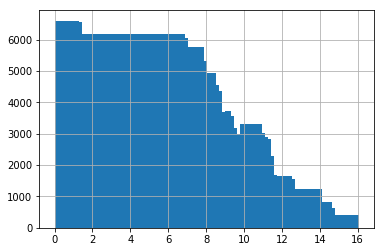

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


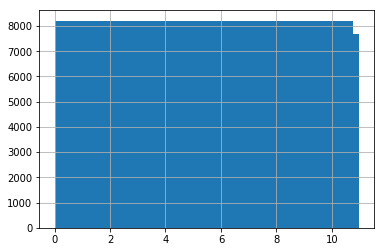

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [30]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    train_pool=cat.Pool(Xtr,ytr)
    valid_pool=cat.Pool(Xte,yte)
    model = cat.CatBoostRegressor(iterations = 5000, thread_count = n_thread, **params)
    model.fit(train_pool,eval_set=valid_pool,use_best_model=True)            
    a =  model.get_best_score()
    return a['validation_0']['MAE'], model.get_best_iteration()

In [37]:
params = {'objective':"RMSE",
          'max_depth':8, 
          'learning_rate':0.03,
          'border_count':128,
          'l2_leaf_reg':2,
           "colsample_bylevel":0.7,
            'leaf_estimation_method':'Gradient',
          #'min_data_in_leaf' : 1,
          'metric_period' : 100,
          'early_stopping_rounds': 100,
          'eval_metric':'MAE',
            #'fold_len_multiplier':[1.05,1.5,2], 
            #'bagging_temperature':[1,0.75,0.5]
            #,'random_strength':[0.5,1,1.5],
           }

In [38]:
best_mae=1e10

In [39]:
def lgbcv(learning_rate, border_count,l2_leaf_reg,max_depth,
          colsample_bylevel):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['border_count']=int(border_count)
    newparams['max_depth']=int(max_depth)
    #newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [40]:
space={
   'border_count': hp.loguniform('border_count', np.log(32),np.log(128) ),
    'l2_leaf_reg':hp.loguniform('l2_leaf_reg', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'colsample_bylevel':hp.uniform('colsample_bylevel',  0.3,1 ),
#    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(5*1e-3),np.log(0.1) ),
}

In [41]:
def objective(args):
    print args
    return lgbcv(**args)



In [42]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'learning_rate': 0.009331228187804016, 'l2_leaf_reg': 5.901087208465345, 'border_count': 45.88210545038793, 'max_depth': 5.818589302451435, 'colsample_bylevel': 0.6306474999516722}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
0:	learn: 5.4296843	test: 5.4317318	best: 5.4317318 (0)	total: 106ms	remaining: 8m 50s

  0%|          | 0/100 [00:18<?, ?it/s, best loss: ?]

100:	learn: 2.4948011	test: 2.4732287	best: 2.4732287 (100)	total: 5.22s	remaining: 4m 13s

200:	learn: 1.5225474	test: 1.6544013	best: 1.6544013 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 1.2324532	test: 1.3621084	best: 1.3621084 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 1.1443287	test: 1.2491158	best: 1.2491158 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.1122596	test: 1.2038487	best: 1.2038487 (500)	total: 25s	remaining: 3m 44s

600:	learn: 1.0960227	test: 1.1852937	best: 1.1852937 (600)	total: 29.8s	remaining: 3m 37s

700:	learn: 1.0841896	test: 1.1759729	best: 1.1759729 (700)	total: 34.6s	remaining: 3m 31s

800:	learn: 1.0745309	test: 1.1717990	best: 1.1717693 (794)	total: 39.3s	remaining: 3m 26s

900:	learn: 1.0656825	test: 1.1697127	best: 1.1695164 (897)	total: 44.1s	remaining: 3m 20s

1000:	learn: 1.0576871	test: 1.1687746	best: 1.1685930 (966)	total: 49s	remaining: 3m 15s

1100:	learn: 1.0498357	test: 1.1679165	best: 1.1676775 (1051)	total: 53.8s	remaining

100:	learn: 2.4884296	test: 2.7002398	best: 2.7002398 (100)	total: 5.13s	remaining: 4m 8s

200:	learn: 1.5142462	test: 1.8215276	best: 1.8215276 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 1.2218917	test: 1.5401987	best: 1.5401987 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 1.1314937	test: 1.4307245	best: 1.4307245 (400)	total: 19.9s	remaining: 3m 48s

500:	learn: 1.0987309	test: 1.3874547	best: 1.3874547 (500)	total: 24.7s	remaining: 3m 41s

600:	learn: 1.0829043	test: 1.3734130	best: 1.3734130 (600)	total: 29.5s	remaining: 3m 35s

700:	learn: 1.0714849	test: 1.3673794	best: 1.3673492 (699)	total: 34.2s	remaining: 3m 29s

800:	learn: 1.0615004	test: 1.3646930	best: 1.3646930 (800)	total: 38.9s	remaining: 3m 24s

900:	learn: 1.0533762	test: 1.3629585	best: 1.3629585 (900)	total: 43.8s	remaining: 3m 19s

1000:	learn: 1.0450361	test: 1.3626539	best: 1.3624668 (905)	total: 48.5s	remaining: 3m 13s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.362466757   

100:	learn: 2.4945893	test: 2.3449772	best: 2.3449772 (100)	total: 5.24s	remaining: 4m 14s

200:	learn: 1.5401235	test: 1.2469767	best: 1.2469767 (200)	total: 10.5s	remaining: 4m 10s

300:	learn: 1.2569403	test: 0.8984352	best: 0.8984352 (300)	total: 15.6s	remaining: 4m 3s

400:	learn: 1.1675528	test: 0.8255904	best: 0.8255904 (400)	total: 20.6s	remaining: 3m 55s

500:	learn: 1.1347774	test: 0.8201068	best: 0.8199089 (496)	total: 25.5s	remaining: 3m 48s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8199089019                              

bestIteration = 496                                  

Shrink model to first 497 iterations.                
quake                                                
3                                                    
(0.8199089019365672, 496)                            
valid quake                                          
4                                                    
(376914, 450)                                      

100:	learn: 2.4902700	test: 2.6924483	best: 2.6924483 (100)	total: 5.2s	remaining: 4m 12s

200:	learn: 1.5255074	test: 1.7408218	best: 1.7408218 (200)	total: 10.1s	remaining: 4m 1s

300:	learn: 1.2392752	test: 1.3841463	best: 1.3841463 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 1.1524282	test: 1.2551334	best: 1.2551334 (400)	total: 20s	remaining: 3m 49s

500:	learn: 1.1204077	test: 1.2053316	best: 1.2053316 (500)	total: 24.8s	remaining: 3m 43s

600:	learn: 1.1040041	test: 1.1889582	best: 1.1886872 (595)	total: 29.8s	remaining: 3m 37s

700:	learn: 1.0925285	test: 1.1799945	best: 1.1799945 (700)	total: 34.7s	remaining: 3m 32s

800:	learn: 1.0827045	test: 1.1772281	best: 1.1772281 (800)	total: 39.8s	remaining: 3m 28s

900:	learn: 1.0738098	test: 1.1759852	best: 1.1759131 (896)	total: 44.9s	remaining: 3m 24s

1000:	learn: 1.0657783	test: 1.1750414	best: 1.1750414 (1000)	total: 49.6s	remaining: 3m 18s

1100:	learn: 1.0581102	test: 1.1757482	best: 1.1747286 (1076)	total: 54.3s	remaini

100:	learn: 2.4902498	test: 2.1031571	best: 2.1031571 (100)	total: 5.32s	remaining: 4m 17s

200:	learn: 1.5264713	test: 1.2406293	best: 1.2406293 (200)	total: 10.5s	remaining: 4m 9s

300:	learn: 1.2360618	test: 1.1792431	best: 1.1735362 (272)	total: 15.5s	remaining: 4m 2s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.173536176                               

bestIteration = 272                                  

Shrink model to first 273 iterations.                
quake                                                
5                                                    
(1.173536175773541, 272)                             
valid quake                                          
6                                                    
(391376, 450)                                        
(391376,)                                            
(18018, 450)                                         
(18018,)                                             
0:	learn: 5.4303487	

100:	learn: 2.4915140	test: 2.3831022	best: 2.3831022 (100)	total: 5.25s	remaining: 4m 14s

200:	learn: 1.5257061	test: 1.4833324	best: 1.4833324 (200)	total: 10.3s	remaining: 4m 5s

300:	learn: 1.2355144	test: 1.3383674	best: 1.3383674 (300)	total: 15.3s	remaining: 3m 59s

400:	learn: 1.1453750	test: 1.3324969	best: 1.3314490 (389)	total: 20.5s	remaining: 3m 54s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.331449017                               

bestIteration = 389                                  

Shrink model to first 390 iterations.                
quake                                                
6                                                    
(1.3314490168893427, 389)                            
valid quake                                          
7                                                    
(368154, 450)                                        
(368154,)                                            
(41240, 450)                       

100:	learn: 2.4934165	test: 2.7393675	best: 2.7393675 (100)	total: 5.12s	remaining: 4m 8s

200:	learn: 1.5204016	test: 1.8406368	best: 1.8406368 (200)	total: 10.2s	remaining: 4m 4s

300:	learn: 1.2241864	test: 1.5664304	best: 1.5664304 (300)	total: 15.2s	remaining: 3m 56s

400:	learn: 1.1305708	test: 1.4701482	best: 1.4701482 (400)	total: 20s	remaining: 3m 49s

500:	learn: 1.0960162	test: 1.4320291	best: 1.4320291 (500)	total: 24.8s	remaining: 3m 42s

600:	learn: 1.0784983	test: 1.4172268	best: 1.4172268 (600)	total: 29.5s	remaining: 3m 36s

700:	learn: 1.0659199	test: 1.4101125	best: 1.4101125 (700)	total: 34.3s	remaining: 3m 30s

800:	learn: 1.0557316	test: 1.4077413	best: 1.4074630 (768)	total: 39s	remaining: 3m 24s

900:	learn: 1.0466949	test: 1.4057629	best: 1.4056576 (899)	total: 43.9s	remaining: 3m 19s

1000:	learn: 1.0380499	test: 1.4042486	best: 1.4042143 (991)	total: 48.6s	remaining: 3m 14s

1100:	learn: 1.0300463	test: 1.4035037	best: 1.4035037 (1100)	total: 53.4s	remaining:

100:	learn: 2.4905741	test: 1.9825305	best: 1.9825305 (100)	total: 5.31s	remaining: 4m 17s

200:	learn: 1.5224627	test: 1.1815974	best: 1.1815974 (200)	total: 10.4s	remaining: 4m 8s

300:	learn: 1.2329306	test: 1.1609142	best: 1.1428359 (254)	total: 15.6s	remaining: 4m 2s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.142835943                               

bestIteration = 254                                  

Shrink model to first 255 iterations.                
quake                                                
8                                                    
(1.1428359432334987, 254)                            
valid quake                                          
9                                                    
(384759, 450)                                        
(384759,)                                            
(24635, 450)                                         
(24635,)                                             
0:	learn: 5.4300000	

100:	learn: 2.4938508	test: 2.4306665	best: 2.4306665 (100)	total: 5.22s	remaining: 4m 13s

200:	learn: 1.5392765	test: 1.3614409	best: 1.3614409 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.2560234	test: 1.0303224	best: 1.0303224 (300)	total: 15.5s	remaining: 4m 1s

400:	learn: 1.1672008	test: 0.9622974	best: 0.9622974 (400)	total: 20.4s	remaining: 3m 54s

500:	learn: 1.1340550	test: 0.9450915	best: 0.9450915 (500)	total: 25.3s	remaining: 3m 47s

600:	learn: 1.1169816	test: 0.9390577	best: 0.9390068 (599)	total: 30.1s	remaining: 3m 40s

700:	learn: 1.1053783	test: 0.9377496	best: 0.9372899 (691)	total: 35s	remaining: 3m 34s

800:	learn: 1.0951819	test: 0.9356105	best: 0.9356105 (800)	total: 39.8s	remaining: 3m 28s

900:	learn: 1.0861836	test: 0.9354296	best: 0.9352416 (821)	total: 44.7s	remaining: 3m 23s

1000:	learn: 1.0779215	test: 0.9344974	best: 0.9343442 (964)	total: 49.7s	remaining: 3m 18s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9343442168    

100:	learn: 2.4926162	test: 2.5958729	best: 2.5958729 (100)	total: 5.13s	remaining: 4m 9s

200:	learn: 1.5307490	test: 1.6246218	best: 1.6246218 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.2456387	test: 1.2738287	best: 1.2738287 (300)	total: 15.4s	remaining: 4m

400:	learn: 1.1588889	test: 1.1518056	best: 1.1518056 (400)	total: 20.3s	remaining: 3m 52s

500:	learn: 1.1258020	test: 1.1077009	best: 1.1077009 (500)	total: 25.1s	remaining: 3m 45s

600:	learn: 1.1087562	test: 1.0908904	best: 1.0908904 (600)	total: 29.9s	remaining: 3m 38s

700:	learn: 1.0969908	test: 1.0829889	best: 1.0829889 (700)	total: 34.7s	remaining: 3m 32s

800:	learn: 1.0871033	test: 1.0780000	best: 1.0780000 (800)	total: 39.5s	remaining: 3m 26s

900:	learn: 1.0783529	test: 1.0757057	best: 1.0757057 (900)	total: 44.4s	remaining: 3m 22s

1000:	learn: 1.0699152	test: 1.0732374	best: 1.0731342 (997)	total: 49.2s	remaining: 3m 16s

1100:	learn: 1.0621027	test: 1.0713359	best: 1.0713359 (1100)	total: 54s	remaining: 3

100:	learn: 2.4909338	test: 2.6288332	best: 2.6288332 (100)	total: 5.17s	remaining: 4m 10s

200:	learn: 1.5302062	test: 1.6370694	best: 1.6370694 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.2454137	test: 1.2656732	best: 1.2656732 (300)	total: 15.4s	remaining: 3m 59s

400:	learn: 1.1584835	test: 1.1316977	best: 1.1316977 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.1264206	test: 1.0846799	best: 1.0846799 (500)	total: 24.9s	remaining: 3m 43s

600:	learn: 1.1098656	test: 1.0692480	best: 1.0692480 (600)	total: 29.7s	remaining: 3m 37s

700:	learn: 1.0982325	test: 1.0629308	best: 1.0629308 (700)	total: 34.4s	remaining: 3m 31s

800:	learn: 1.0884433	test: 1.0607585	best: 1.0607585 (800)	total: 39.2s	remaining: 3m 25s

900:	learn: 1.0798733	test: 1.0603243	best: 1.0601768 (871)	total: 44.1s	remaining: 3m 20s

1000:	learn: 1.0716367	test: 1.0600138	best: 1.0597328 (941)	total: 48.9s	remaining: 3m 15s

1100:	learn: 1.0637812	test: 1.0595317	best: 1.0590781 (1080)	total: 53.6s	remai

100:	learn: 2.4939764	test: 2.2395767	best: 2.2395767 (100)	total: 5.45s	remaining: 4m 24s

200:	learn: 1.5380964	test: 1.1784782	best: 1.1784782 (200)	total: 10.5s	remaining: 4m 11s

300:	learn: 1.2523830	test: 0.9280256	best: 0.9280256 (300)	total: 15.6s	remaining: 4m 3s

400:	learn: 1.1619261	test: 0.8979409	best: 0.8972599 (376)	total: 20.6s	remaining: 3m 55s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8972598526                              

bestIteration = 376                                  

Shrink model to first 377 iterations.                
quake                                                
12                                                   
(0.8972598526005617, 376)                            
valid quake                                          
13                                                   
(387509, 450)                                        
(387509,)                                            
(21885, 450)                       

100:	learn: 2.4931878	test: 2.2275429	best: 2.2275429 (100)	total: 5.28s	remaining: 4m 16s

200:	learn: 1.5329173	test: 1.1969109	best: 1.1969109 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.2414314	test: 1.0886708	best: 1.0886708 (300)	total: 15.4s	remaining: 4m

400:	learn: 1.1521597	test: 1.0800072	best: 1.0797051 (389)	total: 20.4s	remaining: 3m 54s

500:	learn: 1.1195111	test: 1.0799773	best: 1.0791041 (447)	total: 25.4s	remaining: 3m 48s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.079104079                               

bestIteration = 447                                  

Shrink model to first 448 iterations.                
quake                                                
13                                                   
(1.0791040791927682, 447)                            
valid quake                                          
14                                                   
(371633, 450)                                        
(

100:	learn: 2.4805199	test: 2.9338531	best: 2.9338531 (100)	total: 5.11s	remaining: 4m 7s

200:	learn: 1.5070353	test: 2.0477826	best: 2.0477826 (200)	total: 10s	remaining: 3m 59s

300:	learn: 1.2139736	test: 1.7115256	best: 1.7115256 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 1.1224029	test: 1.5768603	best: 1.5768603 (400)	total: 19.9s	remaining: 3m 47s

500:	learn: 1.0897963	test: 1.5231267	best: 1.5231267 (500)	total: 24.6s	remaining: 3m 40s

600:	learn: 1.0724344	test: 1.4988216	best: 1.4988216 (600)	total: 29.2s	remaining: 3m 34s

700:	learn: 1.0605010	test: 1.4887595	best: 1.4887234 (699)	total: 33.9s	remaining: 3m 28s

800:	learn: 1.0507024	test: 1.4833780	best: 1.4833780 (800)	total: 38.6s	remaining: 3m 22s

900:	learn: 1.0417940	test: 1.4810802	best: 1.4810428 (897)	total: 43.2s	remaining: 3m 16s

1000:	learn: 1.0337619	test: 1.4794011	best: 1.4791999 (986)	total: 48s	remaining: 3m 11s

1100:	learn: 1.0261499	test: 1.4789281	best: 1.4786970 (1020)	total: 52.8s	remaining

100:	learn: 2.4832847	test: 2.4487128	best: 2.4487128 (100)	total: 5.18s	remaining: 4m 11s

200:	learn: 1.5235911	test: 1.4697382	best: 1.4697382 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.2425880	test: 1.1604914	best: 1.1604914 (300)	total: 15.5s	remaining: 4m 1s

400:	learn: 1.1555612	test: 1.0851508	best: 1.0851508 (400)	total: 20.4s	remaining: 3m 54s

500:	learn: 1.1230109	test: 1.0830890	best: 1.0796404 (452)	total: 25.3s	remaining: 3m 46s

Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.079640426                               

bestIteration = 452                                  

Shrink model to first 453 iterations.                
quake                                                
15                                                   
(1.079640426218437, 452)                             
mean score                                           
1.144121008020578                                    
{'learning_rate': 0.006150594598955876, 'l2_leaf_reg

100:	learn: 3.1520674	test: 3.1231673	best: 3.1231673 (100)	total: 8.26s	remaining: 6m 40s

200:	learn: 2.0300118	test: 2.0811569	best: 2.0811569 (200)	total: 16.2s	remaining: 6m 26s

300:	learn: 1.4930373	test: 1.6403306	best: 1.6403306 (300)	total: 24s	remaining: 6m 14s

400:	learn: 1.2532450	test: 1.4169891	best: 1.4169891 (400)	total: 31.7s	remaining: 6m 3s

500:	learn: 1.1437116	test: 1.2977647	best: 1.2977647 (500)	total: 39.4s	remaining: 5m 53s

600:	learn: 1.0907073	test: 1.2356389	best: 1.2356389 (600)	total: 46.7s	remaining: 5m 42s

700:	learn: 1.0609926	test: 1.2036052	best: 1.2036052 (700)	total: 54.2s	remaining: 5m 32s

800:	learn: 1.0409969	test: 1.1864324	best: 1.1864324 (800)	total: 1m 1s	remaining: 5m 22s

900:	learn: 1.0250716	test: 1.1781203	best: 1.1781203 (900)	total: 1m 8s	remaining: 5m 13s

1000:	learn: 1.0106708	test: 1.1731641	best: 1.1731641 (1000)	total: 1m 16s	remaining: 5m 5s

1100:	learn: 0.9982064	test: 1.1712900	best: 1.1710892 (1091)	total: 1m 23s	remai

100:	learn: 3.1473939	test: 3.3279662	best: 3.3279662 (100)	total: 8.15s	remaining: 6m 35s

200:	learn: 2.0269389	test: 2.2867426	best: 2.2867426 (200)	total: 16.1s	remaining: 6m 23s

300:	learn: 1.4876878	test: 1.8158239	best: 1.8158239 (300)	total: 23.8s	remaining: 6m 10s

400:	learn: 1.2448314	test: 1.5947011	best: 1.5947011 (400)	total: 31.2s	remaining: 5m 58s

500:	learn: 1.1339760	test: 1.4821408	best: 1.4821408 (500)	total: 38.6s	remaining: 5m 46s

600:	learn: 1.0795238	test: 1.4228521	best: 1.4228521 (600)	total: 46.1s	remaining: 5m 37s

700:	learn: 1.0491115	test: 1.3914869	best: 1.3914869 (700)	total: 53.5s	remaining: 5m 27s

800:	learn: 1.0285655	test: 1.3761894	best: 1.3761894 (800)	total: 1m	remaining: 5m 18s

900:	learn: 1.0125772	test: 1.3685231	best: 1.3685231 (900)	total: 1m 7s	remaining: 5m 8s

1000:	learn: 0.9983086	test: 1.3647006	best: 1.3646802 (997)	total: 1m 15s	remaining: 4m 59s

1100:	learn: 0.9853975	test: 1.3631148	best: 1.3630659 (1099)	total: 1m 22s	remain

100:	learn: 3.1509114	test: 3.0574052	best: 3.0574052 (100)	total: 8.25s	remaining: 6m 40s

200:	learn: 2.0381578	test: 1.8439948	best: 1.8439948 (200)	total: 16.3s	remaining: 6m 29s

300:	learn: 1.5105500	test: 1.2284920	best: 1.2284920 (300)	total: 24.5s	remaining: 6m 22s

400:	learn: 1.2762702	test: 0.9460900	best: 0.9460900 (400)	total: 32.3s	remaining: 6m 10s

500:	learn: 1.1674598	test: 0.8402306	best: 0.8402306 (500)	total: 40.2s	remaining: 6m

600:	learn: 1.1135490	test: 0.8167527	best: 0.8167527 (600)	total: 48s	remaining: 5m 51s

700:	learn: 1.0827877	test: 0.8153776	best: 0.8151602 (692)	total: 55.8s	remaining: 5m 41s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 0.8151601638                                                      

bestIteration = 692                                                          

Shrink model to first 693 iterations.                                        
quake                                          

100:	learn: 3.1474328	test: 3.3202369	best: 3.3202369 (100)	total: 8.36s	remaining: 6m 45s

200:	learn: 2.0279220	test: 2.2666053	best: 2.2666053 (200)	total: 16.3s	remaining: 6m 30s

300:	learn: 1.4942912	test: 1.7348775	best: 1.7348775 (300)	total: 24.2s	remaining: 6m 18s

400:	learn: 1.2569549	test: 1.4607504	best: 1.4607504 (400)	total: 31.9s	remaining: 6m 6s

500:	learn: 1.1498267	test: 1.3205465	best: 1.3205465 (500)	total: 39.7s	remaining: 5m 56s

600:	learn: 1.0976877	test: 1.2469445	best: 1.2469445 (600)	total: 47.1s	remaining: 5m 44s

700:	learn: 1.0683463	test: 1.2106632	best: 1.2106632 (700)	total: 54.5s	remaining: 5m 34s

800:	learn: 1.0481835	test: 1.1925028	best: 1.1922496 (798)	total: 1m 1s	remaining: 5m 24s

900:	learn: 1.0321521	test: 1.1832171	best: 1.1832171 (900)	total: 1m 9s	remaining: 5m 14s

1000:	learn: 1.0180493	test: 1.1780826	best: 1.1780826 (1000)	total: 1m 16s	remaining: 5m 5s

1100:	learn: 1.0055153	test: 1.1744603	best: 1.1743862 (1091)	total: 1m 23s	rem

100:	learn: 3.1492544	test: 2.8223958	best: 2.8223958 (100)	total: 8.22s	remaining: 6m 38s

200:	learn: 2.0308928	test: 1.6439489	best: 1.6439489 (200)	total: 16.3s	remaining: 6m 29s

300:	learn: 1.4967913	test: 1.2383013	best: 1.2383013 (300)	total: 24.5s	remaining: 6m 22s

400:	learn: 1.2555429	test: 1.1655089	best: 1.1652948 (397)	total: 32.3s	remaining: 6m 10s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.165294793                                                       

bestIteration = 397                                                          

Shrink model to first 398 iterations.                                        
quake                                                                        
5                                                                            
(1.1652947926689703, 397)                                                    
valid quake                                                                  
6    

100:	learn: 3.1509547	test: 3.0406915	best: 3.0406915 (100)	total: 8.36s	remaining: 6m 45s

200:	learn: 2.0295012	test: 1.9534143	best: 1.9534143 (200)	total: 16.5s	remaining: 6m 34s

300:	learn: 1.4978776	test: 1.4882014	best: 1.4882014 (300)	total: 24.5s	remaining: 6m 22s

400:	learn: 1.2591068	test: 1.3634544	best: 1.3634544 (400)	total: 32.3s	remaining: 6m 10s

500:	learn: 1.1485979	test: 1.3414018	best: 1.3413390 (499)	total: 40.1s	remaining: 6m

600:	learn: 1.0943302	test: 1.3409222	best: 1.3390964 (549)	total: 47.7s	remaining: 5m 49s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.339096392                                                       

bestIteration = 549                                                          

Shrink model to first 550 iterations.                                        
quake                                                                        
6                                                          

100:	learn: 3.1491586	test: 3.3593428	best: 3.3593428 (100)	total: 8.07s	remaining: 6m 31s

200:	learn: 2.0315656	test: 2.3217291	best: 2.3217291 (200)	total: 15.9s	remaining: 6m 19s

300:	learn: 1.4910069	test: 1.8361159	best: 1.8361159 (300)	total: 23.6s	remaining: 6m 8s

400:	learn: 1.2463846	test: 1.6208800	best: 1.6208800 (400)	total: 31.2s	remaining: 5m 57s

500:	learn: 1.1319620	test: 1.5160828	best: 1.5160828 (500)	total: 38.8s	remaining: 5m 48s

600:	learn: 1.0752580	test: 1.4609420	best: 1.4609420 (600)	total: 46.2s	remaining: 5m 38s

700:	learn: 1.0437567	test: 1.4330485	best: 1.4330485 (700)	total: 53.5s	remaining: 5m 28s

800:	learn: 1.0223746	test: 1.4184874	best: 1.4184874 (800)	total: 1m	remaining: 5m 17s

900:	learn: 1.0054659	test: 1.4106205	best: 1.4106205 (900)	total: 1m 8s	remaining: 5m 9s

1000:	learn: 0.9901839	test: 1.4061836	best: 1.4061836 (1000)	total: 1m 15s	remaining: 5m

1100:	learn: 0.9767431	test: 1.4036048	best: 1.4035368 (1092)	total: 1m 22s	remaining:

100:	learn: 3.1503916	test: 2.7119267	best: 2.7119267 (100)	total: 8.54s	remaining: 6m 54s

200:	learn: 2.0306465	test: 1.5184614	best: 1.5184614 (200)	total: 16.7s	remaining: 6m 38s

300:	learn: 1.4963173	test: 1.1543584	best: 1.1543584 (300)	total: 24.7s	remaining: 6m 25s

400:	learn: 1.2560619	test: 1.1133986	best: 1.1102830 (375)	total: 32.5s	remaining: 6m 13s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.110283011                                                       

bestIteration = 375                                                          

Shrink model to first 376 iterations.                                        
quake                                                                        
8                                                                            
(1.1102830108354464, 375)                                                    
valid quake                                                                  
9    

100:	learn: 3.1514548	test: 3.1206071	best: 3.1206071 (100)	total: 8.28s	remaining: 6m 41s

200:	learn: 2.0379859	test: 1.9567916	best: 1.9567916 (200)	total: 16.5s	remaining: 6m 34s

300:	learn: 1.5112007	test: 1.3622966	best: 1.3622966 (300)	total: 24.4s	remaining: 6m 21s

400:	learn: 1.2765581	test: 1.0855278	best: 1.0855278 (400)	total: 32.2s	remaining: 6m 8s

500:	learn: 1.1682100	test: 0.9884637	best: 0.9884637 (500)	total: 39.8s	remaining: 5m 56s

600:	learn: 1.1146632	test: 0.9556712	best: 0.9556712 (600)	total: 47.3s	remaining: 5m 46s

700:	learn: 1.0842762	test: 0.9441957	best: 0.9441957 (700)	total: 55s	remaining: 5m 37s

800:	learn: 1.0633226	test: 0.9406779	best: 0.9405812 (797)	total: 1m 2s	remaining: 5m 27s

900:	learn: 1.0469887	test: 0.9373164	best: 0.9372021 (893)	total: 1m 9s	remaining: 5m 17s

1000:	learn: 1.0324792	test: 0.9358844	best: 0.9358572 (999)	total: 1m 17s	remaining: 5m 8s

1100:	learn: 1.0198070	test: 0.9346295	best: 0.9346274 (1099)	total: 1m 24s	remain

100:	learn: 3.1482829	test: 3.2435905	best: 3.2435905 (100)	total: 8.19s	remaining: 6m 37s

200:	learn: 2.0305635	test: 2.1682414	best: 2.1682414 (200)	total: 16.1s	remaining: 6m 24s

300:	learn: 1.5000795	test: 1.6250383	best: 1.6250383 (300)	total: 24.1s	remaining: 6m 16s

400:	learn: 1.2643905	test: 1.3483561	best: 1.3483561 (400)	total: 31.8s	remaining: 6m 4s

500:	learn: 1.1571607	test: 1.2090323	best: 1.2090323 (500)	total: 39.4s	remaining: 5m 53s

600:	learn: 1.1046199	test: 1.1401209	best: 1.1401209 (600)	total: 46.9s	remaining: 5m 43s

700:	learn: 1.0754193	test: 1.1062118	best: 1.1062118 (700)	total: 54.3s	remaining: 5m 33s

800:	learn: 1.0551424	test: 1.0900839	best: 1.0900839 (800)	total: 1m 1s	remaining: 5m 24s

900:	learn: 1.0394757	test: 1.0813134	best: 1.0813134 (900)	total: 1m 9s	remaining: 5m 13s

1000:	learn: 1.0256078	test: 1.0758549	best: 1.0758270 (997)	total: 1m 16s	remaining: 5m 4s

1100:	learn: 1.0128390	test: 1.0729045	best: 1.0729045 (1100)	total: 1m 23s	rema

100:	learn: 3.1478715	test: 3.2784391	best: 3.2784391 (100)	total: 8.27s	remaining: 6m 41s

200:	learn: 2.0315048	test: 2.2040987	best: 2.2040987 (200)	total: 16.4s	remaining: 6m 32s

300:	learn: 1.4994930	test: 1.6481730	best: 1.6481730 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.2634722	test: 1.3560351	best: 1.3560351 (400)	total: 32s	remaining: 6m 6s

500:	learn: 1.1563675	test: 1.2078377	best: 1.2078377 (500)	total: 39.6s	remaining: 5m 55s

600:	learn: 1.1032639	test: 1.1330232	best: 1.1330232 (600)	total: 47.2s	remaining: 5m 45s

700:	learn: 1.0738775	test: 1.0957274	best: 1.0957274 (700)	total: 54.9s	remaining: 5m 36s

800:	learn: 1.0538252	test: 1.0775178	best: 1.0775178 (800)	total: 1m 2s	remaining: 5m 26s

900:	learn: 1.0380202	test: 1.0686873	best: 1.0686873 (900)	total: 1m 9s	remaining: 5m 16s

1000:	learn: 1.0235166	test: 1.0642513	best: 1.0642513 (1000)	total: 1m 16s	remaining: 5m 7s

1100:	learn: 1.0095809	test: 1.0631509	best: 1.0631509 (1100)	total: 1m 24s	remai

100:	learn: 3.1476037	test: 2.9729630	best: 2.9729630 (100)	total: 8.29s	remaining: 6m 42s

200:	learn: 2.0363267	test: 1.7349303	best: 1.7349303 (200)	total: 16.3s	remaining: 6m 30s

300:	learn: 1.5090558	test: 1.1613675	best: 1.1613675 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.2721525	test: 0.9489832	best: 0.9489832 (400)	total: 32s	remaining: 6m 7s

500:	learn: 1.1631107	test: 0.8936700	best: 0.8936700 (500)	total: 40s	remaining: 5m 58s

600:	learn: 1.1088309	test: 0.8898582	best: 0.8884168 (576)	total: 47.7s	remaining: 5m 49s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 0.8884167586                                                      

bestIteration = 576                                                          

Shrink model to first 577 iterations.                                        
quake                                                                        
12                                                          

100:	learn: 3.1504071	test: 2.9401001	best: 2.9401001 (100)	total: 8.32s	remaining: 6m 43s

200:	learn: 2.0370782	test: 1.7180230	best: 1.7180230 (200)	total: 16.5s	remaining: 6m 32s

300:	learn: 1.5071940	test: 1.1786731	best: 1.1786731 (300)	total: 24.4s	remaining: 6m 21s

400:	learn: 1.2655195	test: 1.0816510	best: 1.0816510 (400)	total: 32.4s	remaining: 6m 11s

500:	learn: 1.1546216	test: 1.0697065	best: 1.0695062 (491)	total: 40.2s	remaining: 6m

600:	learn: 1.1009558	test: 1.0696786	best: 1.0691928 (584)	total: 48s	remaining: 5m 51s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.069192761                                                       

bestIteration = 584                                                          

Shrink model to first 585 iterations.                                        
quake                                                                        
13                                                           

100:	learn: 3.1434262	test: 3.5075146	best: 3.5075146 (100)	total: 8.01s	remaining: 6m 28s

200:	learn: 2.0211744	test: 2.5377499	best: 2.5377499 (200)	total: 15.8s	remaining: 6m 17s

300:	learn: 1.4807551	test: 2.0375152	best: 2.0375152 (300)	total: 23.6s	remaining: 6m 8s

400:	learn: 1.2370494	test: 1.7822576	best: 1.7822576 (400)	total: 31.2s	remaining: 5m 57s

500:	learn: 1.1249971	test: 1.6433251	best: 1.6433251 (500)	total: 38.6s	remaining: 5m 46s

600:	learn: 1.0696249	test: 1.5679183	best: 1.5679183 (600)	total: 46s	remaining: 5m 36s

700:	learn: 1.0389665	test: 1.5282248	best: 1.5282248 (700)	total: 53.4s	remaining: 5m 27s

800:	learn: 1.0180760	test: 1.5062490	best: 1.5062490 (800)	total: 1m	remaining: 5m 19s

900:	learn: 1.0015993	test: 1.4952169	best: 1.4952169 (900)	total: 1m 8s	remaining: 5m 9s

1000:	learn: 0.9875283	test: 1.4882670	best: 1.4882670 (1000)	total: 1m 15s	remaining: 5m

1100:	learn: 0.9744486	test: 1.4854321	best: 1.4854321 (1100)	total: 1m 22s	remaining: 4

100:	learn: 3.1447714	test: 3.0578136	best: 3.0578136 (100)	total: 8.31s	remaining: 6m 43s

200:	learn: 2.0243840	test: 1.9818751	best: 1.9818751 (200)	total: 16.4s	remaining: 6m 30s

300:	learn: 1.4978311	test: 1.4206606	best: 1.4206606 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.2634526	test: 1.1571996	best: 1.1571996 (400)	total: 32.1s	remaining: 6m 8s

500:	learn: 1.1568097	test: 1.0617771	best: 1.0617744 (499)	total: 39.8s	remaining: 5m 57s

600:	learn: 1.1035077	test: 1.0420262	best: 1.0419988 (599)	total: 47.4s	remaining: 5m 47s

700:	learn: 1.0737635	test: 1.0492587	best: 1.0417269 (602)	total: 54.9s	remaining: 5m 36s

Stopped by overfitting detector  (100 iterations wait)                       

bestTest = 1.041726894                                                       

bestIteration = 602                                                          

Shrink model to first 603 iterations.                                        
quake                                     

100:	learn: 1.2858720	test: 1.4332775	best: 1.4332775 (100)	total: 5.18s	remaining: 4m 11s

200:	learn: 1.0912162	test: 1.1948185	best: 1.1948185 (200)	total: 10.2s	remaining: 4m 4s

300:	learn: 1.0544132	test: 1.1737690	best: 1.1737690 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 1.0270435	test: 1.1703543	best: 1.1703503 (391)	total: 20.3s	remaining: 3m 52s

500:	learn: 1.0029632	test: 1.1714541	best: 1.1698238 (408)	total: 25.4s	remaining: 3m 47s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.169823779                                                        

bestIteration = 408                                                           

Shrink model to first 409 iterations.                                         
quake                                                                         
1                                                                             
(1.169823779181849, 408)                                        

100:	learn: 1.2776080	test: 1.6026483	best: 1.6026483 (100)	total: 5.09s	remaining: 4m 7s

200:	learn: 1.0777739	test: 1.3842658	best: 1.3842658 (200)	total: 10.1s	remaining: 4m

300:	learn: 1.0413643	test: 1.3671567	best: 1.3671567 (300)	total: 15.1s	remaining: 3m 54s

400:	learn: 1.0149402	test: 1.3684280	best: 1.3656829 (374)	total: 20.2s	remaining: 3m 51s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.36568286                                                         

bestIteration = 374                                                           

Shrink model to first 375 iterations.                                         
quake                                                                         
2                                                                             
(1.3656828598314366, 374)                                                     
valid quake                                                                   
3 

100:	learn: 1.3118075	test: 0.9706915	best: 0.9706915 (100)	total: 5.15s	remaining: 4m 10s

200:	learn: 1.1150345	test: 0.8232079	best: 0.8208147 (178)	total: 10.4s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8208146619                                                       

bestIteration = 178                                                           

Shrink model to first 179 iterations.                                         
quake                                                                         
3                                                                             
(0.8208146619314237, 178)                                                     
valid quake                                                                   
4                                                                             
(376914, 450)                                                                 
(376914,)               

100:	learn: 1.2887970	test: 1.4585020	best: 1.4585020 (100)	total: 5.19s	remaining: 4m 11s

200:	learn: 1.0952968	test: 1.1912497	best: 1.1911282 (198)	total: 10.3s	remaining: 4m 6s

300:	learn: 1.0600301	test: 1.1711277	best: 1.1696064 (270)	total: 15.4s	remaining: 3m 59s

400:	learn: 1.0327308	test: 1.1688411	best: 1.1685953 (398)	total: 20.4s	remaining: 3m 53s

500:	learn: 1.0073841	test: 1.1682825	best: 1.1676939 (493)	total: 25.4s	remaining: 3m 47s

600:	learn: 0.9839881	test: 1.1662720	best: 1.1658948 (590)	total: 30.4s	remaining: 3m 42s

700:	learn: 0.9621721	test: 1.1662067	best: 1.1649469 (633)	total: 35.4s	remaining: 3m 37s

800:	learn: 0.9409874	test: 1.1647468	best: 1.1645335 (779)	total: 40.4s	remaining: 3m 31s

900:	learn: 0.9214551	test: 1.1653758	best: 1.1640186 (812)	total: 45.6s	remaining: 3m 27s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.164018613                                                        

bestIteration

100:	learn: 1.2886458	test: 1.1724636	best: 1.1724636 (100)	total: 5.28s	remaining: 4m 15s

200:	learn: 1.0910063	test: 1.2822393	best: 1.1721115 (102)	total: 10.4s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.172111493                                                        

bestIteration = 102                                                           

Shrink model to first 103 iterations.                                         
quake                                                                         
5                                                                             
(1.1721114933761392, 102)                                                     
valid quake                                                                   
6                                                                             
(391376, 450)                                                                 
(391376,)               

100:	learn: 1.2886341	test: 1.3544809	best: 1.3544809 (100)	total: 5.29s	remaining: 4m 16s

200:	learn: 1.0901560	test: 1.3334695	best: 1.3293009 (136)	total: 10.4s	remaining: 4m 8s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.329300931                                                        

bestIteration = 136                                                           

Shrink model to first 137 iterations.                                         
quake                                                                         
6                                                                             
(1.3293009306773573, 136)                                                     
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)               

100:	learn: 1.2792849	test: 1.6338724	best: 1.6338724 (100)	total: 5.11s	remaining: 4m 8s

200:	learn: 1.0732107	test: 1.4271421	best: 1.4271421 (200)	total: 10.1s	remaining: 4m

300:	learn: 1.0333081	test: 1.4095426	best: 1.4095426 (300)	total: 15s	remaining: 3m 53s

400:	learn: 1.0056516	test: 1.4064083	best: 1.4062153 (394)	total: 19.9s	remaining: 3m 48s

500:	learn: 0.9810006	test: 1.4054220	best: 1.4042996 (484)	total: 25s	remaining: 3m 44s

600:	learn: 0.9575839	test: 1.4033642	best: 1.4029983 (594)	total: 29.9s	remaining: 3m 38s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.402998265                                                        

bestIteration = 594                                                           

Shrink model to first 595 iterations.                                         
quake                                                                         
7                                                          

100:	learn: 1.2883308	test: 1.1304629	best: 1.1267578 (96)	total: 5.56s	remaining: 4m 29s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.126757816                                                        

bestIteration = 96                                                            

Shrink model to first 97 iterations.                                          
quake                                                                         
8                                                                             
(1.1267578158387135, 96)                                                      
valid quake                                                                   
9                                                                             
(384759, 450)                                                                 
(384759,)                                                                     
(24635, 450)                         

100:	learn: 1.3087776	test: 1.0894515	best: 1.0894515 (100)	total: 5.19s	remaining: 4m 11s

200:	learn: 1.1137540	test: 0.9383284	best: 0.9383284 (200)	total: 10.5s	remaining: 4m 9s

300:	learn: 1.0764523	test: 0.9334220	best: 0.9327909 (242)	total: 15.5s	remaining: 4m 1s

400:	learn: 1.0491324	test: 0.9324997	best: 0.9314312 (355)	total: 20.6s	remaining: 3m 55s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.9314311718                                                       

bestIteration = 355                                                           

Shrink model to first 356 iterations.                                         
quake                                                                         
9                                                                             
(0.9314311718020342, 355)                                                     
valid quake                                                                   

100:	learn: 1.2961720	test: 1.3540108	best: 1.3540108 (100)	total: 5.11s	remaining: 4m 7s

200:	learn: 1.1009217	test: 1.0963001	best: 1.0963001 (200)	total: 10.1s	remaining: 4m 1s

300:	learn: 1.0643144	test: 1.0749503	best: 1.0749503 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 1.0369192	test: 1.0704785	best: 1.0698342 (386)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.0130306	test: 1.0657156	best: 1.0655079 (497)	total: 25.1s	remaining: 3m 45s

600:	learn: 0.9897805	test: 1.0640695	best: 1.0640695 (600)	total: 30.1s	remaining: 3m 40s

700:	learn: 0.9684953	test: 1.0625408	best: 1.0623366 (688)	total: 35.3s	remaining: 3m 36s

800:	learn: 0.9475895	test: 1.0615854	best: 1.0611878 (744)	total: 40.3s	remaining: 3m 31s

900:	learn: 0.9276120	test: 1.0584270	best: 1.0584270 (900)	total: 45.4s	remaining: 3m 26s

1000:	learn: 0.9082239	test: 1.0579454	best: 1.0574111 (952)	total: 50.4s	remaining: 3m 21s

Stopped by overfitting detector  (100 iterations wait)                        

b

100:	learn: 1.2991806	test: 1.3628308	best: 1.3628308 (100)	total: 5.15s	remaining: 4m 9s

200:	learn: 1.1044062	test: 1.0796111	best: 1.0796111 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 1.0673861	test: 1.0581448	best: 1.0581448 (300)	total: 15.2s	remaining: 3m 57s

400:	learn: 1.0397928	test: 1.0608914	best: 1.0573692 (330)	total: 20.2s	remaining: 3m 52s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.05736922                                                         

bestIteration = 330                                                           

Shrink model to first 331 iterations.                                         
quake                                                                         
11                                                                            
(1.0573692197336366, 330)                                                     
valid quake                                                                   

100:	learn: 1.3065761	test: 0.9712243	best: 0.9712243 (100)	total: 5.27s	remaining: 4m 15s

200:	learn: 1.1067324	test: 0.9106877	best: 0.8943044 (149)	total: 10.4s	remaining: 4m 8s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.89430443                                                         

bestIteration = 149                                                           

Shrink model to first 150 iterations.                                         
quake                                                                         
12                                                                            
(0.8943044300457648, 149)                                                     
valid quake                                                                   
13                                                                            
(387509, 450)                                                                 
(387509,)               

100:	learn: 1.2971322	test: 1.0904879	best: 1.0904879 (100)	total: 5.26s	remaining: 4m 15s

200:	learn: 1.0981483	test: 1.0797946	best: 1.0752356 (141)	total: 10.4s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.075235585                                                        

bestIteration = 141                                                           

Shrink model to first 142 iterations.                                         
quake                                                                         
13                                                                            
(1.0752355846948995, 141)                                                     
valid quake                                                                   
14                                                                            
(371633, 450)                                                                 
(371633,)               

100:	learn: 1.2686478	test: 1.7910899	best: 1.7910899 (100)	total: 5.09s	remaining: 4m 7s

200:	learn: 1.0661931	test: 1.5085015	best: 1.5085015 (200)	total: 10s	remaining: 3m 59s

300:	learn: 1.0292037	test: 1.4827667	best: 1.4827667 (300)	total: 14.9s	remaining: 3m 53s

400:	learn: 1.0012464	test: 1.4780287	best: 1.4774590 (385)	total: 19.9s	remaining: 3m 47s

500:	learn: 0.9766853	test: 1.4772526	best: 1.4770118 (497)	total: 25s	remaining: 3m 44s

600:	learn: 0.9537546	test: 1.4782642	best: 1.4769615 (528)	total: 29.9s	remaining: 3m 38s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.476961487                                                        

bestIteration = 528                                                           

Shrink model to first 529 iterations.                                         
quake                                                                         
14                                                     

100:	learn: 1.2944951	test: 1.2253582	best: 1.2253582 (100)	total: 5.16s	remaining: 4m 10s

200:	learn: 1.1029423	test: 1.0782194	best: 1.0711532 (175)	total: 10.3s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 1.071153222                                                        

bestIteration = 175                                                           

Shrink model to first 176 iterations.                                         
quake                                                                         
15                                                                            
(1.0711532221214393, 175)                                                     
mean score                                                                    
1.1410249778639252                                                            
{'learning_rate': 0.00626990127846396, 'l2_leaf_reg': 2.9077044639303757, 'border_count': 51.3053493633

100:	learn: 3.1217020	test: 3.0948530	best: 3.0948530 (100)	total: 7.36s	remaining: 5m 56s

200:	learn: 1.9981366	test: 2.0596754	best: 2.0596754 (200)	total: 14.7s	remaining: 5m 50s

300:	learn: 1.4657952	test: 1.6252626	best: 1.6252626 (300)	total: 21.9s	remaining: 5m 41s

400:	learn: 1.2304405	test: 1.4052138	best: 1.4052138 (400)	total: 29s	remaining: 5m 32s

500:	learn: 1.1237064	test: 1.2895591	best: 1.2895591 (500)	total: 36.1s	remaining: 5m 24s

600:	learn: 1.0703707	test: 1.2307715	best: 1.2307715 (600)	total: 43.2s	remaining: 5m 16s

700:	learn: 1.0393344	test: 1.2002833	best: 1.2002833 (700)	total: 50.5s	remaining: 5m 9s

800:	learn: 1.0169658	test: 1.1847960	best: 1.1847960 (800)	total: 57.4s	remaining: 5m

900:	learn: 0.9982576	test: 1.1768172	best: 1.1768172 (900)	total: 1m 4s	remaining: 4m 52s

1000:	learn: 0.9821239	test: 1.1728539	best: 1.1728539 (1000)	total: 1m 11s	remaining: 4m 44s

1100:	learn: 0.9672012	test: 1.1706466	best: 1.1706394 (1096)	total: 1m 18s	remainin

100:	learn: 3.1163291	test: 3.3001852	best: 3.3001852 (100)	total: 7.35s	remaining: 5m 56s

200:	learn: 1.9942244	test: 2.2569368	best: 2.2569368 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 1.4598676	test: 1.7962511	best: 1.7962511 (300)	total: 21.6s	remaining: 5m 37s

400:	learn: 1.2217099	test: 1.5826671	best: 1.5826671 (400)	total: 28.7s	remaining: 5m 28s

500:	learn: 1.1122014	test: 1.4758935	best: 1.4758935 (500)	total: 35.7s	remaining: 5m 20s

600:	learn: 1.0582289	test: 1.4198659	best: 1.4198659 (600)	total: 43s	remaining: 5m 14s

700:	learn: 1.0263906	test: 1.3930119	best: 1.3930119 (700)	total: 50s	remaining: 5m 6s

800:	learn: 1.0037615	test: 1.3802053	best: 1.3802053 (800)	total: 57s	remaining: 4m 58s

900:	learn: 0.9844864	test: 1.3736204	best: 1.3736204 (900)	total: 1m 4s	remaining: 4m 51s

1000:	learn: 0.9680486	test: 1.3708319	best: 1.3708319 (1000)	total: 1m 11s	remaining: 4m 44s

1100:	learn: 0.9527084	test: 1.3689440	best: 1.3689440 (1100)	total: 1m 18s	remainin

100:	learn: 3.1181650	test: 3.0278177	best: 3.0278177 (100)	total: 7.36s	remaining: 5m 57s

200:	learn: 2.0060331	test: 1.8130780	best: 1.8130780 (200)	total: 14.6s	remaining: 5m 48s

300:	learn: 1.4837549	test: 1.2045753	best: 1.2045753 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 1.2534824	test: 0.9328315	best: 0.9328315 (400)	total: 29.1s	remaining: 5m 33s

500:	learn: 1.1466353	test: 0.8347437	best: 0.8347437 (500)	total: 36.1s	remaining: 5m 24s

600:	learn: 1.0921537	test: 0.8156636	best: 0.8156636 (600)	total: 43.3s	remaining: 5m 16s

700:	learn: 1.0602000	test: 0.8161461	best: 0.8148034 (640)	total: 50.4s	remaining: 5m 8s

Stopped by overfitting detector  (100 iterations wait)                        

bestTest = 0.8148033915                                                       

bestIteration = 640                                                           

Shrink model to first 641 iterations.                                         
quake                                 

100:	learn: 3.1165920	test: 3.2894554	best: 3.2894554 (100)	total: 7.35s	remaining: 5m 56s

200:	learn: 1.9939835	test: 2.2446637	best: 2.2446637 (200)	total: 14.6s	remaining: 5m 48s

300:	learn: 1.4662741	test: 1.7205331	best: 1.7205331 (300)	total: 21.9s	remaining: 5m 41s

400:	learn: 1.2332085	test: 1.4510841	best: 1.4510841 (400)	total: 29s	remaining: 5m 32s

500:	learn: 1.1281260	test: 1.3138774	best: 1.3138774 (500)	total: 36.1s	remaining: 5m 24s

600:	learn: 1.0752709	test: 1.2460709	best: 1.2460709 (600)	total: 43.2s	remaining: 5m 16s

700:	learn: 1.0443011	test: 1.2093768	best: 1.2093768 (700)	total: 50.2s	remaining: 5m 8s

800:	learn: 1.0221711	test: 1.1920576	best: 1.1920576 (800)	total: 57.4s	remaining: 5m 1s

900:	learn: 1.0032897	test: 1.1829944	best: 1.1829944 (900)	total: 1m 4s	remaining: 4m 53s

1000:	learn: 0.9870087	test: 1.1798458	best: 1.1797678 (993)	total: 1m 11s	remaining: 4m 45s

1100:	learn: 0.9717144	test: 1.1784775	best: 1.1782078 (1062)	total: 1m 18s	remain

100:	learn: 3.1156695	test: 2.7887484	best: 2.7887484 (100)	total: 7.37s	remaining: 5m 57s

200:	learn: 1.9970400	test: 1.6110963	best: 1.6110963 (200)	total: 14.8s	remaining: 5m 53s

300:	learn: 1.4700404	test: 1.2234620	best: 1.2234620 (300)	total: 22.1s	remaining: 5m 45s

400:	learn: 1.2332288	test: 1.1633434	best: 1.1628907 (394)	total: 29.3s	remaining: 5m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.162890705                                                          

bestIteration = 394                                                             

Shrink model to first 395 iterations.                                           
quake                                                                           
5                                                                               
(1.1628907053003574, 394)                                                       
valid quake                                                   

100:	learn: 3.1167054	test: 2.9988582	best: 2.9988582 (100)	total: 7.39s	remaining: 5m 58s

200:	learn: 1.9947797	test: 1.9199047	best: 1.9199047 (200)	total: 14.8s	remaining: 5m 52s

300:	learn: 1.4682190	test: 1.4666186	best: 1.4666186 (300)	total: 22.1s	remaining: 5m 44s

400:	learn: 1.2344147	test: 1.3533356	best: 1.3533356 (400)	total: 29.5s	remaining: 5m 37s

500:	learn: 1.1258070	test: 1.3354230	best: 1.3354230 (500)	total: 36.7s	remaining: 5m 29s

600:	learn: 1.0719105	test: 1.3371812	best: 1.3341595 (512)	total: 43.9s	remaining: 5m 21s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.334159524                                                          

bestIteration = 512                                                             

Shrink model to first 513 iterations.                                           
quake                                                                           
6                                       

100:	learn: 3.1186652	test: 3.3354920	best: 3.3354920 (100)	total: 7.18s	remaining: 5m 48s

200:	learn: 1.9966020	test: 2.2961750	best: 2.2961750 (200)	total: 14.3s	remaining: 5m 40s

300:	learn: 1.4611763	test: 1.8192061	best: 1.8192061 (300)	total: 21.3s	remaining: 5m 32s

400:	learn: 1.2210205	test: 1.6120362	best: 1.6120362 (400)	total: 28.4s	remaining: 5m 25s

500:	learn: 1.1089901	test: 1.5111511	best: 1.5111511 (500)	total: 35.5s	remaining: 5m 18s

600:	learn: 1.0518826	test: 1.4592179	best: 1.4592179 (600)	total: 42.4s	remaining: 5m 10s

700:	learn: 1.0179266	test: 1.4324931	best: 1.4324931 (700)	total: 49.4s	remaining: 5m 2s

800:	learn: 0.9943405	test: 1.4189122	best: 1.4189122 (800)	total: 56.3s	remaining: 4m 55s

900:	learn: 0.9747144	test: 1.4106578	best: 1.4106578 (900)	total: 1m 3s	remaining: 4m 47s

1000:	learn: 0.9569055	test: 1.4063920	best: 1.4063919 (999)	total: 1m 10s	remaining: 4m 41s

1100:	learn: 0.9409861	test: 1.4040740	best: 1.4039698 (1098)	total: 1m 17s	rem

100:	learn: 3.1182990	test: 2.6726749	best: 2.6726749 (100)	total: 7.41s	remaining: 5m 59s

200:	learn: 1.9979855	test: 1.4858309	best: 1.4858309 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 1.4701553	test: 1.1399333	best: 1.1399333 (300)	total: 22.1s	remaining: 5m 45s

400:	learn: 1.2337750	test: 1.1082720	best: 1.1048586 (372)	total: 29.4s	remaining: 5m 37s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.10485861                                                           

bestIteration = 372                                                             

Shrink model to first 373 iterations.                                           
quake                                                                           
8                                                                               
(1.10485861006745, 372)                                                         
valid quake                                                   

100:	learn: 3.1195159	test: 3.0900307	best: 3.0900307 (100)	total: 7.31s	remaining: 5m 54s

200:	learn: 2.0041022	test: 1.9247952	best: 1.9247952 (200)	total: 14.5s	remaining: 5m 47s

300:	learn: 1.4827527	test: 1.3364423	best: 1.3364423 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 1.2526042	test: 1.0734305	best: 1.0734305 (400)	total: 29.1s	remaining: 5m 34s

500:	learn: 1.1455620	test: 0.9810825	best: 0.9810825 (500)	total: 36.3s	remaining: 5m 26s

600:	learn: 1.0913542	test: 0.9527513	best: 0.9527513 (600)	total: 43.5s	remaining: 5m 18s

700:	learn: 1.0592221	test: 0.9424463	best: 0.9424463 (700)	total: 50.7s	remaining: 5m 11s

800:	learn: 1.0360859	test: 0.9377545	best: 0.9377371 (798)	total: 57.9s	remaining: 5m 3s

900:	learn: 1.0175739	test: 0.9362186	best: 0.9359890 (868)	total: 1m 5s	remaining: 4m 56s

1000:	learn: 1.0008584	test: 0.9341781	best: 0.9341458 (993)	total: 1m 12s	remaining: 4m 48s

Stopped by overfitting detector  (100 iterations wait)                         

100:	learn: 3.1170258	test: 3.2135983	best: 3.2135983 (100)	total: 7.31s	remaining: 5m 54s

200:	learn: 1.9992103	test: 2.1408113	best: 2.1408113 (200)	total: 14.4s	remaining: 5m 44s

300:	learn: 1.4736160	test: 1.6064749	best: 1.6064749 (300)	total: 21.5s	remaining: 5m 35s

400:	learn: 1.2425059	test: 1.3363166	best: 1.3363166 (400)	total: 28.6s	remaining: 5m 27s

500:	learn: 1.1360731	test: 1.2015426	best: 1.2015426 (500)	total: 35.8s	remaining: 5m 21s

600:	learn: 1.0824517	test: 1.1365299	best: 1.1365299 (600)	total: 42.9s	remaining: 5m 13s

700:	learn: 1.0507755	test: 1.1052902	best: 1.1052902 (700)	total: 49.9s	remaining: 5m 6s

800:	learn: 1.0281101	test: 1.0881125	best: 1.0881125 (800)	total: 56.9s	remaining: 4m 58s

900:	learn: 1.0096862	test: 1.0791160	best: 1.0791160 (900)	total: 1m 3s	remaining: 4m 50s

1000:	learn: 0.9930034	test: 1.0732185	best: 1.0732185 (1000)	total: 1m 10s	remaining: 4m 43s

1100:	learn: 0.9780551	test: 1.0695938	best: 1.0695375 (1099)	total: 1m 18s	re

100:	learn: 3.1159602	test: 3.2501556	best: 3.2501556 (100)	total: 7.29s	remaining: 5m 53s

200:	learn: 1.9978398	test: 2.1738044	best: 2.1738044 (200)	total: 14.7s	remaining: 5m 49s

300:	learn: 1.4726329	test: 1.6276871	best: 1.6276871 (300)	total: 21.9s	remaining: 5m 41s

400:	learn: 1.2410065	test: 1.3451013	best: 1.3451013 (400)	total: 29s	remaining: 5m 32s

500:	learn: 1.1350895	test: 1.2013064	best: 1.2013064 (500)	total: 36.1s	remaining: 5m 24s

600:	learn: 1.0825437	test: 1.1301388	best: 1.1301388 (600)	total: 43.2s	remaining: 5m 16s

700:	learn: 1.0510950	test: 1.0951904	best: 1.0951904 (700)	total: 50.5s	remaining: 5m 9s

800:	learn: 1.0283056	test: 1.0778868	best: 1.0778868 (800)	total: 57.7s	remaining: 5m 2s

900:	learn: 1.0101116	test: 1.0696060	best: 1.0696060 (900)	total: 1m 4s	remaining: 4m 54s

1000:	learn: 0.9936094	test: 1.0669502	best: 1.0669473 (999)	total: 1m 11s	remaining: 4m 46s

1100:	learn: 0.9773108	test: 1.0651644	best: 1.0649348 (1088)	total: 1m 18s	remain

100:	learn: 3.1171267	test: 2.9397477	best: 2.9397477 (100)	total: 7.42s	remaining: 5m 59s

200:	learn: 2.0021548	test: 1.7003864	best: 1.7003864 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 1.4806310	test: 1.1375831	best: 1.1375831 (300)	total: 21.9s	remaining: 5m 42s

400:	learn: 1.2487452	test: 0.9354704	best: 0.9354704 (400)	total: 29.1s	remaining: 5m 33s

500:	learn: 1.1409543	test: 0.8844931	best: 0.8844931 (500)	total: 36.4s	remaining: 5m 27s

600:	learn: 1.0856348	test: 0.8850940	best: 0.8808866 (543)	total: 43.6s	remaining: 5m 18s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8808866229                                                         

bestIteration = 543                                                             

Shrink model to first 544 iterations.                                           
quake                                                                           
12                                      

100:	learn: 3.1189604	test: 2.9098150	best: 2.9098150 (100)	total: 7.43s	remaining: 6m

200:	learn: 2.0037460	test: 1.6880390	best: 1.6880390 (200)	total: 14.8s	remaining: 5m 52s

300:	learn: 1.4788983	test: 1.1647677	best: 1.1647677 (300)	total: 22.1s	remaining: 5m 44s

400:	learn: 1.2421878	test: 1.0766470	best: 1.0766470 (400)	total: 29.3s	remaining: 5m 36s

500:	learn: 1.1344044	test: 1.0666917	best: 1.0666069 (496)	total: 36.7s	remaining: 5m 29s

600:	learn: 1.0808910	test: 1.0669081	best: 1.0658293 (548)	total: 43.9s	remaining: 5m 21s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.065829256                                                          

bestIteration = 548                                                             

Shrink model to first 549 iterations.                                           
quake                                                                           
13                                          

100:	learn: 3.1132988	test: 3.4745172	best: 3.4745172 (100)	total: 7.31s	remaining: 5m 54s

200:	learn: 1.9874651	test: 2.5008646	best: 2.5008646 (200)	total: 14.4s	remaining: 5m 43s

300:	learn: 1.4526361	test: 2.0112206	best: 2.0112206 (300)	total: 21.4s	remaining: 5m 33s

400:	learn: 1.2128589	test: 1.7612029	best: 1.7612029 (400)	total: 28.3s	remaining: 5m 24s

500:	learn: 1.1023089	test: 1.6305835	best: 1.6305835 (500)	total: 35.3s	remaining: 5m 16s

600:	learn: 1.0458579	test: 1.5611147	best: 1.5611147 (600)	total: 42.4s	remaining: 5m 10s

700:	learn: 1.0130596	test: 1.5240516	best: 1.5240516 (700)	total: 49.4s	remaining: 5m 2s

800:	learn: 0.9892518	test: 1.5041137	best: 1.5041137 (800)	total: 56.3s	remaining: 4m 55s

900:	learn: 0.9701130	test: 1.4941785	best: 1.4941785 (900)	total: 1m 3s	remaining: 4m 47s

1000:	learn: 0.9534412	test: 1.4886951	best: 1.4886657 (997)	total: 1m 10s	remaining: 4m 40s

1100:	learn: 0.9382163	test: 1.4860111	best: 1.4860111 (1100)	total: 1m 17s	rem

100:	learn: 3.1145737	test: 3.0442497	best: 3.0442497 (100)	total: 7.29s	remaining: 5m 53s

200:	learn: 1.9920054	test: 1.9591417	best: 1.9591417 (200)	total: 14.5s	remaining: 5m 47s

300:	learn: 1.4697720	test: 1.4066182	best: 1.4066182 (300)	total: 21.9s	remaining: 5m 42s

400:	learn: 1.2403137	test: 1.1568858	best: 1.1568858 (400)	total: 29.1s	remaining: 5m 33s

500:	learn: 1.1347604	test: 1.0616134	best: 1.0616134 (500)	total: 36.3s	remaining: 5m 25s

600:	learn: 1.0818177	test: 1.0447240	best: 1.0437357 (581)	total: 43.4s	remaining: 5m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.043735734                                                          

bestIteration = 581                                                             

Shrink model to first 582 iterations.                                           
quake                                                                           
15                                      

100:	learn: 3.4386579	test: 3.4126339	best: 3.4126339 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 2.3271163	test: 2.3317948	best: 2.3317948 (200)	total: 18.4s	remaining: 7m 20s

300:	learn: 1.7091418	test: 1.8254434	best: 1.8254434 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 1.3834466	test: 1.5491479	best: 1.5491479 (400)	total: 36.5s	remaining: 6m 58s

500:	learn: 1.2170147	test: 1.3906456	best: 1.3906456 (500)	total: 45.4s	remaining: 6m 48s

600:	learn: 1.1288778	test: 1.2952147	best: 1.2952147 (600)	total: 54.3s	remaining: 6m 37s

700:	learn: 1.0794562	test: 1.2415079	best: 1.2415079 (700)	total: 1m 3s	remaining: 6m 27s

800:	learn: 1.0483807	test: 1.2103806	best: 1.2103806 (800)	total: 1m 11s	remaining: 6m 17s

900:	learn: 1.0272833	test: 1.1916863	best: 1.1916863 (900)	total: 1m 20s	remaining: 6m 5s

1000:	learn: 1.0100811	test: 1.1802796	best: 1.1802796 (1000)	total: 1m 29s	remaining: 5m 55s

1100:	learn: 0.9950437	test: 1.1736864	best: 1.1736864 (1100)	total: 1m 37s	

100:	learn: 3.4362452	test: 3.5974222	best: 3.5974222 (100)	total: 9.43s	remaining: 7m 37s

200:	learn: 2.3234468	test: 2.5525958	best: 2.5525958 (200)	total: 18.5s	remaining: 7m 20s

300:	learn: 1.7056321	test: 2.0062407	best: 2.0062407 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 1.3784595	test: 1.7262783	best: 1.7262783 (400)	total: 37.2s	remaining: 7m 6s

500:	learn: 1.2091530	test: 1.5709317	best: 1.5709317 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1191804	test: 1.4822285	best: 1.4822285 (600)	total: 54.7s	remaining: 6m 40s

700:	learn: 1.0682549	test: 1.4306297	best: 1.4306297 (700)	total: 1m 3s	remaining: 6m 28s

800:	learn: 1.0370765	test: 1.4007845	best: 1.4007845 (800)	total: 1m 12s	remaining: 6m 18s

900:	learn: 1.0148986	test: 1.3843378	best: 1.3843378 (900)	total: 1m 20s	remaining: 6m 7s

1000:	learn: 0.9967407	test: 1.3748142	best: 1.3748115 (999)	total: 1m 29s	remaining: 5m 56s

1100:	learn: 0.9814747	test: 1.3710472	best: 1.3709394 (1098)	total: 1m 37s	rema

100:	learn: 3.4365091	test: 3.3606256	best: 3.3606256 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 2.3291470	test: 2.1742131	best: 2.1742131 (200)	total: 19s	remaining: 7m 33s

300:	learn: 1.7218352	test: 1.4884119	best: 1.4884119 (300)	total: 28.2s	remaining: 7m 20s

400:	learn: 1.4037751	test: 1.1084034	best: 1.1084034 (400)	total: 37.4s	remaining: 7m 8s

500:	learn: 1.2402267	test: 0.9201004	best: 0.9201004 (500)	total: 46.3s	remaining: 6m 55s

600:	learn: 1.1517780	test: 0.8399582	best: 0.8399582 (600)	total: 55.4s	remaining: 6m 45s

700:	learn: 1.1012201	test: 0.8162446	best: 0.8162446 (700)	total: 1m 4s	remaining: 6m 34s

800:	learn: 1.0696303	test: 0.8133458	best: 0.8130461 (772)	total: 1m 13s	remaining: 6m 22s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8130461081                                                         

bestIteration = 772                                                             

Shrink model to first

100:	learn: 3.4349100	test: 3.5889424	best: 3.5889424 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 2.3222198	test: 2.5574149	best: 2.5574149 (200)	total: 18.6s	remaining: 7m 22s

300:	learn: 1.7090339	test: 1.9713850	best: 1.9713850 (300)	total: 27.8s	remaining: 7m 14s

400:	learn: 1.3867926	test: 1.6335331	best: 1.6335331 (400)	total: 36.8s	remaining: 7m 2s

500:	learn: 1.2208662	test: 1.4392377	best: 1.4392377 (500)	total: 45.8s	remaining: 6m 50s

600:	learn: 1.1339095	test: 1.3271827	best: 1.3271827 (600)	total: 54.6s	remaining: 6m 40s

700:	learn: 1.0845854	test: 1.2611027	best: 1.2611027 (700)	total: 1m 3s	remaining: 6m 28s

800:	learn: 1.0533458	test: 1.2245926	best: 1.2245926 (800)	total: 1m 12s	remaining: 6m 17s

900:	learn: 1.0311048	test: 1.2028612	best: 1.2028612 (900)	total: 1m 20s	remaining: 6m 7s

1000:	learn: 1.0132423	test: 1.1902725	best: 1.1902725 (1000)	total: 1m 29s	remaining: 5m 56s

1100:	learn: 0.9976763	test: 1.1828480	best: 1.1828480 (1100)	total: 1m 37s	r

100:	learn: 3.4348586	test: 3.1445476	best: 3.1445476 (100)	total: 9.61s	remaining: 7m 46s

200:	learn: 2.3241447	test: 1.9458723	best: 1.9458723 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.7128938	test: 1.3602446	best: 1.3602446 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.3892305	test: 1.1916288	best: 1.1916288 (400)	total: 37.1s	remaining: 7m 6s

500:	learn: 1.2210790	test: 1.1652071	best: 1.1644067 (472)	total: 46.4s	remaining: 6m 56s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.164406725                                                          

bestIteration = 472                                                             

Shrink model to first 473 iterations.                                           
quake                                                                           
5                                                                               
(1.1644067245846121, 472)                           

100:	learn: 3.4380683	test: 3.3234841	best: 3.3234841 (100)	total: 9.71s	remaining: 7m 50s

200:	learn: 2.3254735	test: 2.2290082	best: 2.2290082 (200)	total: 19s	remaining: 7m 33s

300:	learn: 1.7121844	test: 1.6634520	best: 1.6634520 (300)	total: 28.2s	remaining: 7m 20s

400:	learn: 1.3897058	test: 1.4154385	best: 1.4154385 (400)	total: 37.3s	remaining: 7m 7s

500:	learn: 1.2216526	test: 1.3478048	best: 1.3478048 (500)	total: 46.6s	remaining: 6m 58s

600:	learn: 1.1323844	test: 1.3326381	best: 1.3326381 (600)	total: 56.1s	remaining: 6m 50s

700:	learn: 1.0821404	test: 1.3325396	best: 1.3312127 (646)	total: 1m 5s	remaining: 6m 38s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.331212668                                                          

bestIteration = 646                                                             

Shrink model to first 647 iterations.                                           
quake                           

100:	learn: 3.4384886	test: 3.6287643	best: 3.6287643 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 2.3260400	test: 2.6034492	best: 2.6034492 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.7094167	test: 2.0367588	best: 2.0367588 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 1.3802255	test: 1.7521982	best: 1.7521982 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.2088660	test: 1.6025802	best: 1.6025802 (500)	total: 45.2s	remaining: 6m 45s

600:	learn: 1.1162345	test: 1.5203966	best: 1.5203966 (600)	total: 53.9s	remaining: 6m 34s

700:	learn: 1.0634807	test: 1.4730339	best: 1.4730339 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0302958	test: 1.4466298	best: 1.4466298 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0070143	test: 1.4304956	best: 1.4304956 (900)	total: 1m 19s	remaining: 6m 2s

1000:	learn: 0.9883424	test: 1.4214999	best: 1.4214999 (1000)	total: 1m 27s	remaining: 5m 50s

1100:	learn: 0.9724218	test: 1.4161219	best: 1.4160268 (1097)	total: 1m 36s	r

100:	learn: 3.4367059	test: 3.0284609	best: 3.0284609 (100)	total: 9.65s	remaining: 7m 48s

200:	learn: 2.3249701	test: 1.8089762	best: 1.8089762 (200)	total: 19.1s	remaining: 7m 35s

300:	learn: 1.7131053	test: 1.2602672	best: 1.2602672 (300)	total: 28.5s	remaining: 7m 25s

400:	learn: 1.3891643	test: 1.1203010	best: 1.1203010 (400)	total: 37.7s	remaining: 7m 12s

500:	learn: 1.2210403	test: 1.1141491	best: 1.1066495 (449)	total: 46.7s	remaining: 6m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.106649464                                                          

bestIteration = 449                                                             

Shrink model to first 450 iterations.                                           
quake                                                                           
8                                                                               
(1.1066494639882607, 449)                          

100:	learn: 3.4364399	test: 3.4099394	best: 3.4099394 (100)	total: 9.46s	remaining: 7m 39s

200:	learn: 2.3280772	test: 2.2732174	best: 2.2732174 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 1.7217066	test: 1.6141426	best: 1.6141426 (300)	total: 28s	remaining: 7m 16s

400:	learn: 1.4045894	test: 1.2426387	best: 1.2426387 (400)	total: 37s	remaining: 7m 4s

500:	learn: 1.2404899	test: 1.0582396	best: 1.0582396 (500)	total: 45.9s	remaining: 6m 52s

600:	learn: 1.1523320	test: 0.9824901	best: 0.9824901 (600)	total: 54.8s	remaining: 6m 40s

700:	learn: 1.1015568	test: 0.9545025	best: 0.9545025 (700)	total: 1m 3s	remaining: 6m 32s

800:	learn: 1.0698784	test: 0.9437517	best: 0.9437517 (800)	total: 1m 12s	remaining: 6m 21s

900:	learn: 1.0471905	test: 0.9384343	best: 0.9384343 (900)	total: 1m 21s	remaining: 6m 10s

1000:	learn: 1.0291762	test: 0.9361587	best: 0.9361587 (1000)	total: 1m 30s	remaining: 5m 59s

1100:	learn: 1.0135362	test: 0.9340717	best: 0.9340717 (1100)	total: 1m 38s	rema

100:	learn: 3.4349006	test: 3.5208818	best: 3.5208818 (100)	total: 9.42s	remaining: 7m 36s

200:	learn: 2.3247307	test: 2.4624295	best: 2.4624295 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 1.7134570	test: 1.8622495	best: 1.8622495 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 1.3928163	test: 1.5177638	best: 1.5177638 (400)	total: 36.7s	remaining: 7m 1s

500:	learn: 1.2287597	test: 1.3228448	best: 1.3228448 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1415640	test: 1.2117518	best: 1.2117518 (600)	total: 54.6s	remaining: 6m 39s

700:	learn: 1.0921710	test: 1.1505280	best: 1.1505280 (700)	total: 1m 3s	remaining: 6m 28s

800:	learn: 1.0613217	test: 1.1167167	best: 1.1167167 (800)	total: 1m 12s	remaining: 6m 18s

900:	learn: 1.0396975	test: 1.0982026	best: 1.0982026 (900)	total: 1m 20s	remaining: 6m 7s

1000:	learn: 1.0221225	test: 1.0869522	best: 1.0869522 (1000)	total: 1m 29s	remaining: 5m 57s

1100:	learn: 1.0068841	test: 1.0799620	best: 1.0799620 (1100)	total: 1m 37s	r

100:	learn: 3.4352872	test: 3.5540246	best: 3.5540246 (100)	total: 9.47s	remaining: 7m 39s

200:	learn: 2.3233077	test: 2.4969086	best: 2.4969086 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.7128094	test: 1.8905272	best: 1.8905272 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 1.3923551	test: 1.5352912	best: 1.5352912 (400)	total: 36.7s	remaining: 7m 1s

500:	learn: 1.2281565	test: 1.3302741	best: 1.3302741 (500)	total: 45.8s	remaining: 6m 50s

600:	learn: 1.1410070	test: 1.2125403	best: 1.2125403 (600)	total: 54.7s	remaining: 6m 40s

700:	learn: 1.0919284	test: 1.1441183	best: 1.1441183 (700)	total: 1m 3s	remaining: 6m 29s

800:	learn: 1.0607531	test: 1.1079788	best: 1.1079788 (800)	total: 1m 12s	remaining: 6m 18s

900:	learn: 1.0391038	test: 1.0885596	best: 1.0885596 (900)	total: 1m 20s	remaining: 6m 8s

1000:	learn: 1.0209513	test: 1.0779662	best: 1.0779662 (1000)	total: 1m 29s	remaining: 5m 58s

1100:	learn: 1.0050283	test: 1.0721549	best: 1.0721549 (1100)	total: 1m 38s	r

100:	learn: 3.4358631	test: 3.2915034	best: 3.2915034 (100)	total: 9.46s	remaining: 7m 38s

200:	learn: 2.3284652	test: 2.0641542	best: 2.0641542 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 1.7209254	test: 1.3938575	best: 1.3938575 (300)	total: 28s	remaining: 7m 17s

400:	learn: 1.4014327	test: 1.0618637	best: 1.0618637 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2364580	test: 0.9285190	best: 0.9285190 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1476472	test: 0.8887601	best: 0.8887601 (600)	total: 55s	remaining: 6m 42s

700:	learn: 1.0968360	test: 0.8866426	best: 0.8849435 (661)	total: 1m 4s	remaining: 6m 33s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8849434591                                                         

bestIteration = 661                                                             

Shrink model to first 662 iterations.                                           
quake                               

100:	learn: 3.4352404	test: 3.2567807	best: 3.2567807 (100)	total: 9.7s	remaining: 7m 50s

200:	learn: 2.3274013	test: 2.0456888	best: 2.0456888 (200)	total: 19s	remaining: 7m 34s

300:	learn: 1.7193628	test: 1.3802180	best: 1.3802180 (300)	total: 28.2s	remaining: 7m 20s

400:	learn: 1.3976164	test: 1.1234307	best: 1.1234307 (400)	total: 37.4s	remaining: 7m 9s

500:	learn: 1.2289702	test: 1.0738161	best: 1.0738161 (500)	total: 46.5s	remaining: 6m 57s

600:	learn: 1.1394383	test: 1.0642550	best: 1.0642533 (597)	total: 55.4s	remaining: 6m 45s

700:	learn: 1.0894062	test: 1.0642682	best: 1.0630873 (643)	total: 1m 4s	remaining: 6m 34s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.06308734                                                           

bestIteration = 643                                                             

Shrink model to first 644 iterations.                                           
quake                            

100:	learn: 3.4333768	test: 3.7486095	best: 3.7486095 (100)	total: 9.13s	remaining: 7m 22s

200:	learn: 2.3156998	test: 2.7957082	best: 2.7957082 (200)	total: 18.1s	remaining: 7m 12s

300:	learn: 1.6986344	test: 2.2503112	best: 2.2503112 (300)	total: 27.1s	remaining: 7m 2s

400:	learn: 1.3701129	test: 1.9362058	best: 1.9362058 (400)	total: 35.8s	remaining: 6m 50s

500:	learn: 1.1999261	test: 1.7540506	best: 1.7540506 (500)	total: 44.4s	remaining: 6m 38s

600:	learn: 1.1081547	test: 1.6456743	best: 1.6456743 (600)	total: 53.2s	remaining: 6m 29s

700:	learn: 1.0558407	test: 1.5815245	best: 1.5815245 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0235499	test: 1.5428545	best: 1.5428545 (800)	total: 1m 11s	remaining: 6m 14s

900:	learn: 1.0009450	test: 1.5192922	best: 1.5192922 (900)	total: 1m 19s	remaining: 6m 3s

1000:	learn: 0.9826384	test: 1.5064165	best: 1.5064165 (1000)	total: 1m 28s	remaining: 5m 52s

1100:	learn: 0.9673718	test: 1.4982076	best: 1.4982076 (1100)	total: 1m 36s	r

100:	learn: 3.4346374	test: 3.3681105	best: 3.3681105 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 2.3200018	test: 2.2850899	best: 2.2850899 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.7097046	test: 1.6728105	best: 1.6728105 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.3919183	test: 1.3188224	best: 1.3188224 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2283156	test: 1.1419608	best: 1.1419608 (500)	total: 45.9s	remaining: 6m 52s

600:	learn: 1.1415023	test: 1.0669092	best: 1.0669092 (600)	total: 54.9s	remaining: 6m 41s

700:	learn: 1.0919554	test: 1.0442839	best: 1.0441896 (696)	total: 1m 3s	remaining: 6m 30s

800:	learn: 1.0612154	test: 1.0475097	best: 1.0435546 (727)	total: 1m 12s	remaining: 6m 19s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.043554635                                                          

bestIteration = 727                                                             

Shrink model to fi

100:	learn: 1.4716775	test: 1.6126760	best: 1.6126760 (100)	total: 7.58s	remaining: 6m 7s

200:	learn: 1.0891931	test: 1.2289960	best: 1.2289960 (200)	total: 14.9s	remaining: 5m 56s

300:	learn: 1.0247861	test: 1.1774245	best: 1.1774245 (300)	total: 22.2s	remaining: 5m 46s

400:	learn: 0.9887696	test: 1.1697772	best: 1.1693099 (378)	total: 29.5s	remaining: 5m 38s

500:	learn: 0.9559709	test: 1.1693045	best: 1.1682070 (415)	total: 36.7s	remaining: 5m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.168206953                                                          

bestIteration = 415                                                             

Shrink model to first 416 iterations.                                           
quake                                                                           
1                                                                               
(1.1682069531129347, 415)                           

100:	learn: 1.4672360	test: 1.7953698	best: 1.7953698 (100)	total: 7.67s	remaining: 6m 12s

200:	learn: 1.0796149	test: 1.4241511	best: 1.4241511 (200)	total: 14.9s	remaining: 5m 55s

300:	learn: 1.0166561	test: 1.3779072	best: 1.3775519 (297)	total: 22s	remaining: 5m 43s

400:	learn: 0.9787610	test: 1.3729013	best: 1.3728558 (398)	total: 29.1s	remaining: 5m 33s

500:	learn: 0.9448849	test: 1.3725174	best: 1.3723961 (497)	total: 36.3s	remaining: 5m 25s

600:	learn: 0.9124589	test: 1.3726037	best: 1.3708538 (515)	total: 43.6s	remaining: 5m 19s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.370853751                                                          

bestIteration = 515                                                             

Shrink model to first 516 iterations.                                           
quake                                                                           
2                                         

100:	learn: 1.4897801	test: 1.2048318	best: 1.2048318 (100)	total: 7.63s	remaining: 6m 10s

200:	learn: 1.1127011	test: 0.8216433	best: 0.8216433 (200)	total: 15.2s	remaining: 6m 2s

300:	learn: 1.0490929	test: 0.8271522	best: 0.8197475 (213)	total: 22.4s	remaining: 5m 49s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8197475481                                                         

bestIteration = 213                                                             

Shrink model to first 214 iterations.                                           
quake                                                                           
3                                                                               
(0.8197475481163173, 213)                                                       
valid quake                                                                     
4                                                                         

100:	learn: 1.4731183	test: 1.7101790	best: 1.7101790 (100)	total: 7.62s	remaining: 6m 9s

200:	learn: 1.0965068	test: 1.2458057	best: 1.2458057 (200)	total: 14.8s	remaining: 5m 52s

300:	learn: 1.0347750	test: 1.1791393	best: 1.1791393 (300)	total: 21.9s	remaining: 5m 41s

400:	learn: 0.9961730	test: 1.1705385	best: 1.1699192 (358)	total: 29s	remaining: 5m 32s

500:	learn: 0.9623525	test: 1.1688792	best: 1.1685694 (451)	total: 36.1s	remaining: 5m 23s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.168569409                                                          

bestIteration = 451                                                             

Shrink model to first 452 iterations.                                           
quake                                                                           
4                                                                               
(1.1685694085191773, 451)                             

100:	learn: 1.4779170	test: 1.2264573	best: 1.2264573 (100)	total: 7.71s	remaining: 6m 13s

200:	learn: 1.0941696	test: 1.2325277	best: 1.1620064 (128)	total: 15.3s	remaining: 6m 6s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.162006443                                                          

bestIteration = 128                                                             

Shrink model to first 129 iterations.                                           
quake                                                                           
5                                                                               
(1.1620064426573569, 128)                                                       
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391

100:	learn: 1.4763887	test: 1.4679560	best: 1.4679560 (100)	total: 7.64s	remaining: 6m 10s

200:	learn: 1.0918549	test: 1.3326604	best: 1.3311702 (176)	total: 15.2s	remaining: 6m 3s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.331170159                                                          

bestIteration = 176                                                             

Shrink model to first 177 iterations.                                           
quake                                                                           
6                                                                               
(1.331170159264438, 176)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368

100:	learn: 1.4706623	test: 1.8166016	best: 1.8166016 (100)	total: 7.6s	remaining: 6m 8s

200:	learn: 1.0750445	test: 1.4540947	best: 1.4540947 (200)	total: 14.8s	remaining: 5m 53s

300:	learn: 1.0079442	test: 1.4073423	best: 1.4073423 (300)	total: 21.8s	remaining: 5m 40s

400:	learn: 0.9678168	test: 1.4013608	best: 1.4013145 (393)	total: 28.8s	remaining: 5m 30s

500:	learn: 0.9334522	test: 1.3993016	best: 1.3991668 (495)	total: 35.9s	remaining: 5m 22s

600:	learn: 0.9018455	test: 1.3983103	best: 1.3980197 (546)	total: 43.1s	remaining: 5m 15s

700:	learn: 0.8712367	test: 1.3985539	best: 1.3980015 (602)	total: 50.3s	remaining: 5m 8s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.398001473                                                          

bestIteration = 602                                                             

Shrink model to first 603 iterations.                                           
quake                           

100:	learn: 1.4739121	test: 1.1482575	best: 1.1482575 (100)	total: 7.87s	remaining: 6m 21s

200:	learn: 1.0897635	test: 1.2266263	best: 1.1169908 (121)	total: 15.3s	remaining: 6m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.116990755                                                          

bestIteration = 121                                                             

Shrink model to first 122 iterations.                                           
quake                                                                           
8                                                                               
(1.1169907553378466, 121)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384

100:	learn: 1.4905137	test: 1.3317421	best: 1.3317421 (100)	total: 7.8s	remaining: 6m 18s

200:	learn: 1.1115236	test: 0.9516793	best: 0.9516793 (200)	total: 15.2s	remaining: 6m 2s

300:	learn: 1.0471979	test: 0.9340756	best: 0.9332248 (298)	total: 22.5s	remaining: 5m 51s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9332247849                                                         

bestIteration = 298                                                             

Shrink model to first 299 iterations.                                           
quake                                                                           
9                                                                               
(0.933224784949372, 298)                                                        
valid quake                                                                     
10                                                                         

100:	learn: 1.4771596	test: 1.5964781	best: 1.5964781 (100)	total: 7.42s	remaining: 6m

200:	learn: 1.1017763	test: 1.1343166	best: 1.1343166 (200)	total: 14.6s	remaining: 5m 49s

300:	learn: 1.0389573	test: 1.0793254	best: 1.0792764 (299)	total: 21.7s	remaining: 5m 39s

400:	learn: 1.0015618	test: 1.0681877	best: 1.0681293 (399)	total: 29s	remaining: 5m 32s

500:	learn: 0.9680141	test: 1.0638116	best: 1.0638116 (500)	total: 36.2s	remaining: 5m 25s

600:	learn: 0.9365501	test: 1.0598209	best: 1.0598209 (600)	total: 43.4s	remaining: 5m 17s

700:	learn: 0.9064258	test: 1.0608908	best: 1.0597102 (601)	total: 50.7s	remaining: 5m 10s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.059710206                                                          

bestIteration = 601                                                             

Shrink model to first 602 iterations.                                           
quake                              

100:	learn: 1.4800532	test: 1.6215520	best: 1.6215520 (100)	total: 7.56s	remaining: 6m 6s

200:	learn: 1.1040213	test: 1.1249196	best: 1.1249196 (200)	total: 14.9s	remaining: 5m 55s

300:	learn: 1.0433734	test: 1.0677900	best: 1.0677900 (300)	total: 22s	remaining: 5m 43s

400:	learn: 1.0036467	test: 1.0623559	best: 1.0621438 (392)	total: 29.3s	remaining: 5m 35s

500:	learn: 0.9693637	test: 1.0628785	best: 1.0614008 (466)	total: 36.5s	remaining: 5m 28s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.061400758                                                          

bestIteration = 466                                                             

Shrink model to first 467 iterations.                                           
quake                                                                           
11                                                                              
(1.0614007583357439, 466)                             

100:	learn: 1.4890506	test: 1.1401051	best: 1.1401051 (100)	total: 7.69s	remaining: 6m 12s

200:	learn: 1.1084764	test: 0.8938486	best: 0.8904894 (185)	total: 15.1s	remaining: 6m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.890489428                                                          

bestIteration = 185                                                             

Shrink model to first 186 iterations.                                           
quake                                                                           
12                                                                              
(0.8904894279699812, 185)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387

100:	learn: 1.4847475	test: 1.1657644	best: 1.1657644 (100)	total: 7.69s	remaining: 6m 13s

200:	learn: 1.0987946	test: 1.0698893	best: 1.0685661 (183)	total: 15.1s	remaining: 6m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.068566134                                                          

bestIteration = 183                                                             

Shrink model to first 184 iterations.                                           
quake                                                                           
13                                                                              
(1.0685661344031943, 183)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371

100:	learn: 1.4592755	test: 2.0113048	best: 2.0113048 (100)	total: 7.48s	remaining: 6m 3s

200:	learn: 1.0677976	test: 1.5627378	best: 1.5627378 (200)	total: 14.7s	remaining: 5m 51s

300:	learn: 1.0026529	test: 1.4936480	best: 1.4936480 (300)	total: 22.1s	remaining: 5m 45s

400:	learn: 0.9647341	test: 1.4835863	best: 1.4832029 (394)	total: 29.2s	remaining: 5m 35s

500:	learn: 0.9320907	test: 1.4834873	best: 1.4818054 (458)	total: 36.4s	remaining: 5m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.481805434                                                          

bestIteration = 458                                                             

Shrink model to first 459 iterations.                                           
quake                                                                           
14                                                                              
(1.4818054337195883, 458)                           

100:	learn: 1.4763606	test: 1.3753745	best: 1.3753745 (100)	total: 7.6s	remaining: 6m 8s

200:	learn: 1.1031691	test: 1.0400218	best: 1.0382438 (194)	total: 15s	remaining: 5m 57s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.03824383                                                           

bestIteration = 194                                                             

Shrink model to first 195 iterations.                                           
quake                                                                           
15                                                                              
(1.0382438301023074, 194)                                                       
mean score                                                                      
1.1379324711324406                                                              
{'learning_rate': 0.08326374065570717, 'l2_leaf_reg': 1.9810827510349245, 'border_count'

100:	learn: 1.0920157	test: 1.1769637	best: 1.1766765 (99)	total: 4.33s	remaining: 3m 30s

200:	learn: 1.0444076	test: 1.1812322	best: 1.1749291 (139)	total: 8.49s	remaining: 3m 22s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.174929109                                                          

bestIteration = 139                                                             

Shrink model to first 140 iterations.                                           
quake                                                                           
1                                                                               
(1.1749291088289566, 139)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373

100:	learn: 1.0807208	test: 1.3715142	best: 1.3690674 (82)	total: 4.26s	remaining: 3m 26s

200:	learn: 1.0331398	test: 1.3677690	best: 1.3671739 (178)	total: 8.42s	remaining: 3m 21s

300:	learn: 0.9938738	test: 1.3726390	best: 1.3654631 (206)	total: 12.5s	remaining: 3m 15s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.365463137                                                          

bestIteration = 206                                                             

Shrink model to first 207 iterations.                                           
quake                                                                           
2                                                                               
(1.365463136871804, 206)                                                        
valid quake                                                                     
3                                                                         

100:	learn: 1.1139583	test: 0.8390590	best: 0.8317270 (54)	total: 4.35s	remaining: 3m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8317269847                                                         

bestIteration = 54                                                              

Shrink model to first 55 iterations.                                            
quake                                                                           
3                                                                               
(0.8317269846873359, 54)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.1000382	test: 1.1758960	best: 1.1751935 (99)	total: 4.43s	remaining: 3m 35s

200:	learn: 1.0501736	test: 1.1826232	best: 1.1698809 (156)	total: 8.58s	remaining: 3m 24s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.169880906                                                          

bestIteration = 156                                                             

Shrink model to first 157 iterations.                                           
quake                                                                           
4                                                                               
(1.169880906168514, 156)                                                        
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388

100:	learn: 1.0927238	test: 1.3229132	best: 1.1899674 (28)	total: 4.38s	remaining: 3m 32s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.189967367                                                          

bestIteration = 28                                                              

Shrink model to first 29 iterations.                                            
quake                                                                           
5                                                                               
(1.18996736699594, 28)                                                          
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0877180	test: 1.3469131	best: 1.3367894 (45)	total: 4.25s	remaining: 3m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.336789378                                                          

bestIteration = 45                                                              

Shrink model to first 46 iterations.                                            
quake                                                                           
6                                                                               
(1.3367893778164328, 45)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.0764348	test: 1.4145169	best: 1.4145169 (100)	total: 4.24s	remaining: 3m 25s

200:	learn: 1.0240669	test: 1.4122401	best: 1.4084671 (174)	total: 8.33s	remaining: 3m 18s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.408467095                                                          

bestIteration = 174                                                             

Shrink model to first 175 iterations.                                           
quake                                                                           
7                                                                               
(1.4084670947199218, 174)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(38

100:	learn: 1.0872755	test: 1.3185063	best: 1.1609602 (27)	total: 4.37s	remaining: 3m 32s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.160960196                                                          

bestIteration = 27                                                              

Shrink model to first 28 iterations.                                            
quake                                                                           
8                                                                               
(1.1609601959355014, 27)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.1135492	test: 0.9460735	best: 0.9457231 (82)	total: 4.55s	remaining: 3m 40s

200:	learn: 1.0628743	test: 0.9479481	best: 0.9416042 (137)	total: 8.79s	remaining: 3m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9416042056                                                         

bestIteration = 137                                                             

Shrink model to first 138 iterations.                                           
quake                                                                           
9                                                                               
(0.9416042056299996, 137)                                                       
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380

100:	learn: 1.1073957	test: 1.0825064	best: 1.0825064 (100)	total: 4.29s	remaining: 3m 28s

200:	learn: 1.0572227	test: 1.0716851	best: 1.0709896 (197)	total: 8.61s	remaining: 3m 25s

300:	learn: 1.0192179	test: 1.0575958	best: 1.0575958 (300)	total: 12.8s	remaining: 3m 19s

400:	learn: 0.9857644	test: 1.0558356	best: 1.0553888 (311)	total: 17s	remaining: 3m 14s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.055388849                                                          

bestIteration = 311                                                             

Shrink model to first 312 iterations.                                           
quake                                                                           
10                                                                              
(1.055388848965845, 311)                                                        
valid quake                                                     

100:	learn: 1.1053846	test: 1.0712658	best: 1.0710297 (99)	total: 4.42s	remaining: 3m 34s

200:	learn: 1.0550112	test: 1.0800194	best: 1.0709403 (102)	total: 8.63s	remaining: 3m 26s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.070940298                                                          

bestIteration = 102                                                             

Shrink model to first 103 iterations.                                           
quake                                                                           
11                                                                              
(1.0709402976460467, 102)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386

100:	learn: 1.1061365	test: 0.9273218	best: 0.9059583 (45)	total: 4.37s	remaining: 3m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9059582784                                                         

bestIteration = 45                                                              

Shrink model to first 46 iterations.                                            
quake                                                                           
12                                                                              
(0.9059582784226246, 45)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0959097	test: 1.0782053	best: 1.0782053 (100)	total: 4.34s	remaining: 3m 30s

200:	learn: 1.0494175	test: 1.0635815	best: 1.0635815 (200)	total: 8.53s	remaining: 3m 23s

300:	learn: 1.0113281	test: 1.0642503	best: 1.0631181 (274)	total: 12.8s	remaining: 3m 19s

400:	learn: 0.9776655	test: 1.0592533	best: 1.0588810 (395)	total: 17s	remaining: 3m 14s

500:	learn: 0.9479918	test: 1.0594679	best: 1.0584296 (419)	total: 21.4s	remaining: 3m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.058429593                                                          

bestIteration = 419                                                             

Shrink model to first 420 iterations.                                           
quake                                                                           
13                                                                              
(1.0584295929880154, 419)                            

100:	learn: 1.0683159	test: 1.4910734	best: 1.4910734 (100)	total: 4.22s	remaining: 3m 24s

200:	learn: 1.0193815	test: 1.4798663	best: 1.4790094 (182)	total: 8.32s	remaining: 3m 18s

300:	learn: 0.9804505	test: 1.4808741	best: 1.4788874 (242)	total: 12.5s	remaining: 3m 14s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.478887361                                                          

bestIteration = 242                                                             

Shrink model to first 243 iterations.                                           
quake                                                                           
14                                                                              
(1.47888736080764, 242)                                                         
valid quake                                                                     
15                                                                       

100:	learn: 1.0972519	test: 1.1426589	best: 1.0867358 (47)	total: 4.31s	remaining: 3m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.086735809                                                          

bestIteration = 47                                                              

Shrink model to first 48 iterations.                                            
quake                                                                           
15                                                                              
(1.0867358089246932, 47)                                                        
mean score                                                                      
1.1490752376939517                                                              
{'learning_rate': 0.05654884195044484, 'l2_leaf_reg': 0.278176432568348, 'border_count': 106.56423495747201, 'max_depth': 7.273973370904653, 'colsample_bylevel': 0.4155762173744

100:	learn: 1.0582610	test: 1.1779992	best: 1.1779992 (100)	total: 5.82s	remaining: 4m 42s

200:	learn: 0.9760594	test: 1.1687149	best: 1.1658437 (170)	total: 11.6s	remaining: 4m 35s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.165843715                                                          

bestIteration = 170                                                             

Shrink model to first 171 iterations.                                           
quake                                                                           
1                                                                               
(1.1658437146348861, 170)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(37

100:	learn: 1.0436027	test: 1.3693209	best: 1.3689388 (99)	total: 5.75s	remaining: 4m 38s

200:	learn: 0.9665383	test: 1.3628491	best: 1.3627380 (176)	total: 11.4s	remaining: 4m 32s

300:	learn: 0.8978842	test: 1.3685218	best: 1.3608514 (217)	total: 17.1s	remaining: 4m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.3608514                                                            

bestIteration = 217                                                             

Shrink model to first 218 iterations.                                           
quake                                                                           
2                                                                               
(1.360851399940694, 217)                                                        
valid quake                                                                     
3                                                                         

100:	learn: 1.0767237	test: 0.8337154	best: 0.8272753 (72)	total: 5.94s	remaining: 4m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.827275259                                                          

bestIteration = 72                                                              

Shrink model to first 73 iterations.                                            
quake                                                                           
3                                                                               
(0.8272752590126562, 72)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.0644033	test: 1.1859035	best: 1.1859035 (100)	total: 5.77s	remaining: 4m 39s

200:	learn: 0.9841483	test: 1.1766536	best: 1.1749800 (167)	total: 11.5s	remaining: 4m 34s

300:	learn: 0.9153744	test: 1.1770303	best: 1.1743093 (275)	total: 17.2s	remaining: 4m 28s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.174309327                                                          

bestIteration = 275                                                             

Shrink model to first 276 iterations.                                           
quake                                                                           
4                                                                               
(1.1743093266230726, 275)                                                       
valid quake                                                                     
5                                                                        

100:	learn: 1.0596006	test: 1.3016429	best: 1.1775982 (42)	total: 5.92s	remaining: 4m 47s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.177598238                                                          

bestIteration = 42                                                              

Shrink model to first 43 iterations.                                            
quake                                                                           
5                                                                               
(1.1775982384129722, 42)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0555755	test: 1.3386392	best: 1.3233769 (59)	total: 5.94s	remaining: 4m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.323376911                                                          

bestIteration = 59                                                              

Shrink model to first 60 iterations.                                            
quake                                                                           
6                                                                               
(1.3233769106553148, 59)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.0359458	test: 1.4090355	best: 1.4090355 (100)	total: 5.75s	remaining: 4m 38s

200:	learn: 0.9541397	test: 1.4020773	best: 1.3987286 (171)	total: 11.4s	remaining: 4m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.398728562                                                          

bestIteration = 171                                                             

Shrink model to first 172 iterations.                                           
quake                                                                           
7                                                                               
(1.398728561556559, 171)                                                        
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(38

100:	learn: 1.0528383	test: 1.2955637	best: 1.1138676 (39)	total: 5.97s	remaining: 4m 49s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.113867567                                                          

bestIteration = 39                                                              

Shrink model to first 40 iterations.                                            
quake                                                                           
8                                                                               
(1.113867567224409, 39)                                                         
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.0771328	test: 0.9449981	best: 0.9420606 (89)	total: 6.07s	remaining: 4m 54s

200:	learn: 0.9969853	test: 0.9426077	best: 0.9402083 (158)	total: 11.9s	remaining: 4m 43s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9402083335                                                         

bestIteration = 158                                                             

Shrink model to first 159 iterations.                                           
quake                                                                           
9                                                                               
(0.9402083334864558, 158)                                                       
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380

100:	learn: 1.0709027	test: 1.0819034	best: 1.0819034 (100)	total: 6.06s	remaining: 4m 53s

200:	learn: 0.9854074	test: 1.0679106	best: 1.0679106 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 0.9168830	test: 1.0622768	best: 1.0622768 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 0.8557352	test: 1.0617503	best: 1.0614977 (396)	total: 23.7s	remaining: 4m 31s

500:	learn: 0.7976978	test: 1.0622795	best: 1.0609020 (448)	total: 29.9s	remaining: 4m 28s

600:	learn: 0.7508437	test: 1.0591523	best: 1.0591523 (600)	total: 35.8s	remaining: 4m 21s

700:	learn: 0.7082991	test: 1.0583054	best: 1.0571247 (651)	total: 41.8s	remaining: 4m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.05712465                                                           

bestIteration = 651                                                             

Shrink model to first 652 iterations.                                           
quake                        

100:	learn: 1.0679276	test: 1.0769466	best: 1.0769466 (100)	total: 5.85s	remaining: 4m 43s

200:	learn: 0.9841915	test: 1.0730412	best: 1.0695164 (140)	total: 11.8s	remaining: 4m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.06951637                                                           

bestIteration = 140                                                             

Shrink model to first 141 iterations.                                           
quake                                                                           
11                                                                              
(1.0695163703523003, 140)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(38

100:	learn: 1.0709435	test: 0.9247566	best: 0.8936836 (56)	total: 5.95s	remaining: 4m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8936836123                                                         

bestIteration = 56                                                              

Shrink model to first 57 iterations.                                            
quake                                                                           
12                                                                              
(0.893683612298354, 56)                                                         
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0660337	test: 1.0912694	best: 1.0868135 (54)	total: 5.96s	remaining: 4m 48s

200:	learn: 0.9877199	test: 1.0808364	best: 1.0801956 (199)	total: 11.8s	remaining: 4m 41s

300:	learn: 0.9199779	test: 1.0799513	best: 1.0757729 (242)	total: 17.8s	remaining: 4m 38s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.075772947                                                          

bestIteration = 242                                                             

Shrink model to first 243 iterations.                                           
quake                                                                           
13                                                                              
(1.0757729468799822, 242)                                                       
valid quake                                                                     
14                                                                        

100:	learn: 1.0318778	test: 1.4923523	best: 1.4923523 (100)	total: 5.7s	remaining: 4m 36s

200:	learn: 0.9528811	test: 1.4829145	best: 1.4811732 (164)	total: 11.4s	remaining: 4m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.481173158                                                          

bestIteration = 164                                                             

Shrink model to first 165 iterations.                                           
quake                                                                           
14                                                                              
(1.481173157757062, 164)                                                        
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385

100:	learn: 1.0672924	test: 1.0900691	best: 1.0549560 (62)	total: 5.77s	remaining: 4m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.054956033                                                          

bestIteration = 62                                                              

Shrink model to first 63 iterations.                                            
quake                                                                           
15                                                                              
(1.0549560327192826, 62)                                                        
mean score                                                                      
1.1409524054559408                                                              
{'learning_rate': 0.024717698329069147, 'l2_leaf_reg': 4.612665845416148, 'border_count': 66.00170139611106, 'max_depth': 8.198741641713129, 'colsample_bylevel': 0.7352590918361

100:	learn: 1.2430335	test: 1.3993081	best: 1.3993081 (100)	total: 7.98s	remaining: 6m 27s

200:	learn: 1.0458225	test: 1.1748973	best: 1.1748973 (200)	total: 15.6s	remaining: 6m 12s

300:	learn: 0.9947907	test: 1.1625956	best: 1.1616844 (273)	total: 23.2s	remaining: 6m 2s

400:	learn: 0.9502630	test: 1.1660992	best: 1.1611461 (329)	total: 30.8s	remaining: 5m 53s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.161146068                                                         

bestIteration = 329                                                            

Shrink model to first 330 iterations.                                          
quake                                                                          
1                                                                              
(1.1611460683207777, 329)                                                      
valid quake                                                           

100:	learn: 1.2352692	test: 1.5846327	best: 1.5846327 (100)	total: 8.04s	remaining: 6m 29s

200:	learn: 1.0353817	test: 1.3769020	best: 1.3769020 (200)	total: 15.5s	remaining: 6m 10s

300:	learn: 0.9822968	test: 1.3652227	best: 1.3650205 (295)	total: 22.9s	remaining: 5m 57s

400:	learn: 0.9386250	test: 1.3621003	best: 1.3614847 (388)	total: 30.3s	remaining: 5m 46s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.361484655                                                         

bestIteration = 388                                                            

Shrink model to first 389 iterations.                                          
quake                                                                          
2                                                                              
(1.3614846553613642, 388)                                                      
valid quake                                                          

100:	learn: 1.2660256	test: 0.9332543	best: 0.9332543 (100)	total: 8.16s	remaining: 6m 35s

200:	learn: 1.0660801	test: 0.8279740	best: 0.8220867 (159)	total: 16s	remaining: 6m 23s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.8220866532                                                        

bestIteration = 159                                                            

Shrink model to first 160 iterations.                                          
quake                                                                          
3                                                                              
(0.8220866532089364, 159)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)      

100:	learn: 1.2476486	test: 1.4455877	best: 1.4455877 (100)	total: 7.92s	remaining: 6m 24s

200:	learn: 1.0526025	test: 1.1897208	best: 1.1897208 (200)	total: 15.7s	remaining: 6m 15s

300:	learn: 1.0002474	test: 1.1744812	best: 1.1744026 (294)	total: 23.1s	remaining: 6m

400:	learn: 0.9567511	test: 1.1729077	best: 1.1725703 (363)	total: 30.6s	remaining: 5m 50s

500:	learn: 0.9143771	test: 1.1737025	best: 1.1715905 (431)	total: 38.1s	remaining: 5m 41s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.171590499                                                         

bestIteration = 431                                                            

Shrink model to first 432 iterations.                                          
quake                                                                          
4                                                                              
(1.171590499138603, 431)                                     

100:	learn: 1.2459580	test: 1.1751260	best: 1.1738566 (96)	total: 8.03s	remaining: 6m 29s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.173856588                                                         

bestIteration = 96                                                             

Shrink model to first 97 iterations.                                           
quake                                                                          
5                                                                              
(1.1738565878143903, 96)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)              

100:	learn: 1.2460859	test: 1.3575811	best: 1.3575811 (100)	total: 8.09s	remaining: 6m 32s

200:	learn: 1.0464269	test: 1.3510084	best: 1.3403947 (131)	total: 15.7s	remaining: 6m 13s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.340394667                                                         

bestIteration = 131                                                            

Shrink model to first 132 iterations.                                          
quake                                                                          
6                                                                              
(1.340394667068827, 131)                                                       
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)    

100:	learn: 1.2368055	test: 1.6138993	best: 1.6138993 (100)	total: 7.83s	remaining: 6m 19s

200:	learn: 1.0274307	test: 1.4226151	best: 1.4226151 (200)	total: 15.3s	remaining: 6m 5s

300:	learn: 0.9733391	test: 1.4049955	best: 1.4045745 (297)	total: 22.6s	remaining: 5m 52s

400:	learn: 0.9291048	test: 1.4020709	best: 1.3999580 (380)	total: 30s	remaining: 5m 43s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.399957965                                                         

bestIteration = 380                                                            

Shrink model to first 381 iterations.                                          
quake                                                                          
7                                                                              
(1.3999579646964324, 380)                                                      
valid quake                                                             

100:	learn: 1.2452938	test: 1.1173176	best: 1.1136271 (95)	total: 8.19s	remaining: 6m 37s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.113627116                                                         

bestIteration = 95                                                             

Shrink model to first 96 iterations.                                           
quake                                                                          
8                                                                              
(1.1136271158802815, 95)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)              

100:	learn: 1.2655034	test: 1.0689940	best: 1.0689940 (100)	total: 7.98s	remaining: 6m 26s

200:	learn: 1.0651543	test: 0.9355902	best: 0.9353651 (198)	total: 15.7s	remaining: 6m 13s

300:	learn: 1.0136259	test: 0.9334722	best: 0.9315888 (258)	total: 23.1s	remaining: 6m 1s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.9315888412                                                        

bestIteration = 258                                                            

Shrink model to first 259 iterations.                                          
quake                                                                          
9                                                                              
(0.9315888412433134, 258)                                                      
valid quake                                                                    
10                                                                             
(3

100:	learn: 1.2537685	test: 1.3342398	best: 1.3342398 (100)	total: 7.96s	remaining: 6m 26s

200:	learn: 1.0593045	test: 1.0927761	best: 1.0927761 (200)	total: 15.7s	remaining: 6m 15s

300:	learn: 1.0084065	test: 1.0717871	best: 1.0717871 (300)	total: 23.2s	remaining: 6m 1s

400:	learn: 0.9633646	test: 1.0640096	best: 1.0635109 (388)	total: 30.7s	remaining: 5m 51s

500:	learn: 0.9228705	test: 1.0620111	best: 1.0615817 (462)	total: 38.2s	remaining: 5m 43s

600:	learn: 0.8834220	test: 1.0598880	best: 1.0592385 (549)	total: 45.9s	remaining: 5m 35s

700:	learn: 0.8458176	test: 1.0563656	best: 1.0562231 (699)	total: 53.7s	remaining: 5m 29s

800:	learn: 0.8111419	test: 1.0563105	best: 1.0553062 (754)	total: 1m 1s	remaining: 5m 21s

900:	learn: 0.7775612	test: 1.0554196	best: 1.0545893 (836)	total: 1m 9s	remaining: 5m 14s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.054589323                                                         

bestIterati

100:	learn: 1.2536614	test: 1.3349434	best: 1.3349434 (100)	total: 7.86s	remaining: 6m 21s

200:	learn: 1.0584288	test: 1.0780159	best: 1.0780159 (200)	total: 15.5s	remaining: 6m 9s

300:	learn: 1.0061850	test: 1.0629367	best: 1.0629367 (300)	total: 23s	remaining: 5m 58s

400:	learn: 0.9609582	test: 1.0635730	best: 1.0607229 (347)	total: 30.7s	remaining: 5m 51s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.060722927                                                         

bestIteration = 347                                                            

Shrink model to first 348 iterations.                                          
quake                                                                          
11                                                                             
(1.0607229272013363, 347)                                                      
valid quake                                                             

100:	learn: 1.2636005	test: 0.9359908	best: 0.9359908 (100)	total: 8.15s	remaining: 6m 35s

200:	learn: 1.0607335	test: 0.9114464	best: 0.8841869 (138)	total: 16.1s	remaining: 6m 24s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.8841869204                                                        

bestIteration = 138                                                            

Shrink model to first 139 iterations.                                          
quake                                                                          
12                                                                             
(0.8841869203985644, 138)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)    

100:	learn: 1.2546179	test: 1.0856187	best: 1.0856187 (100)	total: 8.24s	remaining: 6m 39s

200:	learn: 1.0557640	test: 1.0751370	best: 1.0674377 (143)	total: 16s	remaining: 6m 22s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.067437716                                                         

bestIteration = 143                                                            

Shrink model to first 144 iterations.                                          
quake                                                                          
13                                                                             
(1.0674377164820694, 143)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)      

100:	learn: 1.2267677	test: 1.7636829	best: 1.7636829 (100)	total: 7.93s	remaining: 6m 24s

200:	learn: 1.0213428	test: 1.4996931	best: 1.4996931 (200)	total: 15.4s	remaining: 6m 8s

300:	learn: 0.9689809	test: 1.4816220	best: 1.4815749 (298)	total: 22.7s	remaining: 5m 54s

400:	learn: 0.9267888	test: 1.4815330	best: 1.4795657 (363)	total: 30s	remaining: 5m 44s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.479565687                                                         

bestIteration = 363                                                            

Shrink model to first 364 iterations.                                          
quake                                                                          
14                                                                             
(1.47956568654705, 363)                                                        
valid quake                                                             

100:	learn: 1.2545460	test: 1.1671863	best: 1.1671863 (100)	total: 8.01s	remaining: 6m 28s

200:	learn: 1.0578687	test: 1.0716838	best: 1.0513081 (150)	total: 15.8s	remaining: 6m 17s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.051308121                                                         

bestIteration = 150                                                            

Shrink model to first 151 iterations.                                          
quake                                                                          
15                                                                             
(1.0513081208163204, 150)                                                      
mean score                                                                     
1.138236249835552                                                              
{'learning_rate': 0.027189656625076924, 'l2_leaf_reg': 0.04378545441710519, 'border_count': 6

100:	learn: 1.2260640	test: 1.3660371	best: 1.3660371 (100)	total: 5.17s	remaining: 4m 10s

200:	learn: 1.0812724	test: 1.1862670	best: 1.1862670 (200)	total: 9.98s	remaining: 3m 58s

300:	learn: 1.0450329	test: 1.1733604	best: 1.1733357 (299)	total: 15s	remaining: 3m 53s

400:	learn: 1.0157245	test: 1.1734209	best: 1.1711312 (329)	total: 19.8s	remaining: 3m 47s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.171131207                                                         

bestIteration = 329                                                            

Shrink model to first 330 iterations.                                          
quake                                                                          
1                                                                              
(1.171131207070823, 329)                                                       
valid quake                                                            

100:	learn: 1.2142998	test: 1.5537225	best: 1.5537225 (100)	total: 4.92s	remaining: 3m 58s

200:	learn: 1.0675801	test: 1.3862521	best: 1.3862521 (200)	total: 9.88s	remaining: 3m 55s

300:	learn: 1.0321787	test: 1.3783130	best: 1.3783130 (300)	total: 14.6s	remaining: 3m 48s

400:	learn: 1.0039775	test: 1.3782218	best: 1.3764770 (376)	total: 19.4s	remaining: 3m 42s

500:	learn: 0.9785078	test: 1.3768329	best: 1.3762226 (464)	total: 24.2s	remaining: 3m 37s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.376222564                                                         

bestIteration = 464                                                            

Shrink model to first 465 iterations.                                          
quake                                                                          
2                                                                              
(1.3762225635892804, 464)                                

100:	learn: 1.2476850	test: 0.8888469	best: 0.8888469 (100)	total: 5.02s	remaining: 4m 3s

200:	learn: 1.1001992	test: 0.8154415	best: 0.8085412 (154)	total: 9.9s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.8085411538                                                        

bestIteration = 154                                                            

Shrink model to first 155 iterations.                                          
quake                                                                          
3                                                                              
(0.80854115382804, 154)                                                        
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)      

100:	learn: 1.2326587	test: 1.3847171	best: 1.3847171 (100)	total: 4.94s	remaining: 3m 59s

200:	learn: 1.0883666	test: 1.1820505	best: 1.1820505 (200)	total: 9.76s	remaining: 3m 53s

300:	learn: 1.0521687	test: 1.1748890	best: 1.1740329 (257)	total: 14.5s	remaining: 3m 46s

400:	learn: 1.0226106	test: 1.1718265	best: 1.1702792 (365)	total: 19.3s	remaining: 3m 41s

500:	learn: 0.9963174	test: 1.1703342	best: 1.1690496 (464)	total: 24.1s	remaining: 3m 36s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.169049647                                                         

bestIteration = 464                                                            

Shrink model to first 465 iterations.                                          
quake                                                                          
4                                                                              
(1.1690496469390388, 464)                                

100:	learn: 1.2270082	test: 1.1816539	best: 1.1728007 (90)	total: 5.06s	remaining: 4m 5s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.172800724                                                         

bestIteration = 90                                                             

Shrink model to first 91 iterations.                                           
quake                                                                          
5                                                                              
(1.1728007241282665, 90)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)               

100:	learn: 1.2274732	test: 1.3355292	best: 1.3355292 (100)	total: 5.06s	remaining: 4m 5s

200:	learn: 1.0787221	test: 1.3402461	best: 1.3300002 (115)	total: 9.97s	remaining: 3m 58s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.330000237                                                         

bestIteration = 115                                                            

Shrink model to first 116 iterations.                                          
quake                                                                          
6                                                                              
(1.3300002371511639, 115)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)     

100:	learn: 1.2160558	test: 1.5736257	best: 1.5736257 (100)	total: 4.87s	remaining: 3m 56s

200:	learn: 1.0612482	test: 1.4127828	best: 1.4123813 (199)	total: 9.63s	remaining: 3m 49s

300:	learn: 1.0230375	test: 1.4007260	best: 1.4007260 (300)	total: 14.3s	remaining: 3m 43s

400:	learn: 0.9944632	test: 1.3989317	best: 1.3988203 (395)	total: 19.1s	remaining: 3m 38s

500:	learn: 0.9679206	test: 1.4000232	best: 1.3974972 (426)	total: 23.8s	remaining: 3m 33s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.397497211                                                         

bestIteration = 426                                                            

Shrink model to first 427 iterations.                                          
quake                                                                          
7                                                                              
(1.3974972107403598, 426)                                

100:	learn: 1.2257846	test: 1.1483105	best: 1.1297770 (85)	total: 5.06s	remaining: 4m 5s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.129776989                                                         

bestIteration = 85                                                             

Shrink model to first 86 iterations.                                           
quake                                                                          
8                                                                              
(1.1297769891085176, 85)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)               

100:	learn: 1.2485352	test: 1.0297949	best: 1.0297949 (100)	total: 5s	remaining: 4m 2s

200:	learn: 1.1021411	test: 0.9406894	best: 0.9405264 (193)	total: 9.89s	remaining: 3m 56s

300:	learn: 1.0661552	test: 0.9393614	best: 0.9382859 (233)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.0369242	test: 0.9396430	best: 0.9377475 (316)	total: 19.6s	remaining: 3m 44s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.9377475329                                                        

bestIteration = 316                                                            

Shrink model to first 317 iterations.                                          
quake                                                                          
9                                                                              
(0.9377475329087965, 316)                                                      
valid quake                                                              

100:	learn: 1.2360615	test: 1.2770978	best: 1.2770978 (100)	total: 4.97s	remaining: 4m 1s

200:	learn: 1.0928652	test: 1.0892110	best: 1.0892110 (200)	total: 9.79s	remaining: 3m 53s

300:	learn: 1.0577798	test: 1.0759171	best: 1.0757215 (299)	total: 14.6s	remaining: 3m 47s

400:	learn: 1.0287524	test: 1.0734125	best: 1.0734125 (400)	total: 19.6s	remaining: 3m 44s

500:	learn: 1.0020316	test: 1.0663941	best: 1.0662998 (499)	total: 24.4s	remaining: 3m 39s

600:	learn: 0.9764811	test: 1.0621056	best: 1.0619891 (597)	total: 29.2s	remaining: 3m 33s

700:	learn: 0.9524251	test: 1.0614342	best: 1.0612613 (627)	total: 34s	remaining: 3m 28s

800:	learn: 0.9297810	test: 1.0583280	best: 1.0581950 (798)	total: 38.8s	remaining: 3m 23s

900:	learn: 0.9083112	test: 1.0550491	best: 1.0550491 (900)	total: 43.6s	remaining: 3m 18s

1000:	learn: 0.8878159	test: 1.0540202	best: 1.0540202 (1000)	total: 48.5s	remaining: 3m 13s

1100:	learn: 0.8685759	test: 1.0550103	best: 1.0538895 (1003)	total: 53.5s	remain

100:	learn: 1.2370646	test: 1.2806283	best: 1.2806283 (100)	total: 4.99s	remaining: 4m 1s

200:	learn: 1.0952031	test: 1.0752157	best: 1.0752157 (200)	total: 9.82s	remaining: 3m 54s

300:	learn: 1.0595939	test: 1.0650207	best: 1.0648098 (297)	total: 14.8s	remaining: 3m 51s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.064809802                                                         

bestIteration = 297                                                            

Shrink model to first 298 iterations.                                          
quake                                                                          
11                                                                             
(1.0648098017210275, 297)                                                      
valid quake                                                                    
12                                                                             
(3

100:	learn: 1.2440960	test: 0.9200591	best: 0.9200591 (100)	total: 5.07s	remaining: 4m 5s

200:	learn: 1.0962918	test: 0.9155401	best: 0.8902167 (138)	total: 10.2s	remaining: 4m 2s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 0.890216708                                                         

bestIteration = 138                                                            

Shrink model to first 139 iterations.                                          
quake                                                                          
12                                                                             
(0.8902167079691296, 138)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)      

100:	learn: 1.2360977	test: 1.0875101	best: 1.0875101 (100)	total: 5.01s	remaining: 4m 2s

200:	learn: 1.0893558	test: 1.0799159	best: 1.0790597 (181)	total: 9.9s	remaining: 3m 56s

300:	learn: 1.0544762	test: 1.0758326	best: 1.0758326 (300)	total: 15s	remaining: 3m 53s

400:	learn: 1.0262358	test: 1.0705906	best: 1.0702236 (397)	total: 19.9s	remaining: 3m 48s

500:	learn: 1.0002983	test: 1.0684224	best: 1.0675850 (490)	total: 24.8s	remaining: 3m 42s

600:	learn: 0.9744353	test: 1.0642697	best: 1.0634108 (570)	total: 29.6s	remaining: 3m 36s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.063410756                                                         

bestIteration = 570                                                            

Shrink model to first 571 iterations.                                          
quake                                                                          
13                                               

100:	learn: 1.2061698	test: 1.7148074	best: 1.7148074 (100)	total: 4.86s	remaining: 3m 55s

200:	learn: 1.0561425	test: 1.4989890	best: 1.4989890 (200)	total: 9.6s	remaining: 3m 49s

300:	learn: 1.0201944	test: 1.4828025	best: 1.4825856 (298)	total: 14.2s	remaining: 3m 42s

400:	learn: 0.9907107	test: 1.4793687	best: 1.4791426 (398)	total: 18.9s	remaining: 3m 36s

500:	learn: 0.9657855	test: 1.4799756	best: 1.4781245 (450)	total: 23.4s	remaining: 3m 30s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.478124516                                                         

bestIteration = 450                                                            

Shrink model to first 451 iterations.                                          
quake                                                                          
14                                                                             
(1.4781245161587135, 450)                                 

100:	learn: 1.2349748	test: 1.1512315	best: 1.1512315 (100)	total: 5s	remaining: 4m 2s

200:	learn: 1.0909803	test: 1.1095603	best: 1.0825962 (145)	total: 9.89s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                         

bestTest = 1.082596176                                                         

bestIteration = 145                                                            

Shrink model to first 146 iterations.                                          
quake                                                                          
15                                                                             
(1.082596176058089, 145)                                                       
mean score                                                                     
1.1417209825393129                                                             
{'learning_rate': 0.03854269772555196, 'l2_leaf_reg': 0.20464198149648655, 'border_count': 124.50

100:	learn: 1.0835967	test: 1.2162752	best: 1.2162752 (100)	total: 7.37s	remaining: 5m 57s

200:	learn: 0.9896437	test: 1.1656505	best: 1.1653955 (197)	total: 14.5s	remaining: 5m 45s

300:	learn: 0.9223904	test: 1.1692455	best: 1.1641587 (230)	total: 21.8s	remaining: 5m 40s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.164158713                                                          

bestIteration = 230                                                             

Shrink model to first 231 iterations.                                           
quake                                                                           
1                                                                               
(1.1641587128383148, 230)                                                       
valid quake                                                                     
2                                                                        

100:	learn: 1.0708908	test: 1.4034876	best: 1.4034876 (100)	total: 7.28s	remaining: 5m 52s

200:	learn: 0.9756279	test: 1.3630425	best: 1.3629498 (198)	total: 14.5s	remaining: 5m 47s

300:	learn: 0.9086464	test: 1.3706890	best: 1.3623528 (222)	total: 21.7s	remaining: 5m 38s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.362352813                                                          

bestIteration = 222                                                             

Shrink model to first 223 iterations.                                           
quake                                                                           
2                                                                               
(1.3623528129552285, 222)                                                       
valid quake                                                                     
3                                                                        

100:	learn: 1.1028460	test: 0.8252224	best: 0.8249357 (97)	total: 7.6s	remaining: 6m 8s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8249357441                                                         

bestIteration = 97                                                              

Shrink model to first 98 iterations.                                            
quake                                                                           
3                                                                               
(0.8249357440664462, 97)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)     

100:	learn: 1.0887630	test: 1.2361031	best: 1.2361031 (100)	total: 7.45s	remaining: 6m 1s

200:	learn: 0.9954556	test: 1.1729294	best: 1.1729294 (200)	total: 14.5s	remaining: 5m 46s

300:	learn: 0.9295557	test: 1.1761107	best: 1.1728249 (205)	total: 21.7s	remaining: 5m 38s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.172824878                                                          

bestIteration = 205                                                             

Shrink model to first 206 iterations.                                           
quake                                                                           
4                                                                               
(1.172824877540611, 205)                                                        
valid quake                                                                     
5                                                                         

100:	learn: 1.0842817	test: 1.2439355	best: 1.1667225 (62)	total: 7.54s	remaining: 6m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.166722479                                                          

bestIteration = 62                                                              

Shrink model to first 63 iterations.                                            
quake                                                                           
5                                                                               
(1.1667224792652044, 62)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)    

100:	learn: 1.0862870	test: 1.3396008	best: 1.3361056 (86)	total: 7.62s	remaining: 6m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.336105637                                                          

bestIteration = 86                                                              

Shrink model to first 87 iterations.                                            
quake                                                                           
6                                                                               
(1.3361056366049269, 86)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)    

100:	learn: 1.0658027	test: 1.4457485	best: 1.4457485 (100)	total: 7.46s	remaining: 6m 2s

200:	learn: 0.9656538	test: 1.4061215	best: 1.4056129 (195)	total: 14.5s	remaining: 5m 45s

300:	learn: 0.9002198	test: 1.4015497	best: 1.4008415 (279)	total: 21.5s	remaining: 5m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.400841503                                                          

bestIteration = 279                                                             

Shrink model to first 280 iterations.                                           
quake                                                                           
7                                                                               
(1.4008415032698633, 279)                                                       
valid quake                                                                     
8                                                                         

100:	learn: 1.0837015	test: 1.2337935	best: 1.1111382 (59)	total: 7.44s	remaining: 6m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.111138237                                                          

bestIteration = 59                                                              

Shrink model to first 60 iterations.                                            
quake                                                                           
8                                                                               
(1.111138236757694, 59)                                                         
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)    

100:	learn: 1.1031436	test: 0.9469953	best: 0.9469953 (100)	total: 7.47s	remaining: 6m 2s

200:	learn: 1.0061648	test: 0.9318291	best: 0.9303228 (144)	total: 14.7s	remaining: 5m 50s

300:	learn: 0.9388887	test: 0.9327386	best: 0.9294844 (265)	total: 22s	remaining: 5m 43s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9294844342                                                         

bestIteration = 265                                                             

Shrink model to first 266 iterations.                                           
quake                                                                           
9                                                                               
(0.9294844341971268, 265)                                                       
valid quake                                                                     
10                                                                          

100:	learn: 1.0939639	test: 1.1202009	best: 1.1202009 (100)	total: 7.39s	remaining: 5m 58s

200:	learn: 0.9991943	test: 1.0684390	best: 1.0683627 (199)	total: 14.5s	remaining: 5m 46s

300:	learn: 0.9337264	test: 1.0626437	best: 1.0623222 (299)	total: 21.9s	remaining: 5m 41s

400:	learn: 0.8746307	test: 1.0589613	best: 1.0584021 (390)	total: 29.1s	remaining: 5m 34s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.058402077                                                          

bestIteration = 390                                                             

Shrink model to first 391 iterations.                                           
quake                                                                           
10                                                                              
(1.0584020769336941, 390)                                                       
valid quake                                                   

100:	learn: 1.0967318	test: 1.1168407	best: 1.1168407 (100)	total: 7.4s	remaining: 5m 58s

200:	learn: 1.0004528	test: 1.0629602	best: 1.0624123 (189)	total: 14.5s	remaining: 5m 46s

300:	learn: 0.9313855	test: 1.0649507	best: 1.0611805 (226)	total: 21.8s	remaining: 5m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.061180462                                                          

bestIteration = 226                                                             

Shrink model to first 227 iterations.                                           
quake                                                                           
11                                                                              
(1.0611804624821894, 226)                                                       
valid quake                                                                     
12                                                                        

100:	learn: 1.0993656	test: 0.8953661	best: 0.8863869 (84)	total: 7.46s	remaining: 6m 2s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8863869409                                                         

bestIteration = 84                                                              

Shrink model to first 85 iterations.                                            
quake                                                                           
12                                                                              
(0.8863869408676027, 84)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)    

100:	learn: 1.0929566	test: 1.0727928	best: 1.0723545 (94)	total: 7.42s	remaining: 5m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.072354488                                                          

bestIteration = 94                                                              

Shrink model to first 95 iterations.                                            
quake                                                                           
13                                                                              
(1.072354487976446, 94)                                                         
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)   

100:	learn: 1.0611374	test: 1.5528097	best: 1.5528097 (100)	total: 7.21s	remaining: 5m 49s

200:	learn: 0.9634787	test: 1.4889283	best: 1.4888368 (199)	total: 14.2s	remaining: 5m 39s

300:	learn: 0.8973532	test: 1.4893332	best: 1.4857718 (226)	total: 21.5s	remaining: 5m 35s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.485771824                                                          

bestIteration = 226                                                             

Shrink model to first 227 iterations.                                           
quake                                                                           
14                                                                              
(1.485771824361253, 226)                                                        
valid quake                                                                     
15                                                                       

100:	learn: 1.0944613	test: 1.0767650	best: 1.0761992 (97)	total: 7.41s	remaining: 5m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.076199181                                                          

bestIteration = 97                                                              

Shrink model to first 98 iterations.                                            
quake                                                                           
15                                                                              
(1.0761991806133084, 97)                                                        
mean score                                                                      
1.140590627381994                                                               
{'learning_rate': 0.09285481760348772, 'l2_leaf_reg': 0.40846202124021613, 'border_count': 91.5912578735192, 'max_depth': 6.183467888807095, 'colsample_bylevel': 0.4262677715330

100:	learn: 1.0388331	test: 1.1724733	best: 1.1712533 (86)	total: 5.06s	remaining: 4m 5s

200:	learn: 0.9517075	test: 1.1856954	best: 1.1686200 (117)	total: 10s	remaining: 3m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.168619968                                                          

bestIteration = 117                                                             

Shrink model to first 118 iterations.                                           
quake                                                                           
1                                                                               
(1.1686199684286358, 117)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099

100:	learn: 1.0250728	test: 1.3800149	best: 1.3743103 (73)	total: 5.02s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.374310266                                                          

bestIteration = 73                                                              

Shrink model to first 74 iterations.                                            
quake                                                                           
2                                                                               
(1.3743102657696527, 73)                                                        
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)    

100:	learn: 1.0540242	test: 0.8405322	best: 0.8308673 (43)	total: 5.05s	remaining: 4m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8308672754                                                         

bestIteration = 43                                                              

Shrink model to first 44 iterations.                                            
quake                                                                           
3                                                                               
(0.8308672753599662, 43)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)    

100:	learn: 1.0401382	test: 1.1773856	best: 1.1741167 (77)	total: 5.03s	remaining: 4m 3s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.174116747                                                          

bestIteration = 77                                                              

Shrink model to first 78 iterations.                                            
quake                                                                           
4                                                                               
(1.1741167474901073, 77)                                                        
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)    

100:	learn: 1.0370806	test: 1.3145779	best: 1.1807092 (24)	total: 5.18s	remaining: 4m 11s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.180709161                                                          

bestIteration = 24                                                              

Shrink model to first 25 iterations.                                            
quake                                                                           
5                                                                               
(1.18070916065174, 24)                                                          
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0376072	test: 1.3385862	best: 1.3145725 (38)	total: 5.11s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.314572497                                                          

bestIteration = 38                                                              

Shrink model to first 39 iterations.                                            
quake                                                                           
6                                                                               
(1.3145724968260522, 38)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)    

100:	learn: 1.0185304	test: 1.4089424	best: 1.4066227 (76)	total: 4.97s	remaining: 4m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.406622652                                                          

bestIteration = 76                                                              

Shrink model to first 77 iterations.                                            
quake                                                                           
7                                                                               
(1.4066226515017182, 76)                                                        
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)    

100:	learn: 1.0340206	test: 1.3229272	best: 1.1359029 (22)	total: 5.11s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.135902856                                                          

bestIteration = 22                                                              

Shrink model to first 23 iterations.                                            
quake                                                                           
8                                                                               
(1.1359028560516105, 22)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)    

100:	learn: 1.0574063	test: 0.9333723	best: 0.9302704 (84)	total: 5.09s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.930270431                                                          

bestIteration = 84                                                              

Shrink model to first 85 iterations.                                            
quake                                                                           
9                                                                               
(0.9302704309868929, 84)                                                        
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)    

100:	learn: 1.0507919	test: 1.0817725	best: 1.0800443 (95)	total: 5.05s	remaining: 4m 5s

200:	learn: 0.9644229	test: 1.0719077	best: 1.0719077 (200)	total: 9.97s	remaining: 3m 58s

300:	learn: 0.8933802	test: 1.0764311	best: 1.0717968 (213)	total: 15s	remaining: 3m 54s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.071796835                                                          

bestIteration = 213                                                             

Shrink model to first 214 iterations.                                           
quake                                                                           
10                                                                              
(1.0717968350770464, 213)                                                       
valid quake                                                                     
11                                                                           

100:	learn: 1.0508862	test: 1.0690882	best: 1.0685470 (85)	total: 5.12s	remaining: 4m 8s

200:	learn: 0.9612261	test: 1.0800710	best: 1.0672563 (116)	total: 10.1s	remaining: 4m

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.067256281                                                          

bestIteration = 116                                                             

Shrink model to first 117 iterations.                                           
quake                                                                           
11                                                                              
(1.0672562812671214, 116)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)

100:	learn: 1.0501138	test: 0.9365908	best: 0.8977969 (35)	total: 5.3s	remaining: 4m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8977968578                                                         

bestIteration = 35                                                              

Shrink model to first 36 iterations.                                            
quake                                                                           
12                                                                              
(0.8977968577714844, 35)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)    

100:	learn: 1.0476470	test: 1.0887220	best: 1.0794954 (39)	total: 5.23s	remaining: 4m 13s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.079495376                                                          

bestIteration = 39                                                              

Shrink model to first 40 iterations.                                            
quake                                                                           
13                                                                              
(1.0794953756250207, 39)                                                        
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)   

100:	learn: 1.0109074	test: 1.4895747	best: 1.4886560 (95)	total: 4.97s	remaining: 4m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.488656038                                                          

bestIteration = 95                                                              

Shrink model to first 96 iterations.                                            
quake                                                                           
14                                                                              
(1.4886560378750624, 95)                                                        
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)    

100:	learn: 1.0481085	test: 1.1399033	best: 1.0812130 (37)	total: 5.11s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.081213014                                                          

bestIteration = 37                                                              

Shrink model to first 38 iterations.                                            
quake                                                                           
15                                                                              
(1.0812130139191019, 37)                                                        
mean score                                                                      
1.1468137503067475                                                              
{'learning_rate': 0.017235358558998784, 'l2_leaf_reg': 0.05797548021527441, 'border_count': 63.78681064815347, 'max_depth': 3.0264980800646533, 'colsample_bylevel': 0.70070642207

100:	learn: 1.6381014	test: 1.7639845	best: 1.7639845 (100)	total: 3.98s	remaining: 3m 13s

200:	learn: 1.2061666	test: 1.3121777	best: 1.3121777 (200)	total: 7.6s	remaining: 3m 1s

300:	learn: 1.1435475	test: 1.2180425	best: 1.2180425 (300)	total: 11.1s	remaining: 2m 54s

400:	learn: 1.1233921	test: 1.1931830	best: 1.1931830 (400)	total: 14.6s	remaining: 2m 47s

500:	learn: 1.1113296	test: 1.1845303	best: 1.1844416 (499)	total: 18.1s	remaining: 2m 42s

600:	learn: 1.1004086	test: 1.1800285	best: 1.1800285 (600)	total: 21.5s	remaining: 2m 37s

700:	learn: 1.0924687	test: 1.1781183	best: 1.1778798 (646)	total: 25s	remaining: 2m 33s

800:	learn: 1.0840743	test: 1.1765285	best: 1.1761785 (782)	total: 28.4s	remaining: 2m 29s

900:	learn: 1.0770968	test: 1.1753545	best: 1.1753545 (900)	total: 31.9s	remaining: 2m 25s

1000:	learn: 1.0702208	test: 1.1763939	best: 1.1750554 (914)	total: 35.4s	remaining: 2m 21s

Stopped by overfitting detector  (100 iterations wait)                          

b

100:	learn: 1.6359819	test: 1.9258512	best: 1.9258512 (100)	total: 3.77s	remaining: 3m 2s

200:	learn: 1.1909240	test: 1.4786660	best: 1.4786660 (200)	total: 7.33s	remaining: 2m 55s

300:	learn: 1.1273006	test: 1.3941326	best: 1.3941326 (300)	total: 10.8s	remaining: 2m 48s

400:	learn: 1.1069052	test: 1.3762678	best: 1.3762486 (398)	total: 14.2s	remaining: 2m 42s

500:	learn: 1.0951562	test: 1.3699942	best: 1.3699942 (500)	total: 17.8s	remaining: 2m 39s

600:	learn: 1.0858445	test: 1.3672785	best: 1.3672536 (599)	total: 21.2s	remaining: 2m 34s

700:	learn: 1.0775469	test: 1.3654043	best: 1.3645193 (661)	total: 24.6s	remaining: 2m 30s

800:	learn: 1.0700844	test: 1.3646774	best: 1.3643417 (769)	total: 28s	remaining: 2m 26s

900:	learn: 1.0630971	test: 1.3644454	best: 1.3638971 (891)	total: 31.3s	remaining: 2m 22s

1000:	learn: 1.0564842	test: 1.3632251	best: 1.3629532 (995)	total: 34.7s	remaining: 2m 18s

1100:	learn: 1.0505368	test: 1.3631864	best: 1.3624644 (1023)	total: 38.1s	remaini

100:	learn: 1.6587879	test: 1.3889844	best: 1.3889844 (100)	total: 3.88s	remaining: 3m 8s

200:	learn: 1.2276886	test: 0.8726615	best: 0.8726615 (200)	total: 7.58s	remaining: 3m 1s

300:	learn: 1.1644583	test: 0.8387036	best: 0.8386227 (298)	total: 11.1s	remaining: 2m 53s

400:	learn: 1.1436360	test: 0.8384946	best: 0.8379436 (347)	total: 14.7s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8379436334                                                         

bestIteration = 347                                                             

Shrink model to first 348 iterations.                                           
quake                                                                           
3                                                                               
(0.837943633431988, 347)                                                        
valid quake                                                     

100:	learn: 1.6422423	test: 1.8418414	best: 1.8418414 (100)	total: 3.82s	remaining: 3m 5s

200:	learn: 1.2117495	test: 1.2954019	best: 1.2954019 (200)	total: 7.43s	remaining: 2m 57s

300:	learn: 1.1498337	test: 1.2035225	best: 1.2035225 (300)	total: 10.9s	remaining: 2m 50s

400:	learn: 1.1310579	test: 1.1881726	best: 1.1881726 (400)	total: 14.3s	remaining: 2m 44s

500:	learn: 1.1193775	test: 1.1804099	best: 1.1801420 (498)	total: 17.8s	remaining: 2m 39s

600:	learn: 1.1091908	test: 1.1773478	best: 1.1773478 (600)	total: 21.3s	remaining: 2m 35s

700:	learn: 1.1009254	test: 1.1765857	best: 1.1762407 (659)	total: 24.9s	remaining: 2m 32s

800:	learn: 1.0933836	test: 1.1755192	best: 1.1750735 (798)	total: 28.4s	remaining: 2m 28s

900:	learn: 1.0863158	test: 1.1746452	best: 1.1738191 (883)	total: 31.8s	remaining: 2m 24s

1000:	learn: 1.0796126	test: 1.1747161	best: 1.1734087 (990)	total: 35.3s	remaining: 2m 21s

1100:	learn: 1.0729322	test: 1.1729580	best: 1.1729167 (1093)	total: 38.8s	remai

100:	learn: 1.6444599	test: 1.3134616	best: 1.3134616 (100)	total: 3.9s	remaining: 3m 8s

200:	learn: 1.2064326	test: 1.2308731	best: 1.1960510 (151)	total: 7.53s	remaining: 2m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.196051028                                                          

bestIteration = 151                                                             

Shrink model to first 152 iterations.                                           
quake                                                                           
5                                                                               
(1.196051027596819, 151)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(3913

100:	learn: 1.6415508	test: 1.5635267	best: 1.5635267 (100)	total: 3.83s	remaining: 3m 6s

200:	learn: 1.2040390	test: 1.3421776	best: 1.3418899 (182)	total: 7.43s	remaining: 2m 57s

300:	learn: 1.1398924	test: 1.3438327	best: 1.3409441 (236)	total: 11s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.34094414                                                           

bestIteration = 236                                                             

Shrink model to first 237 iterations.                                           
quake                                                                           
6                                                                               
(1.3409441396327413, 236)                                                       
valid quake                                                                     
7                                                                           

100:	learn: 1.6427397	test: 1.9438140	best: 1.9438140 (100)	total: 3.97s	remaining: 3m 12s

200:	learn: 1.1934455	test: 1.5180938	best: 1.5180938 (200)	total: 7.48s	remaining: 2m 58s

300:	learn: 1.1271470	test: 1.4446774	best: 1.4446774 (300)	total: 10.9s	remaining: 2m 50s

400:	learn: 1.1054565	test: 1.4289576	best: 1.4287488 (399)	total: 14.3s	remaining: 2m 44s

500:	learn: 1.0931242	test: 1.4257850	best: 1.4257850 (500)	total: 17.7s	remaining: 2m 39s

600:	learn: 1.0838136	test: 1.4226153	best: 1.4224716 (595)	total: 21.1s	remaining: 2m 34s

700:	learn: 1.0747875	test: 1.4204939	best: 1.4204939 (700)	total: 24.5s	remaining: 2m 30s

800:	learn: 1.0671321	test: 1.4191317	best: 1.4187125 (791)	total: 27.9s	remaining: 2m 26s

900:	learn: 1.0600182	test: 1.4175539	best: 1.4170684 (870)	total: 31.2s	remaining: 2m 22s

1000:	learn: 1.0533890	test: 1.4159396	best: 1.4155671 (990)	total: 34.8s	remaining: 2m 18s

1100:	learn: 1.0469869	test: 1.4153860	best: 1.4149231 (1029)	total: 38.2s	rema

100:	learn: 1.6409080	test: 1.2665891	best: 1.2665891 (100)	total: 3.87s	remaining: 3m 7s

200:	learn: 1.2017462	test: 1.2403551	best: 1.1916969 (135)	total: 7.5s	remaining: 2m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.191696926                                                          

bestIteration = 135                                                             

Shrink model to first 136 iterations.                                           
quake                                                                           
8                                                                               
(1.1916969260584125, 135)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(3847

100:	learn: 1.6561131	test: 1.4736107	best: 1.4736107 (100)	total: 3.87s	remaining: 3m 7s

200:	learn: 1.2267837	test: 1.0013986	best: 1.0013986 (200)	total: 7.48s	remaining: 2m 58s

300:	learn: 1.1637266	test: 0.9664162	best: 0.9664162 (300)	total: 11s	remaining: 2m 52s

400:	learn: 1.1437948	test: 0.9604860	best: 0.9604860 (400)	total: 14.6s	remaining: 2m 47s

500:	learn: 1.1312755	test: 0.9555400	best: 0.9555400 (500)	total: 18.2s	remaining: 2m 43s

600:	learn: 1.1214890	test: 0.9537942	best: 0.9537942 (600)	total: 21.7s	remaining: 2m 38s

700:	learn: 1.1129558	test: 0.9519944	best: 0.9513856 (681)	total: 25.2s	remaining: 2m 34s

800:	learn: 1.1049673	test: 0.9519755	best: 0.9507843 (755)	total: 28.6s	remaining: 2m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.950784338                                                          

bestIteration = 755                                                             

Shrink model to first

100:	learn: 1.6469446	test: 1.7268720	best: 1.7268720 (100)	total: 3.81s	remaining: 3m 4s

200:	learn: 1.2185957	test: 1.1980623	best: 1.1980623 (200)	total: 7.44s	remaining: 2m 57s

300:	learn: 1.1554320	test: 1.1170096	best: 1.1170096 (300)	total: 10.9s	remaining: 2m 50s

400:	learn: 1.1360098	test: 1.0994608	best: 1.0994608 (400)	total: 14.4s	remaining: 2m 44s

500:	learn: 1.1235651	test: 1.0948501	best: 1.0946109 (489)	total: 17.8s	remaining: 2m 39s

600:	learn: 1.1132053	test: 1.0920036	best: 1.0918603 (593)	total: 21.2s	remaining: 2m 35s

700:	learn: 1.1045001	test: 1.0901729	best: 1.0898034 (687)	total: 24.7s	remaining: 2m 31s

800:	learn: 1.0967821	test: 1.0891148	best: 1.0891148 (800)	total: 28.2s	remaining: 2m 27s

900:	learn: 1.0898871	test: 1.0887994	best: 1.0886461 (850)	total: 31.6s	remaining: 2m 23s

1000:	learn: 1.0835317	test: 1.0869600	best: 1.0869600 (1000)	total: 35.2s	remaining: 2m 20s

1100:	learn: 1.0770234	test: 1.0854411	best: 1.0851333 (1091)	total: 38.7s	rema

100:	learn: 1.6494200	test: 1.7419572	best: 1.7419572 (100)	total: 3.85s	remaining: 3m 6s

200:	learn: 1.2177347	test: 1.1785019	best: 1.1785019 (200)	total: 7.48s	remaining: 2m 58s

300:	learn: 1.1556337	test: 1.0873891	best: 1.0873891 (300)	total: 11s	remaining: 2m 51s

400:	learn: 1.1360677	test: 1.0711344	best: 1.0711344 (400)	total: 14.4s	remaining: 2m 45s

500:	learn: 1.1235141	test: 1.0668019	best: 1.0665502 (482)	total: 17.9s	remaining: 2m 41s

600:	learn: 1.1139867	test: 1.0636252	best: 1.0635453 (599)	total: 21.5s	remaining: 2m 37s

700:	learn: 1.1055692	test: 1.0629333	best: 1.0625816 (650)	total: 25s	remaining: 2m 33s

800:	learn: 1.0980158	test: 1.0620559	best: 1.0615797 (787)	total: 28.5s	remaining: 2m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.061579733                                                          

bestIteration = 787                                                             

Shrink model to first 7

100:	learn: 1.6549102	test: 1.2897984	best: 1.2897984 (100)	total: 4.05s	remaining: 3m 16s

200:	learn: 1.2225560	test: 0.9337161	best: 0.9337161 (200)	total: 7.69s	remaining: 3m 3s

300:	learn: 1.1575942	test: 0.9294045	best: 0.9230824 (239)	total: 11.2s	remaining: 2m 55s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9230823553                                                         

bestIteration = 239                                                             

Shrink model to first 240 iterations.                                           
quake                                                                           
12                                                                              
(0.9230823552919285, 239)                                                       
valid quake                                                                     
13                                                                        

100:	learn: 1.6505373	test: 1.3090997	best: 1.3090997 (100)	total: 3.81s	remaining: 3m 4s

200:	learn: 1.2114107	test: 1.1097424	best: 1.1093015 (199)	total: 7.61s	remaining: 3m 1s

300:	learn: 1.1491130	test: 1.0996613	best: 1.0994054 (298)	total: 11.1s	remaining: 2m 52s

400:	learn: 1.1293765	test: 1.0952211	best: 1.0952211 (400)	total: 14.5s	remaining: 2m 46s

500:	learn: 1.1177644	test: 1.0892758	best: 1.0892758 (500)	total: 18s	remaining: 2m 41s

600:	learn: 1.1082501	test: 1.0837446	best: 1.0837446 (600)	total: 21.5s	remaining: 2m 37s

700:	learn: 1.1006333	test: 1.0800148	best: 1.0791692 (683)	total: 25s	remaining: 2m 33s

800:	learn: 1.0934476	test: 1.0771422	best: 1.0771422 (800)	total: 28.5s	remaining: 2m 29s

900:	learn: 1.0867007	test: 1.0745872	best: 1.0745431 (899)	total: 32s	remaining: 2m 25s

1000:	learn: 1.0801304	test: 1.0714164	best: 1.0714164 (1000)	total: 35.5s	remaining: 2m 21s

1100:	learn: 1.0736286	test: 1.0695815	best: 1.0694132 (1097)	total: 38.9s	remaining: 

100:	learn: 1.6254312	test: 2.1663921	best: 2.1663921 (100)	total: 3.77s	remaining: 3m 2s

200:	learn: 1.1845529	test: 1.6497213	best: 1.6497213 (200)	total: 7.27s	remaining: 2m 53s

300:	learn: 1.1188757	test: 1.5459999	best: 1.5459999 (300)	total: 10.7s	remaining: 2m 47s

400:	learn: 1.0996226	test: 1.5203004	best: 1.5203004 (400)	total: 14.2s	remaining: 2m 42s

500:	learn: 1.0874901	test: 1.5091512	best: 1.5091512 (500)	total: 17.5s	remaining: 2m 37s

600:	learn: 1.0784659	test: 1.5019245	best: 1.5019245 (600)	total: 21s	remaining: 2m 33s

700:	learn: 1.0700043	test: 1.4991543	best: 1.4989697 (688)	total: 24.4s	remaining: 2m 29s

800:	learn: 1.0621217	test: 1.4962244	best: 1.4962244 (800)	total: 28s	remaining: 2m 26s

900:	learn: 1.0547122	test: 1.4937294	best: 1.4935156 (893)	total: 31.4s	remaining: 2m 22s

1000:	learn: 1.0479565	test: 1.4909612	best: 1.4908325 (998)	total: 34.8s	remaining: 2m 19s

1100:	learn: 1.0417790	test: 1.4886806	best: 1.4884009 (1091)	total: 38.2s	remaining

100:	learn: 1.6417383	test: 1.5916401	best: 1.5916401 (100)	total: 3.83s	remaining: 3m 5s

200:	learn: 1.2150325	test: 1.1435322	best: 1.1435322 (200)	total: 7.47s	remaining: 2m 58s

300:	learn: 1.1523447	test: 1.1097047	best: 1.1097047 (300)	total: 11s	remaining: 2m 51s

400:	learn: 1.1309065	test: 1.1173279	best: 1.1076956 (323)	total: 14.5s	remaining: 2m 45s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.10769562                                                           

bestIteration = 323                                                             

Shrink model to first 324 iterations.                                           
quake                                                                           
15                                                                              
(1.107695619921465, 323)                                                        
mean score                                                       

100:	learn: 1.0806399	test: 1.1926446	best: 1.1926446 (100)	total: 6.42s	remaining: 5m 11s

200:	learn: 1.0037094	test: 1.1653700	best: 1.1637149 (176)	total: 12.6s	remaining: 4m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.163714898                                                          

bestIteration = 176                                                             

Shrink model to first 177 iterations.                                           
quake                                                                           
1                                                                               
(1.163714898027196, 176)                                                        
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(37

100:	learn: 1.0683558	test: 1.3855444	best: 1.3855444 (100)	total: 6.28s	remaining: 5m 4s

200:	learn: 0.9887304	test: 1.3667016	best: 1.3619702 (150)	total: 12.3s	remaining: 4m 53s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.361970166                                                          

bestIteration = 150                                                             

Shrink model to first 151 iterations.                                           
quake                                                                           
2                                                                               
(1.3619701664292128, 150)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386

100:	learn: 1.1034563	test: 0.8136514	best: 0.8114921 (91)	total: 6.42s	remaining: 5m 11s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8114920587                                                         

bestIteration = 91                                                              

Shrink model to first 92 iterations.                                            
quake                                                                           
3                                                                               
(0.8114920587213681, 91)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.0877152	test: 1.1974835	best: 1.1974835 (100)	total: 6.36s	remaining: 5m 8s

200:	learn: 1.0101495	test: 1.1666513	best: 1.1663875 (192)	total: 12.4s	remaining: 4m 56s

300:	learn: 0.9508346	test: 1.1638052	best: 1.1625606 (227)	total: 18.6s	remaining: 4m 50s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.162560586                                                          

bestIteration = 227                                                             

Shrink model to first 228 iterations.                                           
quake                                                                           
4                                                                               
(1.1625605862048145, 227)                                                       
valid quake                                                                     
5                                                                         

100:	learn: 1.0844202	test: 1.2878564	best: 1.1769590 (53)	total: 6.45s	remaining: 5m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.176958977                                                          

bestIteration = 53                                                              

Shrink model to first 54 iterations.                                            
quake                                                                           
5                                                                               
(1.1769589766476556, 53)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0829513	test: 1.3420898	best: 1.3336074 (74)	total: 6.45s	remaining: 5m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.333607445                                                          

bestIteration = 74                                                              

Shrink model to first 75 iterations.                                            
quake                                                                           
6                                                                               
(1.3336074453761197, 74)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.0648582	test: 1.4313899	best: 1.4313899 (100)	total: 6.29s	remaining: 5m 5s

200:	learn: 0.9844086	test: 1.4045777	best: 1.4044607 (157)	total: 12.3s	remaining: 4m 54s

300:	learn: 0.9258163	test: 1.4064979	best: 1.4021531 (219)	total: 18.3s	remaining: 4m 46s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.402153079                                                          

bestIteration = 219                                                             

Shrink model to first 220 iterations.                                           
quake                                                                           
7                                                                               
(1.402153078879456, 219)                                                        
valid quake                                                                     
8                                                                         

100:	learn: 1.0771483	test: 1.2724044	best: 1.1271447 (51)	total: 6.54s	remaining: 5m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.127144656                                                          

bestIteration = 51                                                              

Shrink model to first 52 iterations.                                            
quake                                                                           
8                                                                               
(1.1271446557005935, 51)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.1019958	test: 0.9523863	best: 0.9523863 (100)	total: 6.63s	remaining: 5m 21s

200:	learn: 1.0235865	test: 0.9409938	best: 0.9409938 (200)	total: 12.8s	remaining: 5m 6s

300:	learn: 0.9649958	test: 0.9405261	best: 0.9388908 (294)	total: 19.1s	remaining: 4m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9388907971                                                         

bestIteration = 294                                                             

Shrink model to first 295 iterations.                                           
quake                                                                           
9                                                                               
(0.9388907970868581, 294)                                                       
valid quake                                                                     
10                                                                        

100:	learn: 1.0936154	test: 1.1098460	best: 1.1098460 (100)	total: 6.3s	remaining: 5m 5s

200:	learn: 1.0168402	test: 1.0799515	best: 1.0799515 (200)	total: 12.4s	remaining: 4m 55s

300:	learn: 0.9574933	test: 1.0786671	best: 1.0777994 (282)	total: 18.5s	remaining: 4m 49s

400:	learn: 0.9050035	test: 1.0766032	best: 1.0749863 (368)	total: 24.8s	remaining: 4m 44s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.074986349                                                          

bestIteration = 368                                                             

Shrink model to first 369 iterations.                                           
quake                                                                           
10                                                                              
(1.0749863487122304, 368)                                                       
valid quake                                                     

100:	learn: 1.0950424	test: 1.0866078	best: 1.0866078 (100)	total: 6.4s	remaining: 5m 10s

200:	learn: 1.0153066	test: 1.0577507	best: 1.0566493 (196)	total: 12.7s	remaining: 5m 4s

300:	learn: 0.9550294	test: 1.0618021	best: 1.0559545 (225)	total: 18.9s	remaining: 4m 55s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.055954515                                                          

bestIteration = 225                                                             

Shrink model to first 226 iterations.                                           
quake                                                                           
11                                                                              
(1.0559545153712975, 225)                                                       
valid quake                                                                     
12                                                                         

100:	learn: 1.0961792	test: 0.9069474	best: 0.8897771 (75)	total: 6.51s	remaining: 5m 15s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8897770627                                                         

bestIteration = 75                                                              

Shrink model to first 76 iterations.                                            
quake                                                                           
12                                                                              
(0.8897770627297051, 75)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0912683	test: 1.0737477	best: 1.0715564 (78)	total: 6.35s	remaining: 5m 8s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.071556366                                                          

bestIteration = 78                                                              

Shrink model to first 79 iterations.                                            
quake                                                                           
13                                                                              
(1.0715563655987843, 78)                                                        
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)    

100:	learn: 1.0600443	test: 1.5261179	best: 1.5261179 (100)	total: 6.3s	remaining: 5m 5s

200:	learn: 0.9838445	test: 1.4893270	best: 1.4875697 (189)	total: 12.4s	remaining: 4m 55s

300:	learn: 0.9251342	test: 1.4900691	best: 1.4870842 (212)	total: 18.7s	remaining: 4m 52s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.487084233                                                          

bestIteration = 212                                                             

Shrink model to first 213 iterations.                                           
quake                                                                           
14                                                                              
(1.4870842327741913, 212)                                                       
valid quake                                                                     
15                                                                         

100:	learn: 1.0918680	test: 1.0725043	best: 1.0593076 (78)	total: 6.47s	remaining: 5m 13s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.059307586                                                          

bestIteration = 78                                                              

Shrink model to first 79 iterations.                                            
quake                                                                           
15                                                                              
(1.0593075861622125, 78)                                                        
mean score                                                                      
1.1411439182947796                                                              
{'learning_rate': 0.04355664954092283, 'l2_leaf_reg': 0.7946565659603394, 'border_count': 35.299761935286796, 'max_depth': 3.599360904152903, 'colsample_bylevel': 0.909773649878

100:	learn: 1.1631521	test: 1.2398058	best: 1.2398058 (100)	total: 3.98s	remaining: 3m 12s

200:	learn: 1.1153681	test: 1.1807782	best: 1.1804729 (194)	total: 7.6s	remaining: 3m 1s

300:	learn: 1.0932732	test: 1.1706035	best: 1.1699894 (274)	total: 11.2s	remaining: 2m 54s

400:	learn: 1.0755405	test: 1.1731111	best: 1.1698436 (308)	total: 14.7s	remaining: 2m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.169843638                                                          

bestIteration = 308                                                             

Shrink model to first 309 iterations.                                           
quake                                                                           
1                                                                               
(1.1698436377208064, 308)                                                       
valid quake                                                     

100:	learn: 1.1476343	test: 1.4225725	best: 1.4225725 (100)	total: 3.95s	remaining: 3m 11s

200:	learn: 1.0981921	test: 1.3791130	best: 1.3778602 (194)	total: 7.61s	remaining: 3m 1s

300:	learn: 1.0759458	test: 1.3725715	best: 1.3725144 (299)	total: 11.2s	remaining: 2m 55s

400:	learn: 1.0600935	test: 1.3691783	best: 1.3691783 (400)	total: 14.8s	remaining: 2m 49s

500:	learn: 1.0455217	test: 1.3696054	best: 1.3679808 (406)	total: 18.6s	remaining: 2m 47s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.36798076                                                           

bestIteration = 406                                                             

Shrink model to first 407 iterations.                                           
quake                                                                           
2                                                                               
(1.367980760345105, 406)                            

100:	learn: 1.1818511	test: 0.8429803	best: 0.8425914 (99)	total: 4.03s	remaining: 3m 15s

200:	learn: 1.1313274	test: 0.8391256	best: 0.8371113 (139)	total: 7.68s	remaining: 3m 3s

300:	learn: 1.1098247	test: 0.8390232	best: 0.8369215 (254)	total: 11.3s	remaining: 2m 56s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8369215404                                                         

bestIteration = 254                                                             

Shrink model to first 255 iterations.                                           
quake                                                                           
3                                                                               
(0.836921540394891, 254)                                                        
valid quake                                                                     
4                                                                          

100:	learn: 1.1689597	test: 1.2310513	best: 1.2310513 (100)	total: 3.99s	remaining: 3m 13s

200:	learn: 1.1210406	test: 1.1835782	best: 1.1821212 (177)	total: 7.58s	remaining: 3m 1s

300:	learn: 1.1002773	test: 1.1787056	best: 1.1765875 (286)	total: 11.2s	remaining: 2m 54s

400:	learn: 1.0826228	test: 1.1810429	best: 1.1757432 (324)	total: 14.9s	remaining: 2m 51s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.175743189                                                          

bestIteration = 324                                                             

Shrink model to first 325 iterations.                                           
quake                                                                           
4                                                                               
(1.1757431890129693, 324)                                                       
valid quake                                                    

100:	learn: 1.1623495	test: 1.2795685	best: 1.1969485 (60)	total: 4.06s	remaining: 3m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.196948481                                                          

bestIteration = 60                                                              

Shrink model to first 61 iterations.                                            
quake                                                                           
5                                                                               
(1.1969484807105248, 60)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.1586608	test: 1.3430001	best: 1.3379008 (74)	total: 4.03s	remaining: 3m 15s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.337900781                                                          

bestIteration = 74                                                              

Shrink model to first 75 iterations.                                            
quake                                                                           
6                                                                               
(1.3379007811096948, 74)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.1486808	test: 1.4723805	best: 1.4723805 (100)	total: 3.93s	remaining: 3m 10s

200:	learn: 1.0951075	test: 1.4223643	best: 1.4223643 (200)	total: 7.54s	remaining: 3m

300:	learn: 1.0729189	test: 1.4148653	best: 1.4148653 (300)	total: 11.2s	remaining: 2m 54s

400:	learn: 1.0552827	test: 1.4115996	best: 1.4115996 (400)	total: 14.8s	remaining: 2m 49s

500:	learn: 1.0397979	test: 1.4133941	best: 1.4111908 (406)	total: 18.3s	remaining: 2m 44s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.41119084                                                           

bestIteration = 406                                                             

Shrink model to first 407 iterations.                                           
quake                                                                           
7                                                                               
(1.411190840045974, 406)                               

100:	learn: 1.1579291	test: 1.2896318	best: 1.2056360 (53)	total: 3.98s	remaining: 3m 13s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.205635958                                                          

bestIteration = 53                                                              

Shrink model to first 54 iterations.                                            
quake                                                                           
8                                                                               
(1.2056359582597103, 53)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.1835218	test: 0.9743235	best: 0.9743235 (100)	total: 4.17s	remaining: 3m 22s

200:	learn: 1.1348047	test: 0.9467085	best: 0.9465812 (199)	total: 7.78s	remaining: 3m 5s

300:	learn: 1.1129959	test: 0.9501030	best: 0.9464161 (201)	total: 11.5s	remaining: 2m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9464161282                                                         

bestIteration = 201                                                             

Shrink model to first 202 iterations.                                           
quake                                                                           
9                                                                               
(0.9464161282293329, 201)                                                       
valid quake                                                                     
10                                                                        

100:	learn: 1.1712543	test: 1.1274782	best: 1.1274782 (100)	total: 3.98s	remaining: 3m 13s

200:	learn: 1.1224826	test: 1.0890318	best: 1.0890318 (200)	total: 7.82s	remaining: 3m 6s

300:	learn: 1.1001157	test: 1.0834304	best: 1.0834304 (300)	total: 11.5s	remaining: 2m 59s

400:	learn: 1.0838419	test: 1.0791178	best: 1.0790765 (390)	total: 15.1s	remaining: 2m 53s

500:	learn: 1.0691601	test: 1.0728806	best: 1.0726362 (499)	total: 18.7s	remaining: 2m 47s

600:	learn: 1.0561015	test: 1.0707465	best: 1.0705947 (598)	total: 22.4s	remaining: 2m 43s

700:	learn: 1.0436076	test: 1.0685612	best: 1.0685612 (700)	total: 26s	remaining: 2m 39s

800:	learn: 1.0324720	test: 1.0652678	best: 1.0651194 (797)	total: 29.7s	remaining: 2m 35s

900:	learn: 1.0210204	test: 1.0634496	best: 1.0634496 (900)	total: 33.3s	remaining: 2m 31s

1000:	learn: 1.0102691	test: 1.0624622	best: 1.0616428 (958)	total: 37s	remaining: 2m 27s

1100:	learn: 0.9999383	test: 1.0613807	best: 1.0611773 (1093)	total: 40.9s	remaining

100:	learn: 1.1761888	test: 1.1100297	best: 1.1100297 (100)	total: 4s	remaining: 3m 14s

200:	learn: 1.1272372	test: 1.0709120	best: 1.0707449 (198)	total: 7.69s	remaining: 3m 3s

300:	learn: 1.1048338	test: 1.0683317	best: 1.0670199 (280)	total: 11.4s	remaining: 2m 58s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.067019891                                                          

bestIteration = 280                                                             

Shrink model to first 281 iterations.                                           
quake                                                                           
11                                                                              
(1.0670198913596902, 280)                                                       
valid quake                                                                     
12                                                                           

100:	learn: 1.1782385	test: 0.9269958	best: 0.9269958 (100)	total: 4.06s	remaining: 3m 17s

200:	learn: 1.1264681	test: 0.9344529	best: 0.9248363 (108)	total: 7.77s	remaining: 3m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.924836282                                                          

bestIteration = 108                                                             

Shrink model to first 109 iterations.                                           
quake                                                                           
12                                                                              
(0.9248362819569022, 108)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387

100:	learn: 1.1700571	test: 1.1149229	best: 1.1149229 (100)	total: 4.03s	remaining: 3m 15s

200:	learn: 1.1205593	test: 1.1011827	best: 1.1011827 (200)	total: 7.87s	remaining: 3m 7s

300:	learn: 1.1006272	test: 1.0926096	best: 1.0923835 (293)	total: 11.6s	remaining: 3m 1s

400:	learn: 1.0835149	test: 1.0832994	best: 1.0832994 (400)	total: 15.3s	remaining: 2m 55s

500:	learn: 1.0680075	test: 1.0781812	best: 1.0779813 (499)	total: 19.1s	remaining: 2m 51s

600:	learn: 1.0543406	test: 1.0737439	best: 1.0736231 (598)	total: 22.8s	remaining: 2m 47s

700:	learn: 1.0420166	test: 1.0722631	best: 1.0721604 (699)	total: 26.6s	remaining: 2m 42s

800:	learn: 1.0302010	test: 1.0710951	best: 1.0708256 (791)	total: 30.3s	remaining: 2m 39s

900:	learn: 1.0197170	test: 1.0708545	best: 1.0704021 (886)	total: 34s	remaining: 2m 34s

1000:	learn: 1.0089615	test: 1.0693189	best: 1.0690838 (996)	total: 37.8s	remaining: 2m 30s

1100:	learn: 0.9987630	test: 1.0702419	best: 1.0688758 (1052)	total: 41.7s	remainin

100:	learn: 1.1384298	test: 1.5599271	best: 1.5599271 (100)	total: 3.87s	remaining: 3m 7s

200:	learn: 1.0883369	test: 1.4958663	best: 1.4958663 (200)	total: 7.44s	remaining: 2m 57s

300:	learn: 1.0674596	test: 1.4870837	best: 1.4860233 (275)	total: 11.1s	remaining: 2m 52s

400:	learn: 1.0494909	test: 1.4835136	best: 1.4832213 (399)	total: 14.9s	remaining: 2m 50s

500:	learn: 1.0336549	test: 1.4832694	best: 1.4820730 (491)	total: 18.4s	remaining: 2m 45s

600:	learn: 1.0194081	test: 1.4800750	best: 1.4798004 (582)	total: 22s	remaining: 2m 41s

700:	learn: 1.0066317	test: 1.4813166	best: 1.4797492 (605)	total: 25.6s	remaining: 2m 37s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.47974923                                                           

bestIteration = 605                                                             

Shrink model to first 606 iterations.                                           
quake                           

100:	learn: 1.1707358	test: 1.1119247	best: 1.1119247 (100)	total: 4.18s	remaining: 3m 22s

200:	learn: 1.1210288	test: 1.1405542	best: 1.1102600 (108)	total: 7.87s	remaining: 3m 7s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.110259997                                                          

bestIteration = 108                                                             

Shrink model to first 109 iterations.                                           
quake                                                                           
15                                                                              
(1.1102599974847291, 108)                                                       
mean score                                                                      
1.1571814894306942                                                              
{'learning_rate': 0.00887711194054588, 'l2_leaf_reg': 0.0822105929379702, 'border_cou

100:	learn: 2.5663888	test: 2.5401363	best: 2.5401363 (100)	total: 6.48s	remaining: 5m 14s

200:	learn: 1.5576098	test: 1.6892622	best: 1.6892622 (200)	total: 12.7s	remaining: 5m 2s

300:	learn: 1.2380706	test: 1.3809596	best: 1.3809596 (300)	total: 18.7s	remaining: 4m 52s

400:	learn: 1.1357753	test: 1.2539184	best: 1.2539184 (400)	total: 24.5s	remaining: 4m 40s

500:	learn: 1.0983890	test: 1.2042738	best: 1.2042738 (500)	total: 30.2s	remaining: 4m 31s

600:	learn: 1.0790810	test: 1.1838894	best: 1.1838894 (600)	total: 35.8s	remaining: 4m 21s

700:	learn: 1.0646895	test: 1.1744766	best: 1.1744766 (700)	total: 41.4s	remaining: 4m 13s

800:	learn: 1.0525752	test: 1.1704163	best: 1.1704163 (800)	total: 47.1s	remaining: 4m 7s

900:	learn: 1.0417847	test: 1.1677129	best: 1.1674596 (891)	total: 52.7s	remaining: 3m 59s

1000:	learn: 1.0316368	test: 1.1672318	best: 1.1668999 (981)	total: 58.3s	remaining: 3m 52s

1100:	learn: 1.0221613	test: 1.1670244	best: 1.1668646 (1052)	total: 1m 3s	remain

100:	learn: 2.5593616	test: 2.7695683	best: 2.7695683 (100)	total: 6.37s	remaining: 5m 9s

200:	learn: 1.5513718	test: 1.8589926	best: 1.8589926 (200)	total: 12.5s	remaining: 4m 58s

300:	learn: 1.2288185	test: 1.5560195	best: 1.5560195 (300)	total: 18.4s	remaining: 4m 47s

400:	learn: 1.1251865	test: 1.4376766	best: 1.4376766 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 1.0860647	test: 1.3896233	best: 1.3896233 (500)	total: 30s	remaining: 4m 29s

600:	learn: 1.0660555	test: 1.3710468	best: 1.3710468 (600)	total: 35.6s	remaining: 4m 20s

700:	learn: 1.0520549	test: 1.3641917	best: 1.3641917 (700)	total: 41s	remaining: 4m 11s

800:	learn: 1.0400309	test: 1.3605306	best: 1.3605306 (800)	total: 46.6s	remaining: 4m 4s

900:	learn: 1.0288670	test: 1.3594874	best: 1.3594874 (900)	total: 52s	remaining: 3m 56s

1000:	learn: 1.0189475	test: 1.3591202	best: 1.3590863 (990)	total: 57.5s	remaining: 3m 49s

1100:	learn: 1.0092733	test: 1.3599292	best: 1.3590594 (1018)	total: 1m 3s	remaining: 3

100:	learn: 2.5653858	test: 2.4264501	best: 2.4264501 (100)	total: 6.44s	remaining: 5m 12s

200:	learn: 1.5738437	test: 1.2934557	best: 1.2934557 (200)	total: 12.8s	remaining: 5m 6s

300:	learn: 1.2626390	test: 0.9087681	best: 0.9087681 (300)	total: 18.9s	remaining: 4m 54s

400:	learn: 1.1602522	test: 0.8222091	best: 0.8222091 (400)	total: 24.6s	remaining: 4m 42s

500:	learn: 1.1210726	test: 0.8154582	best: 0.8153796 (494)	total: 30.3s	remaining: 4m 32s

600:	learn: 1.1005086	test: 0.8172677	best: 0.8148271 (518)	total: 35.9s	remaining: 4m 22s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8148271204                                                         

bestIteration = 518                                                             

Shrink model to first 519 iterations.                                           
quake                                                                           
3                                        

100:	learn: 2.5593596	test: 2.7581527	best: 2.7581527 (100)	total: 6.53s	remaining: 5m 16s

200:	learn: 1.5595086	test: 1.7815691	best: 1.7815691 (200)	total: 12.7s	remaining: 5m 3s

300:	learn: 1.2449313	test: 1.4031928	best: 1.4031928 (300)	total: 18.7s	remaining: 4m 52s

400:	learn: 1.1446637	test: 1.2600256	best: 1.2600256 (400)	total: 24.7s	remaining: 4m 43s

500:	learn: 1.1071298	test: 1.2045330	best: 1.2045330 (500)	total: 30.5s	remaining: 4m 33s

600:	learn: 1.0873503	test: 1.1844120	best: 1.1844120 (600)	total: 36.2s	remaining: 4m 24s

700:	learn: 1.0729988	test: 1.1762044	best: 1.1761034 (697)	total: 41.8s	remaining: 4m 16s

800:	learn: 1.0609398	test: 1.1707338	best: 1.1707338 (800)	total: 47.3s	remaining: 4m 7s

900:	learn: 1.0499378	test: 1.1689364	best: 1.1686695 (874)	total: 52.9s	remaining: 4m

1000:	learn: 1.0394727	test: 1.1672517	best: 1.1671274 (991)	total: 58.6s	remaining: 3m 54s

Stopped by overfitting detector  (100 iterations wait)                          

bes

100:	learn: 2.5594996	test: 2.1761405	best: 2.1761405 (100)	total: 6.69s	remaining: 5m 24s

200:	learn: 1.5605116	test: 1.2589330	best: 1.2589330 (200)	total: 13s	remaining: 5m 9s

300:	learn: 1.2404899	test: 1.1724499	best: 1.1693128 (271)	total: 19s	remaining: 4m 57s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.169312829                                                          

bestIteration = 271                                                             

Shrink model to first 272 iterations.                                           
quake                                                                           
5                                                                               
(1.169312828855193, 271)                                                        
valid quake                                                                     
6                                                                             

100:	learn: 2.5605755	test: 2.4539173	best: 2.4539173 (100)	total: 6.51s	remaining: 5m 15s

200:	learn: 1.5602800	test: 1.5156653	best: 1.5156653 (200)	total: 12.8s	remaining: 5m 6s

300:	learn: 1.2412434	test: 1.3428501	best: 1.3428501 (300)	total: 18.9s	remaining: 4m 54s

400:	learn: 1.1377035	test: 1.3297581	best: 1.3293454 (396)	total: 24.9s	remaining: 4m 45s

500:	learn: 1.0988947	test: 1.3335517	best: 1.3293395 (407)	total: 30.7s	remaining: 4m 36s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.329339473                                                          

bestIteration = 407                                                             

Shrink model to first 408 iterations.                                           
quake                                                                           
6                                                                               
(1.3293394728780785, 407)                           

100:	learn: 2.5627604	test: 2.8109706	best: 2.8109706 (100)	total: 6.2s	remaining: 5m

200:	learn: 1.5567664	test: 1.8837401	best: 1.8837401 (200)	total: 12.2s	remaining: 4m 52s

300:	learn: 1.2309161	test: 1.5884156	best: 1.5884156 (300)	total: 18.4s	remaining: 4m 47s

400:	learn: 1.1227431	test: 1.4798907	best: 1.4798907 (400)	total: 24.1s	remaining: 4m 36s

500:	learn: 1.0813202	test: 1.4368974	best: 1.4368974 (500)	total: 29.7s	remaining: 4m 26s

600:	learn: 1.0595069	test: 1.4202797	best: 1.4202797 (600)	total: 35.2s	remaining: 4m 17s

700:	learn: 1.0442803	test: 1.4115355	best: 1.4115355 (700)	total: 40.6s	remaining: 4m 9s

800:	learn: 1.0315062	test: 1.4083655	best: 1.4083655 (800)	total: 46.1s	remaining: 4m 1s

900:	learn: 1.0199550	test: 1.4062967	best: 1.4062967 (900)	total: 51.8s	remaining: 3m 55s

1000:	learn: 1.0094148	test: 1.4045708	best: 1.4045408 (997)	total: 57.2s	remaining: 3m 48s

1100:	learn: 0.9993760	test: 1.4043906	best: 1.4038030 (1063)	total: 1m 2s	remaining: 

100:	learn: 2.5591642	test: 2.0574803	best: 2.0574803 (100)	total: 6.8s	remaining: 5m 29s

200:	learn: 1.5594425	test: 1.1849469	best: 1.1849469 (200)	total: 13.1s	remaining: 5m 11s

300:	learn: 1.2392945	test: 1.1400533	best: 1.1262590 (256)	total: 19.3s	remaining: 5m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.126258989                                                          

bestIteration = 256                                                             

Shrink model to first 257 iterations.                                           
quake                                                                           
8                                                                               
(1.1262589893137889, 256)                                                       
valid quake                                                                     
9                                                                          

100:	learn: 2.5650746	test: 2.5051609	best: 2.5051609 (100)	total: 6.5s	remaining: 5m 15s

200:	learn: 1.5744280	test: 1.4102294	best: 1.4102294 (200)	total: 12.8s	remaining: 5m 4s

300:	learn: 1.2625918	test: 1.0458236	best: 1.0458236 (300)	total: 18.7s	remaining: 4m 52s

400:	learn: 1.1596653	test: 0.9638676	best: 0.9638676 (400)	total: 24.7s	remaining: 4m 43s

500:	learn: 1.1203685	test: 0.9451229	best: 0.9451229 (500)	total: 30.6s	remaining: 4m 34s

600:	learn: 1.0998555	test: 0.9413881	best: 0.9412761 (593)	total: 36.3s	remaining: 4m 25s

700:	learn: 1.0853044	test: 0.9400035	best: 0.9397530 (694)	total: 42s	remaining: 4m 17s

800:	learn: 1.0732656	test: 0.9390011	best: 0.9390011 (800)	total: 47.6s	remaining: 4m 9s

900:	learn: 1.0618046	test: 0.9381542	best: 0.9381542 (900)	total: 53.3s	remaining: 4m 2s

1000:	learn: 1.0512515	test: 0.9398611	best: 0.9381542 (900)	total: 59.1s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                          

bes

100:	learn: 2.5622542	test: 2.6726063	best: 2.6726063 (100)	total: 6.3s	remaining: 5m 5s

200:	learn: 1.5644829	test: 1.6761446	best: 1.6761446 (200)	total: 12.5s	remaining: 4m 58s

300:	learn: 1.2504146	test: 1.3004124	best: 1.3004124 (300)	total: 18.7s	remaining: 4m 51s

400:	learn: 1.1493174	test: 1.1580910	best: 1.1580910 (400)	total: 24.6s	remaining: 4m 41s

500:	learn: 1.1115720	test: 1.1085297	best: 1.1085297 (500)	total: 30.3s	remaining: 4m 32s

600:	learn: 1.0917838	test: 1.0875208	best: 1.0875208 (600)	total: 35.8s	remaining: 4m 22s

700:	learn: 1.0774599	test: 1.0784026	best: 1.0784026 (700)	total: 41.3s	remaining: 4m 13s

800:	learn: 1.0651225	test: 1.0733777	best: 1.0733397 (795)	total: 46.9s	remaining: 4m 5s

900:	learn: 1.0539931	test: 1.0703644	best: 1.0702947 (890)	total: 52.6s	remaining: 3m 59s

1000:	learn: 1.0438736	test: 1.0671298	best: 1.0669627 (996)	total: 58.2s	remaining: 3m 52s

1100:	learn: 1.0340245	test: 1.0656686	best: 1.0656133 (1099)	total: 1m 3s	remaini

100:	learn: 2.5612573	test: 2.7031185	best: 2.7031185 (100)	total: 6.48s	remaining: 5m 14s

200:	learn: 1.5625175	test: 1.6911301	best: 1.6911301 (200)	total: 12.7s	remaining: 5m 2s

300:	learn: 1.2495002	test: 1.2959276	best: 1.2959276 (300)	total: 18.6s	remaining: 4m 50s

400:	learn: 1.1491087	test: 1.1445219	best: 1.1445219 (400)	total: 24.5s	remaining: 4m 40s

500:	learn: 1.1114327	test: 1.0886119	best: 1.0886119 (500)	total: 30.2s	remaining: 4m 31s

600:	learn: 1.0917977	test: 1.0687790	best: 1.0687790 (600)	total: 36.1s	remaining: 4m 23s

700:	learn: 1.0776401	test: 1.0619802	best: 1.0617668 (694)	total: 41.8s	remaining: 4m 16s

800:	learn: 1.0652637	test: 1.0574837	best: 1.0573223 (798)	total: 47.5s	remaining: 4m 8s

900:	learn: 1.0539909	test: 1.0563721	best: 1.0562728 (859)	total: 53.1s	remaining: 4m 1s

1000:	learn: 1.0436105	test: 1.0564907	best: 1.0556371 (923)	total: 58.6s	remaining: 3m 54s

Stopped by overfitting detector  (100 iterations wait)                          



100:	learn: 2.5632137	test: 2.3154531	best: 2.3154531 (100)	total: 6.51s	remaining: 5m 15s

200:	learn: 1.5725176	test: 1.2135378	best: 1.2135378 (200)	total: 12.8s	remaining: 5m 4s

300:	learn: 1.2579114	test: 0.9292996	best: 0.9292996 (300)	total: 18.8s	remaining: 4m 54s

400:	learn: 1.1548577	test: 0.8960725	best: 0.8958435 (384)	total: 25s	remaining: 4m 46s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8958434926                                                         

bestIteration = 384                                                             

Shrink model to first 385 iterations.                                           
quake                                                                           
12                                                                              
(0.8958434925521456, 384)                                                       
valid quake                                                      

100:	learn: 2.5637610	test: 2.3026841	best: 2.3026841 (100)	total: 6.5s	remaining: 5m 15s

200:	learn: 1.5705713	test: 1.2282114	best: 1.2282114 (200)	total: 13s	remaining: 5m 9s

300:	learn: 1.2497075	test: 1.0908941	best: 1.0908941 (300)	total: 19.1s	remaining: 4m 57s

400:	learn: 1.1460249	test: 1.0820015	best: 1.0817313 (386)	total: 24.9s	remaining: 4m 45s

500:	learn: 1.1073018	test: 1.0828355	best: 1.0812271 (434)	total: 30.7s	remaining: 4m 35s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.08122712                                                           

bestIteration = 434                                                             

Shrink model to first 435 iterations.                                           
quake                                                                           
13                                                                              
(1.0812271196816046, 434)                              

100:	learn: 2.5542519	test: 3.0007216	best: 3.0007216 (100)	total: 6.34s	remaining: 5m 7s

200:	learn: 1.5456066	test: 2.0918426	best: 2.0918426 (200)	total: 12.4s	remaining: 4m 55s

300:	learn: 1.2222882	test: 1.7350290	best: 1.7350290 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 1.1166400	test: 1.5880276	best: 1.5880276 (400)	total: 23.8s	remaining: 4m 33s

500:	learn: 1.0772327	test: 1.5276039	best: 1.5276039 (500)	total: 29.6s	remaining: 4m 26s

600:	learn: 1.0565261	test: 1.5021585	best: 1.5021585 (600)	total: 35.2s	remaining: 4m 17s

700:	learn: 1.0419732	test: 1.4910677	best: 1.4910677 (700)	total: 40.7s	remaining: 4m 9s

800:	learn: 1.0295262	test: 1.4851483	best: 1.4851483 (800)	total: 46.2s	remaining: 4m 1s

900:	learn: 1.0185203	test: 1.4833536	best: 1.4831775 (886)	total: 51.7s	remaining: 3m 55s

1000:	learn: 1.0085022	test: 1.4826472	best: 1.4823028 (989)	total: 57s	remaining: 3m 47s

1100:	learn: 0.9983517	test: 1.4820030	best: 1.4818512 (1096)	total: 1m 2s	remaining

100:	learn: 2.5549845	test: 2.5004305	best: 2.5004305 (100)	total: 6.47s	remaining: 5m 13s

200:	learn: 1.5605602	test: 1.4979120	best: 1.4979120 (200)	total: 12.8s	remaining: 5m 6s

300:	learn: 1.2487556	test: 1.1538113	best: 1.1538113 (300)	total: 18.9s	remaining: 4m 54s

400:	learn: 1.1478230	test: 1.0696379	best: 1.0696379 (400)	total: 24.7s	remaining: 4m 43s

500:	learn: 1.1096713	test: 1.0654782	best: 1.0626170 (453)	total: 30.5s	remaining: 4m 33s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.062616992                                                          

bestIteration = 453                                                             

Shrink model to first 454 iterations.                                           
quake                                                                           
15                                                                              
(1.06261699219114, 453)                             

100:	learn: 1.0854037	test: 1.1781776	best: 1.1781776 (100)	total: 5.44s	remaining: 4m 24s

200:	learn: 1.0227116	test: 1.1661910	best: 1.1638952 (170)	total: 10.6s	remaining: 4m 13s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.163895154                                                          

bestIteration = 170                                                             

Shrink model to first 171 iterations.                                           
quake                                                                           
1                                                                               
(1.1638951543103746, 170)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(37

100:	learn: 1.0712227	test: 1.3866734	best: 1.3866734 (100)	total: 5.38s	remaining: 4m 20s

200:	learn: 1.0089929	test: 1.3814789	best: 1.3783861 (154)	total: 10.6s	remaining: 4m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.378386055                                                          

bestIteration = 154                                                             

Shrink model to first 155 iterations.                                           
quake                                                                           
2                                                                               
(1.3783860550626448, 154)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(38

100:	learn: 1.1065329	test: 0.8266055	best: 0.8245199 (77)	total: 5.48s	remaining: 4m 25s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.824519922                                                          

bestIteration = 77                                                              

Shrink model to first 78 iterations.                                            
quake                                                                           
3                                                                               
(0.8245199220180593, 77)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.0934803	test: 1.1906841	best: 1.1906841 (100)	total: 5.5s	remaining: 4m 26s

200:	learn: 1.0302419	test: 1.1827159	best: 1.1807286 (151)	total: 10.7s	remaining: 4m 16s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.180728564                                                          

bestIteration = 151                                                             

Shrink model to first 152 iterations.                                           
quake                                                                           
4                                                                               
(1.1807285638869778, 151)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388

100:	learn: 1.0834724	test: 1.2875770	best: 1.1652358 (46)	total: 5.51s	remaining: 4m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.165235824                                                          

bestIteration = 46                                                              

Shrink model to first 47 iterations.                                            
quake                                                                           
5                                                                               
(1.1652358236239422, 46)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0831917	test: 1.3390506	best: 1.3283744 (60)	total: 5.58s	remaining: 4m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.328374446                                                          

bestIteration = 60                                                              

Shrink model to first 61 iterations.                                            
quake                                                                           
6                                                                               
(1.328374446145698, 60)                                                         
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.0666862	test: 1.4203602	best: 1.4203602 (100)	total: 5.24s	remaining: 4m 14s

200:	learn: 1.0015880	test: 1.4013636	best: 1.3994825 (187)	total: 10.6s	remaining: 4m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.399482547                                                          

bestIteration = 187                                                             

Shrink model to first 188 iterations.                                           
quake                                                                           
7                                                                               
(1.3994825465123004, 187)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(38

100:	learn: 1.0807110	test: 1.2859360	best: 1.1278501 (43)	total: 5.55s	remaining: 4m 29s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.127850145                                                          

bestIteration = 43                                                              

Shrink model to first 44 iterations.                                            
quake                                                                           
8                                                                               
(1.1278501452195981, 43)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.1020022	test: 0.9293646	best: 0.9293646 (100)	total: 5.51s	remaining: 4m 27s

200:	learn: 1.0373288	test: 0.9277014	best: 0.9251323 (167)	total: 10.8s	remaining: 4m 18s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9251322551                                                         

bestIteration = 167                                                             

Shrink model to first 168 iterations.                                           
quake                                                                           
9                                                                               
(0.9251322551378359, 167)                                                       
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(38

100:	learn: 1.0939158	test: 1.0924427	best: 1.0924427 (100)	total: 5.46s	remaining: 4m 25s

200:	learn: 1.0304509	test: 1.0711427	best: 1.0707150 (186)	total: 10.7s	remaining: 4m 16s

300:	learn: 0.9795690	test: 1.0690622	best: 1.0681425 (287)	total: 16.1s	remaining: 4m 11s

400:	learn: 0.9355531	test: 1.0677535	best: 1.0658374 (364)	total: 21.5s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.065837406                                                          

bestIteration = 364                                                             

Shrink model to first 365 iterations.                                           
quake                                                                           
10                                                                              
(1.0658374062034035, 364)                                                       
valid quake                                                    

100:	learn: 1.0985759	test: 1.0737554	best: 1.0737554 (100)	total: 5.33s	remaining: 4m 18s

200:	learn: 1.0347588	test: 1.0607127	best: 1.0607127 (200)	total: 10.7s	remaining: 4m 15s

300:	learn: 0.9830568	test: 1.0626577	best: 1.0605058 (202)	total: 15.9s	remaining: 4m 8s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.060505761                                                          

bestIteration = 202                                                             

Shrink model to first 203 iterations.                                           
quake                                                                           
11                                                                              
(1.0605057608451547, 202)                                                       
valid quake                                                                     
12                                                                        

100:	learn: 1.0988715	test: 0.9217013	best: 0.8956086 (64)	total: 5.52s	remaining: 4m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8956086304                                                         

bestIteration = 64                                                              

Shrink model to first 65 iterations.                                            
quake                                                                           
12                                                                              
(0.8956086303551866, 64)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0930357	test: 1.0861240	best: 1.0811474 (57)	total: 5.52s	remaining: 4m 27s

200:	learn: 1.0305948	test: 1.0738260	best: 1.0730717 (196)	total: 10.9s	remaining: 4m 19s

300:	learn: 0.9826661	test: 1.0648799	best: 1.0643433 (295)	total: 16.4s	remaining: 4m 16s

400:	learn: 0.9379955	test: 1.0613798	best: 1.0609511 (399)	total: 21.8s	remaining: 4m 10s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.060951052                                                          

bestIteration = 399                                                             

Shrink model to first 400 iterations.                                           
quake                                                                           
13                                                                              
(1.0609510524311652, 399)                                                       
valid quake                                                    

100:	learn: 1.0615335	test: 1.5040859	best: 1.5040859 (100)	total: 5.53s	remaining: 4m 28s

200:	learn: 0.9976629	test: 1.4773444	best: 1.4770050 (193)	total: 10.7s	remaining: 4m 14s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.47700505                                                           

bestIteration = 193                                                             

Shrink model to first 194 iterations.                                           
quake                                                                           
14                                                                              
(1.4770050495780422, 193)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(38

100:	learn: 1.0948346	test: 1.0857716	best: 1.0725940 (79)	total: 5.59s	remaining: 4m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.072593986                                                          

bestIteration = 79                                                              

Shrink model to first 80 iterations.                                            
quake                                                                           
15                                                                              
(1.0725939858620106, 79)                                                        
mean score                                                                      
1.1417404531461595                                                              
{'learning_rate': 0.08994605578800084, 'l2_leaf_reg': 1.052540997391168, 'border_count': 91.34200886572, 'max_depth': 7.657449586795441, 'colsample_bylevel': 0.8848029459838636}

100:	learn: 1.0003016	test: 1.1827764	best: 1.1813781 (86)	total: 7.17s	remaining: 5m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.181378134                                                          

bestIteration = 86                                                              

Shrink model to first 87 iterations.                                            
quake                                                                           
1                                                                               
(1.181378133915768, 86)                                                         
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)   

100:	learn: 0.9933577	test: 1.3569812	best: 1.3562578 (98)	total: 6.65s	remaining: 5m 22s

200:	learn: 0.8796138	test: 1.3700134	best: 1.3551264 (105)	total: 13.3s	remaining: 5m 18s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.355126379                                                          

bestIteration = 105                                                             

Shrink model to first 106 iterations.                                           
quake                                                                           
2                                                                               
(1.3551263794739272, 105)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386

100:	learn: 1.0218098	test: 0.8339210	best: 0.8234357 (40)	total: 6.89s	remaining: 5m 34s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8234357016                                                         

bestIteration = 40                                                              

Shrink model to first 41 iterations.                                            
quake                                                                           
3                                                                               
(0.8234357016013898, 40)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.0126487	test: 1.1699399	best: 1.1687363 (92)	total: 6.68s	remaining: 5m 24s

200:	learn: 0.8997148	test: 1.1770265	best: 1.1679306 (135)	total: 13.2s	remaining: 5m 15s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.167930631                                                          

bestIteration = 135                                                             

Shrink model to first 136 iterations.                                           
quake                                                                           
4                                                                               
(1.1679306313346227, 135)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388

100:	learn: 1.0041228	test: 1.3227181	best: 1.1745417 (28)	total: 7s	remaining: 5m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.174541713                                                          

bestIteration = 28                                                              

Shrink model to first 29 iterations.                                            
quake                                                                           
5                                                                               
(1.1745417130448912, 28)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)      

100:	learn: 1.0056759	test: 1.3311145	best: 1.3291516 (35)	total: 6.94s	remaining: 5m 36s

200:	learn: 0.8975068	test: 1.3274982	best: 1.3269283 (193)	total: 13.8s	remaining: 5m 29s

300:	learn: 0.8070762	test: 1.3417293	best: 1.3262347 (207)	total: 20.8s	remaining: 5m 24s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.32623468                                                           

bestIteration = 207                                                             

Shrink model to first 208 iterations.                                           
quake                                                                           
6                                                                               
(1.3262346799384779, 207)                                                       
valid quake                                                                     
7                                                                         

100:	learn: 0.9858111	test: 1.4076899	best: 1.4076899 (100)	total: 6.7s	remaining: 5m 25s

200:	learn: 0.8753168	test: 1.4176645	best: 1.4066674 (101)	total: 13.3s	remaining: 5m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.406667358                                                          

bestIteration = 101                                                             

Shrink model to first 102 iterations.                                           
quake                                                                           
7                                                                               
(1.4066673579025657, 101)                                                       
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389

100:	learn: 1.0010800	test: 1.3231849	best: 1.1222149 (23)	total: 7.08s	remaining: 5m 43s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.122214885                                                          

bestIteration = 23                                                              

Shrink model to first 24 iterations.                                            
quake                                                                           
8                                                                               
(1.1222148854978078, 23)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.0258192	test: 0.9463685	best: 0.9438814 (96)	total: 6.93s	remaining: 5m 36s

200:	learn: 0.9156696	test: 0.9410664	best: 0.9399543 (197)	total: 13.8s	remaining: 5m 28s

300:	learn: 0.8235893	test: 0.9384208	best: 0.9375579 (294)	total: 20.7s	remaining: 5m 23s

400:	learn: 0.7470704	test: 0.9387857	best: 0.9356380 (373)	total: 27.9s	remaining: 5m 19s

500:	learn: 0.6769701	test: 0.9335124	best: 0.9325683 (448)	total: 34.9s	remaining: 5m 13s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9325682836                                                         

bestIteration = 448                                                             

Shrink model to first 449 iterations.                                           
quake                                                                           
9                                                                               
(0.9325682836353013, 448)                           

100:	learn: 1.0146554	test: 1.0631587	best: 1.0631587 (100)	total: 7.02s	remaining: 5m 40s

200:	learn: 0.9040581	test: 1.0595303	best: 1.0574293 (140)	total: 13.7s	remaining: 5m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.057429325                                                          

bestIteration = 140                                                             

Shrink model to first 141 iterations.                                           
quake                                                                           
10                                                                              
(1.057429324718928, 140)                                                        
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(38

100:	learn: 1.0147497	test: 1.0736614	best: 1.0707140 (83)	total: 7.04s	remaining: 5m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.070713952                                                          

bestIteration = 83                                                              

Shrink model to first 84 iterations.                                            
quake                                                                           
11                                                                              
(1.0707139518581605, 83)                                                        
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)   

100:	learn: 1.0164630	test: 0.9409310	best: 0.8931185 (37)	total: 7.18s	remaining: 5m 48s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8931185393                                                         

bestIteration = 37                                                              

Shrink model to first 38 iterations.                                            
quake                                                                           
12                                                                              
(0.8931185393246455, 37)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0148505	test: 1.0903541	best: 1.0853609 (38)	total: 6.77s	remaining: 5m 28s

200:	learn: 0.9038138	test: 1.0813317	best: 1.0773422 (186)	total: 13.8s	remaining: 5m 28s

300:	learn: 0.8115668	test: 1.0819516	best: 1.0771543 (262)	total: 20.7s	remaining: 5m 22s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.077154301                                                          

bestIteration = 262                                                             

Shrink model to first 263 iterations.                                           
quake                                                                           
13                                                                              
(1.077154300695609, 262)                                                        
valid quake                                                                     
14                                                                        

100:	learn: 0.9799317	test: 1.4810216	best: 1.4778607 (92)	total: 6.89s	remaining: 5m 34s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.477860675                                                          

bestIteration = 92                                                              

Shrink model to first 93 iterations.                                            
quake                                                                           
14                                                                              
(1.4778606750572911, 92)                                                        
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)   

100:	learn: 1.0169221	test: 1.1209013	best: 1.0734680 (42)	total: 7.03s	remaining: 5m 40s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.073467984                                                          

bestIteration = 42                                                              

Shrink model to first 43 iterations.                                            
quake                                                                           
15                                                                              
(1.0734679837728511, 42)                                                        
mean score                                                                      
1.1426561694514823                                                              
{'learning_rate': 0.047616362226894214, 'l2_leaf_reg': 0.22115853061272556, 'border_count': 68.07702227723205, 'max_depth': 7.8058198091635385, 'colsample_bylevel': 0.9308362410

100:	learn: 1.0698825	test: 1.1879406	best: 1.1879406 (100)	total: 7.02s	remaining: 5m 40s

200:	learn: 0.9913719	test: 1.1675006	best: 1.1638828 (172)	total: 13.7s	remaining: 5m 27s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.16388278                                                           

bestIteration = 172                                                             

Shrink model to first 173 iterations.                                           
quake                                                                           
1                                                                               
(1.163882779816092, 172)                                                        
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(37

100:	learn: 1.0587330	test: 1.3814980	best: 1.3814980 (100)	total: 6.87s	remaining: 5m 33s

200:	learn: 0.9802135	test: 1.3639392	best: 1.3639392 (200)	total: 13.3s	remaining: 5m 16s

300:	learn: 0.9186494	test: 1.3648377	best: 1.3628214 (243)	total: 19.6s	remaining: 5m 6s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.362821442                                                          

bestIteration = 243                                                             

Shrink model to first 244 iterations.                                           
quake                                                                           
2                                                                               
(1.362821442259695, 243)                                                        
valid quake                                                                     
3                                                                         

100:	learn: 1.0917055	test: 0.8160636	best: 0.8121792 (84)	total: 7.16s	remaining: 5m 47s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8121792104                                                         

bestIteration = 84                                                              

Shrink model to first 85 iterations.                                            
quake                                                                           
3                                                                               
(0.8121792103739189, 84)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)   

100:	learn: 1.0768470	test: 1.1894803	best: 1.1894803 (100)	total: 7.14s	remaining: 5m 46s

200:	learn: 1.0000837	test: 1.1696212	best: 1.1682731 (186)	total: 13.5s	remaining: 5m 23s

300:	learn: 0.9377602	test: 1.1676107	best: 1.1641925 (260)	total: 20s	remaining: 5m 12s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.164192493                                                          

bestIteration = 260                                                             

Shrink model to first 261 iterations.                                           
quake                                                                           
4                                                                               
(1.1641924928656733, 260)                                                       
valid quake                                                                     
5                                                                          

100:	learn: 1.0719730	test: 1.2870621	best: 1.1727717 (51)	total: 7.05s	remaining: 5m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.17277166                                                           

bestIteration = 51                                                              

Shrink model to first 52 iterations.                                            
quake                                                                           
5                                                                               
(1.1727716602480303, 51)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)   

100:	learn: 1.0722156	test: 1.3361661	best: 1.3309039 (70)	total: 6.97s	remaining: 5m 38s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.33090385                                                           

bestIteration = 70                                                              

Shrink model to first 71 iterations.                                            
quake                                                                           
6                                                                               
(1.3309038501615438, 70)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)   

100:	learn: 1.0527018	test: 1.4243823	best: 1.4243823 (100)	total: 6.8s	remaining: 5m 29s

200:	learn: 0.9710731	test: 1.4026784	best: 1.4012497 (188)	total: 13s	remaining: 5m 9s

300:	learn: 0.9096135	test: 1.4026187	best: 1.3976392 (240)	total: 19.3s	remaining: 5m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.397639208                                                          

bestIteration = 240                                                             

Shrink model to first 241 iterations.                                           
quake                                                                           
7                                                                               
(1.3976392077072282, 240)                                                       
valid quake                                                                     
8                                                                             

100:	learn: 1.0669276	test: 1.2768491	best: 1.1146929 (47)	total: 7.08s	remaining: 5m 43s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.114692896                                                          

bestIteration = 47                                                              

Shrink model to first 48 iterations.                                            
quake                                                                           
8                                                                               
(1.1146928964876979, 47)                                                        
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)   

100:	learn: 1.0928985	test: 0.9446888	best: 0.9446888 (100)	total: 7.04s	remaining: 5m 41s

200:	learn: 1.0138323	test: 0.9370839	best: 0.9370839 (200)	total: 13.5s	remaining: 5m 22s

300:	learn: 0.9507592	test: 0.9332402	best: 0.9332402 (300)	total: 20.2s	remaining: 5m 15s

400:	learn: 0.8944512	test: 0.9328254	best: 0.9307693 (355)	total: 27s	remaining: 5m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.930769255                                                          

bestIteration = 355                                                             

Shrink model to first 356 iterations.                                           
quake                                                                           
9                                                                               
(0.930769255012586, 355)                                                        
valid quake                                                      

100:	learn: 1.0840338	test: 1.0958816	best: 1.0958816 (100)	total: 6.84s	remaining: 5m 31s

200:	learn: 1.0075716	test: 1.0711101	best: 1.0705310 (183)	total: 13.2s	remaining: 5m 16s

300:	learn: 0.9466031	test: 1.0661854	best: 1.0655862 (290)	total: 20s	remaining: 5m 11s

400:	learn: 0.8902069	test: 1.0621486	best: 1.0621486 (400)	total: 26.6s	remaining: 5m 5s

500:	learn: 0.8390576	test: 1.0609216	best: 1.0604712 (464)	total: 33.4s	remaining: 4m 59s

600:	learn: 0.7906104	test: 1.0579105	best: 1.0567077 (587)	total: 40.1s	remaining: 4m 53s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.05670768                                                           

bestIteration = 587                                                             

Shrink model to first 588 iterations.                                           
quake                                                                           
10                                         

100:	learn: 1.0843494	test: 1.0888389	best: 1.0888389 (100)	total: 6.94s	remaining: 5m 36s

200:	learn: 1.0057477	test: 1.0734679	best: 1.0724224 (175)	total: 13.3s	remaining: 5m 17s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.072422373                                                          

bestIteration = 175                                                             

Shrink model to first 176 iterations.                                           
quake                                                                           
11                                                                              
(1.0724223734716445, 175)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(38

100:	learn: 1.0851104	test: 0.9151968	best: 0.8950310 (71)	total: 7.05s	remaining: 5m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8950310459                                                         

bestIteration = 71                                                              

Shrink model to first 72 iterations.                                            
quake                                                                           
12                                                                              
(0.8950310459494373, 71)                                                        
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)   

100:	learn: 1.0803883	test: 1.0820243	best: 1.0795532 (68)	total: 6.91s	remaining: 5m 35s

200:	learn: 1.0032381	test: 1.0784451	best: 1.0773561 (194)	total: 13.4s	remaining: 5m 21s

300:	learn: 0.9435726	test: 1.0708831	best: 1.0703174 (270)	total: 20.2s	remaining: 5m 15s

400:	learn: 0.8873417	test: 1.0741905	best: 1.0693143 (344)	total: 27s	remaining: 5m 9s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.069314312                                                          

bestIteration = 344                                                             

Shrink model to first 345 iterations.                                           
quake                                                                           
13                                                                              
(1.0693143115196837, 344)                                                       
valid quake                                                       

100:	learn: 1.0486609	test: 1.5079233	best: 1.5079233 (100)	total: 6.99s	remaining: 5m 39s

200:	learn: 0.9686307	test: 1.4803423	best: 1.4803423 (200)	total: 13.3s	remaining: 5m 17s

300:	learn: 0.9073117	test: 1.4803287	best: 1.4778913 (255)	total: 19.7s	remaining: 5m 7s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.47789126                                                           

bestIteration = 255                                                             

Shrink model to first 256 iterations.                                           
quake                                                                           
14                                                                              
(1.4778912596142701, 255)                                                       
valid quake                                                                     
15                                                                        

100:	learn: 1.0822707	test: 1.0825782	best: 1.0717110 (81)	total: 6.85s	remaining: 5m 32s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.071710988                                                          

bestIteration = 81                                                              

Shrink model to first 82 iterations.                                            
quake                                                                           
15                                                                              
(1.071710987864404, 81)                                                         
mean score                                                                      
1.1395286968725364                                                              
{'learning_rate': 0.015926557951009616, 'l2_leaf_reg': 0.08113200524968711, 'border_count': 86.41995078584779, 'max_depth': 9.467511288080663, 'colsample_bylevel': 0.71340340043

100:	learn: 1.6381559	test: 1.7648836	best: 1.7648836 (100)	total: 9.87s	remaining: 7m 58s

200:	learn: 1.1109019	test: 1.2723456	best: 1.2723456 (200)	total: 19.2s	remaining: 7m 37s

300:	learn: 1.0191807	test: 1.1833880	best: 1.1833880 (300)	total: 28.4s	remaining: 7m 23s

400:	learn: 0.9758207	test: 1.1685054	best: 1.1685054 (400)	total: 37.5s	remaining: 7m 10s

500:	learn: 0.9365942	test: 1.1665770	best: 1.1662760 (498)	total: 46.7s	remaining: 6m 59s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.166275974                                                          

bestIteration = 498                                                             

Shrink model to first 499 iterations.                                           
quake                                                                           
1                                                                               
(1.1662759744184734, 498)                          

100:	learn: 1.6359377	test: 1.9415968	best: 1.9415968 (100)	total: 9.43s	remaining: 7m 37s

200:	learn: 1.1007749	test: 1.4683416	best: 1.4683416 (200)	total: 18.6s	remaining: 7m 25s

300:	learn: 1.0071805	test: 1.3847074	best: 1.3847074 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 0.9589214	test: 1.3712205	best: 1.3710705 (397)	total: 36.8s	remaining: 7m 2s

500:	learn: 0.9213621	test: 1.3704706	best: 1.3690561 (460)	total: 45.8s	remaining: 6m 51s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.369056059                                                          

bestIteration = 460                                                             

Shrink model to first 461 iterations.                                           
quake                                                                           
2                                                                               
(1.3690560587678702, 460)                           

100:	learn: 1.6544612	test: 1.4071287	best: 1.4071287 (100)	total: 9.82s	remaining: 7m 56s

200:	learn: 1.1325947	test: 0.8333384	best: 0.8333384 (200)	total: 19.4s	remaining: 7m 42s

300:	learn: 1.0366383	test: 0.8209811	best: 0.8175692 (264)	total: 28.9s	remaining: 7m 31s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8175691697                                                         

bestIteration = 264                                                             

Shrink model to first 265 iterations.                                           
quake                                                                           
3                                                                               
(0.8175691696636911, 264)                                                       
valid quake                                                                     
4                                                                        

100:	learn: 1.6380429	test: 1.8999749	best: 1.8999749 (100)	total: 9.77s	remaining: 7m 53s

200:	learn: 1.1133415	test: 1.3037711	best: 1.3037711 (200)	total: 19.1s	remaining: 7m 36s

300:	learn: 1.0212370	test: 1.2023255	best: 1.2023255 (300)	total: 28.3s	remaining: 7m 21s

400:	learn: 0.9760464	test: 1.1837005	best: 1.1837005 (400)	total: 37.3s	remaining: 7m 7s

500:	learn: 0.9352304	test: 1.1796718	best: 1.1796718 (500)	total: 46.5s	remaining: 6m 57s

600:	learn: 0.8983683	test: 1.1772543	best: 1.1770782 (547)	total: 55.7s	remaining: 6m 47s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.177078168                                                          

bestIteration = 547                                                             

Shrink model to first 548 iterations.                                           
quake                                                                           
4                                        

100:	learn: 1.6437374	test: 1.3209045	best: 1.3209045 (100)	total: 9.79s	remaining: 7m 54s

200:	learn: 1.1133211	test: 1.2089124	best: 1.1683619 (153)	total: 19.3s	remaining: 7m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.168361917                                                          

bestIteration = 153                                                             

Shrink model to first 154 iterations.                                           
quake                                                                           
5                                                                               
(1.1683619167874137, 153)                                                       
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(39

100:	learn: 1.6412250	test: 1.6076959	best: 1.6076959 (100)	total: 9.81s	remaining: 7m 55s

200:	learn: 1.1145380	test: 1.3350562	best: 1.3345086 (193)	total: 19.5s	remaining: 7m 46s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.334508587                                                          

bestIteration = 193                                                             

Shrink model to first 194 iterations.                                           
quake                                                                           
6                                                                               
(1.3345085871273012, 193)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(36

100:	learn: 1.6375934	test: 1.9741144	best: 1.9741144 (100)	total: 9.65s	remaining: 7m 48s

200:	learn: 1.0965868	test: 1.5019737	best: 1.5019737 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 0.9983800	test: 1.4219842	best: 1.4219842 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 0.9511008	test: 1.4104573	best: 1.4103627 (398)	total: 36.3s	remaining: 6m 55s

500:	learn: 0.9104279	test: 1.4058007	best: 1.4056783 (494)	total: 45.3s	remaining: 6m 46s

600:	learn: 0.8747996	test: 1.4048005	best: 1.4043050 (529)	total: 54s	remaining: 6m 35s

700:	learn: 0.8390805	test: 1.4032963	best: 1.4032963 (700)	total: 1m 3s	remaining: 6m 26s

800:	learn: 0.8065291	test: 1.4026402	best: 1.4024030 (761)	total: 1m 12s	remaining: 6m 19s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.402403003                                                          

bestIteration = 761                                                             

Shrink model to firs

100:	learn: 1.6438843	test: 1.2214095	best: 1.2214095 (100)	total: 9.77s	remaining: 7m 53s

200:	learn: 1.1121240	test: 1.1760284	best: 1.1130297 (144)	total: 19.3s	remaining: 7m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.113029736                                                          

bestIteration = 144                                                             

Shrink model to first 145 iterations.                                           
quake                                                                           
8                                                                               
(1.1130297355535215, 144)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(38

100:	learn: 1.6566449	test: 1.5362618	best: 1.5362618 (100)	total: 9.91s	remaining: 8m

200:	learn: 1.1343382	test: 0.9754341	best: 0.9754341 (200)	total: 19.3s	remaining: 7m 41s

300:	learn: 1.0390934	test: 0.9377750	best: 0.9377519 (299)	total: 28.6s	remaining: 7m 27s

400:	learn: 0.9911374	test: 0.9329263	best: 0.9326421 (398)	total: 37.9s	remaining: 7m 14s

500:	learn: 0.9524031	test: 0.9299353	best: 0.9296624 (495)	total: 47.1s	remaining: 7m 3s

600:	learn: 0.9148430	test: 0.9275385	best: 0.9272273 (550)	total: 56.5s	remaining: 6m 53s

700:	learn: 0.8798645	test: 0.9267564	best: 0.9261026 (668)	total: 1m 5s	remaining: 6m 43s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.9261026269                                                         

bestIteration = 668                                                             

Shrink model to first 669 iterations.                                           
quake                             

100:	learn: 1.6451768	test: 1.7940740	best: 1.7940740 (100)	total: 9.72s	remaining: 7m 51s

200:	learn: 1.1228137	test: 1.1883547	best: 1.1883547 (200)	total: 19.2s	remaining: 7m 39s

300:	learn: 1.0312554	test: 1.0905553	best: 1.0905553 (300)	total: 28.5s	remaining: 7m 24s

400:	learn: 0.9852547	test: 1.0731226	best: 1.0731226 (400)	total: 37.6s	remaining: 7m 11s

500:	learn: 0.9459235	test: 1.0666812	best: 1.0666334 (499)	total: 46.7s	remaining: 6m 59s

600:	learn: 0.9096319	test: 1.0637205	best: 1.0637205 (600)	total: 56.1s	remaining: 6m 50s

700:	learn: 0.8740103	test: 1.0601045	best: 1.0601045 (700)	total: 1m 5s	remaining: 6m 41s

800:	learn: 0.8409771	test: 1.0601345	best: 1.0596146 (777)	total: 1m 14s	remaining: 6m 32s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.059614614                                                          

bestIteration = 777                                                             

Shrink model to f

100:	learn: 1.6461021	test: 1.8193767	best: 1.8193767 (100)	total: 9.72s	remaining: 7m 51s

200:	learn: 1.1216693	test: 1.1867852	best: 1.1867852 (200)	total: 19.3s	remaining: 7m 40s

300:	learn: 1.0314423	test: 1.0802613	best: 1.0802613 (300)	total: 28.5s	remaining: 7m 25s

400:	learn: 0.9845678	test: 1.0636548	best: 1.0636548 (400)	total: 37.7s	remaining: 7m 12s

500:	learn: 0.9445710	test: 1.0620922	best: 1.0605453 (459)	total: 46.9s	remaining: 7m 1s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.06054535                                                           

bestIteration = 459                                                             

Shrink model to first 460 iterations.                                           
quake                                                                           
11                                                                              
(1.060545349522186, 459)                            

100:	learn: 1.6508010	test: 1.3170650	best: 1.3170650 (100)	total: 9.79s	remaining: 7m 55s

200:	learn: 1.1299184	test: 0.8880632	best: 0.8880632 (200)	total: 19.5s	remaining: 7m 45s

300:	learn: 1.0355963	test: 0.9080701	best: 0.8860279 (223)	total: 28.8s	remaining: 7m 30s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8860279299                                                         

bestIteration = 223                                                             

Shrink model to first 224 iterations.                                           
quake                                                                           
12                                                                              
(0.886027929929773, 223)                                                        
valid quake                                                                     
13                                                                       

100:	learn: 1.6489145	test: 1.3083152	best: 1.3083152 (100)	total: 9.78s	remaining: 7m 54s

200:	learn: 1.1188562	test: 1.0643471	best: 1.0641184 (194)	total: 19.2s	remaining: 7m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.064118362                                                          

bestIteration = 194                                                             

Shrink model to first 195 iterations.                                           
quake                                                                           
13                                                                              
(1.0641183624911834, 194)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(37

100:	learn: 1.6290884	test: 2.1927755	best: 2.1927755 (100)	total: 9.32s	remaining: 7m 32s

200:	learn: 1.0901624	test: 1.6227071	best: 1.6227071 (200)	total: 18.5s	remaining: 7m 21s

300:	learn: 0.9932668	test: 1.5139042	best: 1.5139042 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 0.9450581	test: 1.4922620	best: 1.4922620 (400)	total: 36.7s	remaining: 7m

500:	learn: 0.9085595	test: 1.4885265	best: 1.4883160 (492)	total: 45.6s	remaining: 6m 49s

600:	learn: 0.8732044	test: 1.4902513	best: 1.4883138 (543)	total: 54.8s	remaining: 6m 41s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.488313777                                                          

bestIteration = 543                                                             

Shrink model to first 544 iterations.                                           
quake                                                                           
14                                          

100:	learn: 1.6395358	test: 1.5790102	best: 1.5790102 (100)	total: 9.87s	remaining: 7m 58s

200:	learn: 1.1216276	test: 1.0515402	best: 1.0515402 (200)	total: 19.4s	remaining: 7m 43s

300:	learn: 1.0298993	test: 1.0666453	best: 1.0470632 (221)	total: 28.7s	remaining: 7m 28s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.047063227                                                          

bestIteration = 221                                                             

Shrink model to first 222 iterations.                                           
quake                                                                           
15                                                                              
(1.0470632274474305, 221)                                                       
mean score                                                                      
1.1386712334086555                                                       

100:	learn: 3.2041125	test: 3.1744377	best: 3.1744377 (100)	total: 9.33s	remaining: 7m 32s

200:	learn: 2.0796853	test: 2.1209520	best: 2.1209520 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 1.5213284	test: 1.6686521	best: 1.6686521 (300)	total: 28.3s	remaining: 7m 22s

400:	learn: 1.2639599	test: 1.4360121	best: 1.4360121 (400)	total: 37.2s	remaining: 7m 6s

500:	learn: 1.1430557	test: 1.3095761	best: 1.3095761 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.0828750	test: 1.2423730	best: 1.2423730 (600)	total: 54.8s	remaining: 6m 40s

700:	learn: 1.0488017	test: 1.2065676	best: 1.2065676 (700)	total: 1m 3s	remaining: 6m 30s

800:	learn: 1.0260331	test: 1.1870112	best: 1.1870112 (800)	total: 1m 12s	remaining: 6m 18s

900:	learn: 1.0080252	test: 1.1769256	best: 1.1769256 (900)	total: 1m 20s	remaining: 6m 7s

1000:	learn: 0.9926961	test: 1.1706454	best: 1.1706454 (1000)	total: 1m 29s	remaining: 5m 56s

1100:	learn: 0.9781783	test: 1.1672818	best: 1.1672629 (1098)	total: 1m 37s	rem

100:	learn: 3.1994966	test: 3.3780980	best: 3.3780980 (100)	total: 9.18s	remaining: 7m 25s

200:	learn: 2.0762499	test: 2.3357575	best: 2.3357575 (200)	total: 18.2s	remaining: 7m 14s

300:	learn: 1.5169518	test: 1.8456085	best: 1.8456085 (300)	total: 27.1s	remaining: 7m 3s

400:	learn: 1.2568898	test: 1.6138269	best: 1.6138269 (400)	total: 36.1s	remaining: 6m 53s

500:	learn: 1.1344479	test: 1.4945814	best: 1.4945814 (500)	total: 44.8s	remaining: 6m 42s

600:	learn: 1.0729521	test: 1.4308058	best: 1.4308058 (600)	total: 53.4s	remaining: 6m 30s

700:	learn: 1.0381152	test: 1.3969038	best: 1.3969038 (700)	total: 1m 2s	remaining: 6m 20s

800:	learn: 1.0143990	test: 1.3793721	best: 1.3793721 (800)	total: 1m 10s	remaining: 6m 10s

900:	learn: 0.9962376	test: 1.3707116	best: 1.3707116 (900)	total: 1m 19s	remaining: 5m 59s

1000:	learn: 0.9812401	test: 1.3669643	best: 1.3669400 (998)	total: 1m 27s	remaining: 5m 48s

1100:	learn: 0.9661598	test: 1.3654769	best: 1.3654636 (1091)	total: 1m 35s	r

100:	learn: 3.2008641	test: 3.1124131	best: 3.1124131 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 2.0850966	test: 1.9037018	best: 1.9037018 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 1.5382097	test: 1.2712817	best: 1.2712817 (300)	total: 27.6s	remaining: 7m 11s

400:	learn: 1.2868217	test: 0.9689941	best: 0.9689941 (400)	total: 36.7s	remaining: 7m 1s

500:	learn: 1.1677801	test: 0.8506909	best: 0.8506909 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1072842	test: 0.8183767	best: 0.8183767 (600)	total: 54.5s	remaining: 6m 38s

700:	learn: 1.0715093	test: 0.8148829	best: 0.8145637 (682)	total: 1m 3s	remaining: 6m 28s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8145637077                                                         

bestIteration = 682                                                             

Shrink model to first 683 iterations.                                           
quake                         

100:	learn: 3.1992338	test: 3.3690749	best: 3.3690749 (100)	total: 9.23s	remaining: 7m 27s

200:	learn: 2.0759998	test: 2.3219382	best: 2.3219382 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.5224360	test: 1.7789853	best: 1.7789853 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.2669463	test: 1.4942226	best: 1.4942226 (400)	total: 36.2s	remaining: 6m 54s

500:	learn: 1.1480264	test: 1.3403179	best: 1.3403179 (500)	total: 44.9s	remaining: 6m 43s

600:	learn: 1.0885626	test: 1.2608687	best: 1.2608687 (600)	total: 53.8s	remaining: 6m 33s

700:	learn: 1.0544260	test: 1.2189436	best: 1.2189436 (700)	total: 1m 2s	remaining: 6m 23s

800:	learn: 1.0311536	test: 1.1988954	best: 1.1988954 (800)	total: 1m 11s	remaining: 6m 12s

900:	learn: 1.0129726	test: 1.1870560	best: 1.1870560 (900)	total: 1m 19s	remaining: 6m 2s

1000:	learn: 0.9970803	test: 1.1815806	best: 1.1815806 (1000)	total: 1m 28s	remaining: 5m 52s

1100:	learn: 0.9826736	test: 1.1781950	best: 1.1781396 (1099)	total: 1m 36s	r

100:	learn: 3.2001146	test: 2.8816688	best: 2.8816688 (100)	total: 9.47s	remaining: 7m 39s

200:	learn: 2.0782572	test: 1.6934192	best: 1.6934192 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.5251262	test: 1.2509542	best: 1.2509542 (300)	total: 28s	remaining: 7m 17s

400:	learn: 1.2675322	test: 1.1624461	best: 1.1624461 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.1455125	test: 1.1856394	best: 1.1613592 (417)	total: 46.1s	remaining: 6m 53s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.161359198                                                          

bestIteration = 417                                                             

Shrink model to first 418 iterations.                                           
quake                                                                           
5                                                                               
(1.161359197806648, 417)                              

100:	learn: 3.2006197	test: 3.0857854	best: 3.0857854 (100)	total: 9.45s	remaining: 7m 38s

200:	learn: 2.0780981	test: 2.0009923	best: 2.0009923 (200)	total: 18.8s	remaining: 7m 28s

300:	learn: 1.5252326	test: 1.5125214	best: 1.5125214 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 1.2686807	test: 1.3661876	best: 1.3661876 (400)	total: 36.9s	remaining: 7m 2s

500:	learn: 1.1466661	test: 1.3375387	best: 1.3375387 (500)	total: 45.9s	remaining: 6m 51s

600:	learn: 1.0855556	test: 1.3377790	best: 1.3363667 (525)	total: 55s	remaining: 6m 42s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.336366713                                                          

bestIteration = 525                                                             

Shrink model to first 526 iterations.                                           
quake                                                                           
6                                          

100:	learn: 3.2022376	test: 3.4170063	best: 3.4170063 (100)	total: 9.33s	remaining: 7m 32s

200:	learn: 2.0785687	test: 2.3740663	best: 2.3740663 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.5198548	test: 1.8731390	best: 1.8731390 (300)	total: 27.1s	remaining: 7m 3s

400:	learn: 1.2573382	test: 1.6461793	best: 1.6461793 (400)	total: 35.8s	remaining: 6m 51s

500:	learn: 1.1309799	test: 1.5331043	best: 1.5331043 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.0667706	test: 1.4734651	best: 1.4734651 (600)	total: 53.3s	remaining: 6m 30s

700:	learn: 1.0300392	test: 1.4427621	best: 1.4427621 (700)	total: 1m 1s	remaining: 6m 18s

800:	learn: 1.0048874	test: 1.4267424	best: 1.4267424 (800)	total: 1m 10s	remaining: 6m 8s

900:	learn: 0.9853344	test: 1.4172933	best: 1.4172933 (900)	total: 1m 18s	remaining: 5m 58s

1000:	learn: 0.9682846	test: 1.4123524	best: 1.4123524 (1000)	total: 1m 27s	remaining: 5m 48s

1100:	learn: 0.9524398	test: 1.4095783	best: 1.4095649 (1096)	total: 1m 35s	r

100:	learn: 3.2011095	test: 2.7637144	best: 2.7637144 (100)	total: 9.48s	remaining: 7m 39s

200:	learn: 2.0787065	test: 1.5652520	best: 1.5652520 (200)	total: 18.9s	remaining: 7m 31s

300:	learn: 1.5253846	test: 1.1584990	best: 1.1584990 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.2674034	test: 1.1036202	best: 1.1030442 (382)	total: 37.1s	remaining: 7m 5s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.103044223                                                          

bestIteration = 382                                                             

Shrink model to first 383 iterations.                                           
quake                                                                           
8                                                                               
(1.1030442228907351, 382)                                                       
valid quake                                                    

100:	learn: 3.2025420	test: 3.1723979	best: 3.1723979 (100)	total: 9.38s	remaining: 7m 35s

200:	learn: 2.0858946	test: 2.0118721	best: 2.0118721 (200)	total: 18.5s	remaining: 7m 22s

300:	learn: 1.5390809	test: 1.3991129	best: 1.3991129 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 1.2872449	test: 1.1049122	best: 1.1049122 (400)	total: 36.7s	remaining: 7m 1s

500:	learn: 1.1675371	test: 0.9926656	best: 0.9926656 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1059496	test: 0.9564788	best: 0.9564788 (600)	total: 54.5s	remaining: 6m 38s

700:	learn: 1.0707431	test: 0.9447714	best: 0.9447602 (699)	total: 1m 3s	remaining: 6m 28s

800:	learn: 1.0473178	test: 0.9405277	best: 0.9405277 (800)	total: 1m 11s	remaining: 6m 17s

900:	learn: 1.0285003	test: 0.9374223	best: 0.9373554 (888)	total: 1m 20s	remaining: 6m 6s

1000:	learn: 1.0122082	test: 0.9358112	best: 0.9357767 (997)	total: 1m 29s	remaining: 5m 56s

1100:	learn: 0.9977517	test: 0.9353203	best: 0.9351306 (1089)	total: 1m 37s	re

100:	learn: 3.2001063	test: 3.2971750	best: 3.2971750 (100)	total: 9.28s	remaining: 7m 30s

200:	learn: 2.0782877	test: 2.2212600	best: 2.2212600 (200)	total: 18.3s	remaining: 7m 15s

300:	learn: 1.5279805	test: 1.6642614	best: 1.6642614 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.2746588	test: 1.3743231	best: 1.3743231 (400)	total: 36.2s	remaining: 6m 55s

500:	learn: 1.1561074	test: 1.2259612	best: 1.2259612 (500)	total: 45.1s	remaining: 6m 44s

600:	learn: 1.0963822	test: 1.1502767	best: 1.1502767 (600)	total: 53.8s	remaining: 6m 33s

700:	learn: 1.0623905	test: 1.1127228	best: 1.1127228 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0388182	test: 1.0940394	best: 1.0940394 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0209172	test: 1.0839137	best: 1.0839137 (900)	total: 1m 19s	remaining: 6m 2s

1000:	learn: 1.0053475	test: 1.0784291	best: 1.0784291 (1000)	total: 1m 28s	remaining: 5m 51s

1100:	learn: 0.9908309	test: 1.0743651	best: 1.0743539 (1099)	total: 1m 36s	r

100:	learn: 3.2024816	test: 3.3341534	best: 3.3341534 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 2.0800217	test: 2.2571008	best: 2.2571008 (200)	total: 18.5s	remaining: 7m 22s

300:	learn: 1.5287012	test: 1.6927469	best: 1.6927469 (300)	total: 27.4s	remaining: 7m 8s

400:	learn: 1.2744369	test: 1.3876789	best: 1.3876789 (400)	total: 36.3s	remaining: 6m 56s

500:	learn: 1.1554571	test: 1.2297211	best: 1.2297211 (500)	total: 45.1s	remaining: 6m 45s

600:	learn: 1.0959557	test: 1.1475145	best: 1.1475145 (600)	total: 54s	remaining: 6m 35s

700:	learn: 1.0621973	test: 1.1067652	best: 1.1067652 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0385874	test: 1.0858194	best: 1.0858194 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0194777	test: 1.0753060	best: 1.0753060 (900)	total: 1m 20s	remaining: 6m 4s

1000:	learn: 1.0029871	test: 1.0702495	best: 1.0702495 (1000)	total: 1m 28s	remaining: 5m 54s

1100:	learn: 0.9878319	test: 1.0677165	best: 1.0677165 (1100)	total: 1m 37s	rem

100:	learn: 3.1988597	test: 3.0302123	best: 3.0302123 (100)	total: 9.38s	remaining: 7m 35s

200:	learn: 2.0823972	test: 1.7883147	best: 1.7883147 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 1.5355159	test: 1.1926622	best: 1.1926622 (300)	total: 27.8s	remaining: 7m 14s

400:	learn: 1.2822830	test: 0.9579928	best: 0.9579928 (400)	total: 36.8s	remaining: 7m 2s

500:	learn: 1.1614347	test: 0.8902135	best: 0.8902135 (500)	total: 45.8s	remaining: 6m 51s

600:	learn: 1.0995457	test: 0.8829437	best: 0.8823692 (584)	total: 54.9s	remaining: 6m 42s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 0.8823692205                                                         

bestIteration = 584                                                             

Shrink model to first 585 iterations.                                           
quake                                                                           
12                                       

100:	learn: 3.2026660	test: 2.9973728	best: 2.9973728 (100)	total: 9.49s	remaining: 7m 40s

200:	learn: 2.0838015	test: 1.7742156	best: 1.7742156 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 1.5345795	test: 1.2034070	best: 1.2034070 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 1.2760174	test: 1.0827105	best: 1.0827105 (400)	total: 36.9s	remaining: 7m 3s

500:	learn: 1.1543678	test: 1.0659133	best: 1.0657762 (494)	total: 45.8s	remaining: 6m 51s

600:	learn: 1.0935664	test: 1.0654851	best: 1.0651903 (536)	total: 54.5s	remaining: 6m 39s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.06519029                                                           

bestIteration = 536                                                             

Shrink model to first 537 iterations.                                           
quake                                                                           
13                                       

100:	learn: 3.1957975	test: 3.5513172	best: 3.5513172 (100)	total: 8.92s	remaining: 7m 12s

200:	learn: 2.0683433	test: 2.5826646	best: 2.5826646 (200)	total: 17.7s	remaining: 7m 1s

300:	learn: 1.5097241	test: 2.0746829	best: 2.0746829 (300)	total: 26.5s	remaining: 6m 53s

400:	learn: 1.2480153	test: 1.8076828	best: 1.8076828 (400)	total: 35.2s	remaining: 6m 43s

500:	learn: 1.1241948	test: 1.6612318	best: 1.6612318 (500)	total: 43.8s	remaining: 6m 33s

600:	learn: 1.0609781	test: 1.5826128	best: 1.5826128 (600)	total: 52.4s	remaining: 6m 23s

700:	learn: 1.0247652	test: 1.5374381	best: 1.5374381 (700)	total: 1m 1s	remaining: 6m 15s

800:	learn: 1.0007230	test: 1.5135944	best: 1.5135944 (800)	total: 1m 10s	remaining: 6m 7s

900:	learn: 0.9820241	test: 1.5004091	best: 1.5004091 (900)	total: 1m 18s	remaining: 5m 58s

1000:	learn: 0.9658046	test: 1.4940188	best: 1.4939938 (996)	total: 1m 27s	remaining: 5m 48s

1100:	learn: 0.9514216	test: 1.4899745	best: 1.4899745 (1100)	total: 1m 35s	re

100:	learn: 3.1969854	test: 3.1301817	best: 3.1301817 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 2.0733792	test: 2.0473642	best: 2.0473642 (200)	total: 18.8s	remaining: 7m 29s

300:	learn: 1.5250015	test: 1.4762387	best: 1.4762387 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 1.2731568	test: 1.1966899	best: 1.1966899 (400)	total: 36.8s	remaining: 7m 2s

500:	learn: 1.1549792	test: 1.0823807	best: 1.0823807 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.0950568	test: 1.0511803	best: 1.0511636 (599)	total: 54.6s	remaining: 6m 39s

700:	learn: 1.0606927	test: 1.0523512	best: 1.0491262 (635)	total: 1m 3s	remaining: 6m 28s

Stopped by overfitting detector  (100 iterations wait)                          

bestTest = 1.04912621                                                           

bestIteration = 635                                                             

Shrink model to first 636 iterations.                                           
quake                         

100:	learn: 2.5534238	test: 2.5332688	best: 2.5332688 (100)	total: 6.94s	remaining: 5m 36s

200:	learn: 1.5269178	test: 1.6730584	best: 1.6730584 (200)	total: 13.8s	remaining: 5m 28s

300:	learn: 1.1955808	test: 1.3671073	best: 1.3671073 (300)	total: 20.6s	remaining: 5m 21s

400:	learn: 1.0839228	test: 1.2445662	best: 1.2445662 (400)	total: 27.4s	remaining: 5m 14s

500:	learn: 1.0365197	test: 1.1954238	best: 1.1954238 (500)	total: 34.3s	remaining: 5m 7s

600:	learn: 1.0070260	test: 1.1764685	best: 1.1764685 (600)	total: 41s	remaining: 4m 59s

700:	learn: 0.9835414	test: 1.1681419	best: 1.1681419 (700)	total: 47.7s	remaining: 4m 52s

800:	learn: 0.9623844	test: 1.1669920	best: 1.1669920 (800)	total: 54.4s	remaining: 4m 45s

900:	learn: 0.9421670	test: 1.1662991	best: 1.1661527 (834)	total: 1m 1s	remaining: 4m 38s

1000:	learn: 0.9229634	test: 1.1664247	best: 1.1659221 (933)	total: 1m 8s	remaining: 4m 31s

1100:	learn: 0.9033782	test: 1.1674415	best: 1.1659016 (1027)	total: 1m 14s	remain

100:	learn: 2.5462324	test: 2.7614747	best: 2.7614747 (100)	total: 7.02s	remaining: 5m 40s

200:	learn: 1.5228233	test: 1.8493445	best: 1.8493445 (200)	total: 13.8s	remaining: 5m 28s

300:	learn: 1.1882791	test: 1.5503058	best: 1.5503058 (300)	total: 20.5s	remaining: 5m 19s

400:	learn: 1.0757001	test: 1.4338454	best: 1.4338454 (400)	total: 27.2s	remaining: 5m 11s

500:	learn: 1.0275734	test: 1.3875994	best: 1.3875994 (500)	total: 33.7s	remaining: 5m 2s

600:	learn: 0.9963787	test: 1.3716730	best: 1.3716730 (600)	total: 40.6s	remaining: 4m 56s

700:	learn: 0.9726796	test: 1.3664434	best: 1.3664345 (699)	total: 47.2s	remaining: 4m 49s

800:	learn: 0.9509296	test: 1.3645625	best: 1.3645544 (798)	total: 53.9s	remaining: 4m 42s

900:	learn: 0.9302509	test: 1.3634277	best: 1.3631241 (857)	total: 1m	remaining: 4m 35s

1000:	learn: 0.9107825	test: 1.3635677	best: 1.3630573 (943)	total: 1m 7s	remaining: 4m 28s

1100:	learn: 0.8909366	test: 1.3631056	best: 1.3626503 (1033)	total: 1m 14s	remaini

100:	learn: 2.5558151	test: 2.4282866	best: 2.4282866 (100)	total: 7.03s	remaining: 5m 40s

200:	learn: 1.5465362	test: 1.2825554	best: 1.2825554 (200)	total: 13.9s	remaining: 5m 32s

300:	learn: 1.2207833	test: 0.8991997	best: 0.8991997 (300)	total: 20.8s	remaining: 5m 24s

400:	learn: 1.1079812	test: 0.8191518	best: 0.8191518 (400)	total: 27.6s	remaining: 5m 16s

500:	learn: 1.0576018	test: 0.8155022	best: 0.8146117 (467)	total: 34.6s	remaining: 5m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8146117093                                                          

bestIteration = 467                                                              

Shrink model to first 468 iterations.                                            
quake                                                                            
3                                                                                
(0.814611709323964, 467)                     

100:	learn: 2.5514520	test: 2.7623131	best: 2.7623131 (100)	total: 6.89s	remaining: 5m 34s

200:	learn: 1.5310181	test: 1.7858282	best: 1.7858282 (200)	total: 13.8s	remaining: 5m 29s

300:	learn: 1.2016573	test: 1.4099045	best: 1.4099045 (300)	total: 20.5s	remaining: 5m 20s

400:	learn: 1.0900826	test: 1.2652915	best: 1.2652915 (400)	total: 27.2s	remaining: 5m 12s

500:	learn: 1.0433504	test: 1.2095879	best: 1.2095879 (500)	total: 33.9s	remaining: 5m 4s

600:	learn: 1.0129200	test: 1.1884515	best: 1.1884515 (600)	total: 40.6s	remaining: 4m 57s

700:	learn: 0.9886247	test: 1.1823579	best: 1.1823579 (700)	total: 47.5s	remaining: 4m 51s

800:	learn: 0.9661043	test: 1.1781848	best: 1.1780744 (799)	total: 54.2s	remaining: 4m 44s

900:	learn: 0.9441392	test: 1.1769440	best: 1.1769338 (895)	total: 1m	remaining: 4m 37s

1000:	learn: 0.9238082	test: 1.1771959	best: 1.1764460 (973)	total: 1m 7s	remaining: 4m 30s

Stopped by overfitting detector  (100 iterations wait)                           



100:	learn: 2.5510085	test: 2.1781037	best: 2.1781037 (100)	total: 7s	remaining: 5m 39s

200:	learn: 1.5351741	test: 1.2522574	best: 1.2522574 (200)	total: 13.8s	remaining: 5m 30s

300:	learn: 1.2023250	test: 1.1650919	best: 1.1597690 (278)	total: 20.8s	remaining: 5m 25s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.159769041                                                           

bestIteration = 278                                                              

Shrink model to first 279 iterations.                                            
quake                                                                            
5                                                                                
(1.1597690409632975, 278)                                                        
valid quake                                                                      
6                                                                   

100:	learn: 2.5514834	test: 2.4522010	best: 2.4522010 (100)	total: 6.98s	remaining: 5m 38s

200:	learn: 1.5344273	test: 1.5184522	best: 1.5184522 (200)	total: 14s	remaining: 5m 34s

300:	learn: 1.2029180	test: 1.3517415	best: 1.3517415 (300)	total: 20.9s	remaining: 5m 26s

400:	learn: 1.0889302	test: 1.3388601	best: 1.3383857 (392)	total: 27.8s	remaining: 5m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.338385664                                                           

bestIteration = 392                                                              

Shrink model to first 393 iterations.                                            
quake                                                                            
6                                                                                
(1.3383856636589464, 392)                                                        
valid quake                                              

100:	learn: 2.5504431	test: 2.8126846	best: 2.8126846 (100)	total: 6.7s	remaining: 5m 24s

200:	learn: 1.5262902	test: 1.8787765	best: 1.8787765 (200)	total: 13.3s	remaining: 5m 18s

300:	learn: 1.1881562	test: 1.5830886	best: 1.5830886 (300)	total: 20s	remaining: 5m 12s

400:	learn: 1.0698162	test: 1.4743533	best: 1.4743533 (400)	total: 26.8s	remaining: 5m 7s

500:	learn: 1.0181860	test: 1.4343646	best: 1.4343646 (500)	total: 33.4s	remaining: 4m 59s

600:	learn: 0.9869204	test: 1.4169149	best: 1.4169149 (600)	total: 40s	remaining: 4m 52s

700:	learn: 0.9616758	test: 1.4105654	best: 1.4105654 (700)	total: 46.5s	remaining: 4m 45s

800:	learn: 0.9388650	test: 1.4078478	best: 1.4077194 (798)	total: 53.1s	remaining: 4m 38s

900:	learn: 0.9172941	test: 1.4064481	best: 1.4064179 (830)	total: 59.9s	remaining: 4m 32s

1000:	learn: 0.8972917	test: 1.4054008	best: 1.4052287 (987)	total: 1m 6s	remaining: 4m 25s

1100:	learn: 0.8785457	test: 1.4052811	best: 1.4051079 (1080)	total: 1m 12s	remaining

100:	learn: 2.5499123	test: 2.0491060	best: 2.0491060 (100)	total: 7.03s	remaining: 5m 40s

200:	learn: 1.5313865	test: 1.1664513	best: 1.1664513 (200)	total: 14s	remaining: 5m 33s

300:	learn: 1.1996665	test: 1.1240407	best: 1.1088650 (260)	total: 21.1s	remaining: 5m 29s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.108865021                                                           

bestIteration = 260                                                              

Shrink model to first 261 iterations.                                            
quake                                                                            
8                                                                                
(1.108865020910098, 260)                                                         
valid quake                                                                      
9                                                                  

100:	learn: 2.5527699	test: 2.5070600	best: 2.5070600 (100)	total: 6.82s	remaining: 5m 30s

200:	learn: 1.5458342	test: 1.4084038	best: 1.4084038 (200)	total: 13.8s	remaining: 5m 28s

300:	learn: 1.2198696	test: 1.0384422	best: 1.0384422 (300)	total: 20.5s	remaining: 5m 20s

400:	learn: 1.1084385	test: 0.9566697	best: 0.9566697 (400)	total: 27.3s	remaining: 5m 13s

500:	learn: 1.0595209	test: 0.9403523	best: 0.9403523 (500)	total: 34.1s	remaining: 5m 6s

600:	learn: 1.0292082	test: 0.9366645	best: 0.9365580 (598)	total: 40.8s	remaining: 4m 58s

700:	learn: 1.0052281	test: 0.9343509	best: 0.9343262 (699)	total: 47.7s	remaining: 4m 52s

800:	learn: 0.9831397	test: 0.9326256	best: 0.9326256 (800)	total: 54.5s	remaining: 4m 45s

900:	learn: 0.9621001	test: 0.9310947	best: 0.9310947 (900)	total: 1m 1s	remaining: 4m 38s

1000:	learn: 0.9421952	test: 0.9307998	best: 0.9307197 (993)	total: 1m 8s	remaining: 4m 31s

Stopped by overfitting detector  (100 iterations wait)                          

100:	learn: 2.5494733	test: 2.6744733	best: 2.6744733 (100)	total: 6.92s	remaining: 5m 35s

200:	learn: 1.5347700	test: 1.6728425	best: 1.6728425 (200)	total: 13.8s	remaining: 5m 28s

300:	learn: 1.2084596	test: 1.2942924	best: 1.2942924 (300)	total: 20.7s	remaining: 5m 23s

400:	learn: 1.0978841	test: 1.1544785	best: 1.1544785 (400)	total: 27.4s	remaining: 5m 14s

500:	learn: 1.0503552	test: 1.1049180	best: 1.1049180 (500)	total: 34.1s	remaining: 5m 5s

600:	learn: 1.0202443	test: 1.0861046	best: 1.0861046 (600)	total: 40.8s	remaining: 4m 58s

700:	learn: 0.9958747	test: 1.0767270	best: 1.0767270 (700)	total: 47.5s	remaining: 4m 51s

800:	learn: 0.9745042	test: 1.0725116	best: 1.0723728 (796)	total: 54.4s	remaining: 4m 45s

900:	learn: 0.9540610	test: 1.0692049	best: 1.0692049 (900)	total: 1m 1s	remaining: 4m 38s

1000:	learn: 0.9333337	test: 1.0677697	best: 1.0677446 (992)	total: 1m 7s	remaining: 4m 31s

1100:	learn: 0.9145019	test: 1.0662446	best: 1.0662184 (1099)	total: 1m 14s	rema

100:	learn: 2.5507890	test: 2.7110311	best: 2.7110311 (100)	total: 7.14s	remaining: 5m 46s

200:	learn: 1.5361113	test: 1.6945924	best: 1.6945924 (200)	total: 13.9s	remaining: 5m 32s

300:	learn: 1.2086354	test: 1.3013358	best: 1.3013358 (300)	total: 20.7s	remaining: 5m 23s

400:	learn: 1.0971469	test: 1.1497632	best: 1.1497632 (400)	total: 27.5s	remaining: 5m 15s

500:	learn: 1.0496551	test: 1.0938877	best: 1.0938877 (500)	total: 34.2s	remaining: 5m 7s

600:	learn: 1.0195929	test: 1.0736188	best: 1.0736188 (600)	total: 41.1s	remaining: 5m 1s

700:	learn: 0.9956080	test: 1.0656120	best: 1.0653831 (694)	total: 47.9s	remaining: 4m 53s

800:	learn: 0.9719807	test: 1.0641752	best: 1.0640441 (791)	total: 54.7s	remaining: 4m 46s

900:	learn: 0.9504994	test: 1.0642290	best: 1.0635655 (833)	total: 1m 1s	remaining: 4m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.063565489                                                           

bestIter

100:	learn: 2.5526950	test: 2.3129243	best: 2.3129243 (100)	total: 6.94s	remaining: 5m 36s

200:	learn: 1.5439720	test: 1.2042421	best: 1.2042421 (200)	total: 13.8s	remaining: 5m 28s

300:	learn: 1.2160677	test: 0.9171879	best: 0.9171879 (300)	total: 20.7s	remaining: 5m 23s

400:	learn: 1.1023388	test: 0.8832969	best: 0.8824513 (381)	total: 27.6s	remaining: 5m 16s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8824512704                                                          

bestIteration = 381                                                              

Shrink model to first 382 iterations.                                            
quake                                                                            
12                                                                               
(0.8824512704416426, 381)                                                        
valid quake                                            

100:	learn: 2.5523021	test: 2.2943575	best: 2.2943575 (100)	total: 7.18s	remaining: 5m 48s

200:	learn: 1.5432167	test: 1.2157770	best: 1.2157770 (200)	total: 14.1s	remaining: 5m 35s

300:	learn: 1.2094178	test: 1.0751712	best: 1.0751712 (300)	total: 21s	remaining: 5m 27s

400:	learn: 1.0969453	test: 1.0692056	best: 1.0685590 (387)	total: 27.8s	remaining: 5m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.068558993                                                           

bestIteration = 387                                                              

Shrink model to first 388 iterations.                                            
quake                                                                            
13                                                                               
(1.0685589929131538, 387)                                                        
valid quake                                              

100:	learn: 2.5425083	test: 2.9919990	best: 2.9919990 (100)	total: 6.75s	remaining: 5m 27s

200:	learn: 1.5170974	test: 2.0789236	best: 2.0789236 (200)	total: 13.4s	remaining: 5m 20s

300:	learn: 1.1784072	test: 1.7239964	best: 1.7239964 (300)	total: 20.2s	remaining: 5m 15s

400:	learn: 1.0630128	test: 1.5820939	best: 1.5820939 (400)	total: 26.8s	remaining: 5m 7s

500:	learn: 1.0129759	test: 1.5235000	best: 1.5235000 (500)	total: 33.5s	remaining: 5m

600:	learn: 0.9816016	test: 1.5003627	best: 1.5003627 (600)	total: 40s	remaining: 4m 52s

700:	learn: 0.9571395	test: 1.4907930	best: 1.4907930 (700)	total: 46.5s	remaining: 4m 45s

800:	learn: 0.9353622	test: 1.4880522	best: 1.4880522 (800)	total: 53.2s	remaining: 4m 38s

900:	learn: 0.9152859	test: 1.4868004	best: 1.4867871 (899)	total: 59.7s	remaining: 4m 31s

1000:	learn: 0.8951361	test: 1.4880573	best: 1.4867505 (918)	total: 1m 6s	remaining: 4m 24s

Stopped by overfitting detector  (100 iterations wait)                           

bes

100:	learn: 2.5452721	test: 2.4786258	best: 2.4786258 (100)	total: 6.98s	remaining: 5m 38s

200:	learn: 1.5325587	test: 1.4643085	best: 1.4643085 (200)	total: 13.8s	remaining: 5m 29s

300:	learn: 1.2081309	test: 1.1082660	best: 1.1082660 (300)	total: 20.6s	remaining: 5m 21s

400:	learn: 1.0981795	test: 1.0361728	best: 1.0361728 (400)	total: 27.3s	remaining: 5m 13s

500:	learn: 1.0495464	test: 1.0498473	best: 1.0359847 (411)	total: 34.3s	remaining: 5m 7s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.035984654                                                           

bestIteration = 411                                                              

Shrink model to first 412 iterations.                                            
quake                                                                            
15                                                                               
(1.0359846544813414, 411)                     

100:	learn: 3.4703355	test: 3.4454231	best: 3.4454231 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 2.3622517	test: 2.3599443	best: 2.3599443 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.7390498	test: 1.8472646	best: 1.8472646 (300)	total: 27.7s	remaining: 7m 13s

400:	learn: 1.4049817	test: 1.5667592	best: 1.5667592 (400)	total: 36.7s	remaining: 7m

500:	learn: 1.2317595	test: 1.4036299	best: 1.4036299 (500)	total: 45.5s	remaining: 6m 48s

600:	learn: 1.1394905	test: 1.3057764	best: 1.3057764 (600)	total: 54.8s	remaining: 6m 40s

700:	learn: 1.0876986	test: 1.2482706	best: 1.2482706 (700)	total: 1m 4s	remaining: 6m 32s

800:	learn: 1.0556098	test: 1.2144599	best: 1.2144599 (800)	total: 1m 12s	remaining: 6m 21s

900:	learn: 1.0334310	test: 1.1946436	best: 1.1946436 (900)	total: 1m 21s	remaining: 6m 10s

1000:	learn: 1.0158423	test: 1.1825090	best: 1.1825090 (1000)	total: 1m 30s	remaining: 5m 59s

1100:	learn: 1.0013717	test: 1.1760908	best: 1.1760908 (1100)	total: 1m 38s	rem

100:	learn: 3.4657994	test: 3.6364107	best: 3.6364107 (100)	total: 9.24s	remaining: 7m 28s

200:	learn: 2.3569053	test: 2.5976906	best: 2.5976906 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.7345163	test: 2.0362884	best: 2.0362884 (300)	total: 27.2s	remaining: 7m 5s

400:	learn: 1.3990985	test: 1.7432970	best: 1.7432970 (400)	total: 36s	remaining: 6m 53s

500:	learn: 1.2238436	test: 1.5824308	best: 1.5824308 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.1301461	test: 1.4882825	best: 1.4882825 (600)	total: 53.4s	remaining: 6m 31s

700:	learn: 1.0770877	test: 1.4331208	best: 1.4331208 (700)	total: 1m 1s	remaining: 6m 20s

800:	learn: 1.0447079	test: 1.4012735	best: 1.4012735 (800)	total: 1m 10s	remaining: 6m 9s

900:	learn: 1.0223198	test: 1.3825198	best: 1.3825198 (900)	total: 1m 19s	remaining: 5m 59s

1000:	learn: 1.0055668	test: 1.3723982	best: 1.3723982 (1000)	total: 1m 27s	remaining: 5m 49s

1100:	learn: 0.9907901	test: 1.3669514	best: 1.3669450 (1099)	total: 1m 35s	rem

100:	learn: 3.4663114	test: 3.3908221	best: 3.3908221 (100)	total: 9.46s	remaining: 7m 38s

200:	learn: 2.3623555	test: 2.2082029	best: 2.2082029 (200)	total: 18.8s	remaining: 7m 27s

300:	learn: 1.7490994	test: 1.5180302	best: 1.5180302 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.4231051	test: 1.1322695	best: 1.1322695 (400)	total: 37.2s	remaining: 7m 6s

500:	learn: 1.2534081	test: 0.9343482	best: 0.9343482 (500)	total: 46.1s	remaining: 6m 54s

600:	learn: 1.1617794	test: 0.8481400	best: 0.8481400 (600)	total: 55.1s	remaining: 6m 43s

700:	learn: 1.1091743	test: 0.8223092	best: 0.8223092 (700)	total: 1m 4s	remaining: 6m 34s

800:	learn: 1.0762986	test: 0.8179503	best: 0.8178901 (799)	total: 1m 13s	remaining: 6m 23s

900:	learn: 1.0536586	test: 0.8197678	best: 0.8178593 (804)	total: 1m 21s	remaining: 6m 12s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8178593291                                                          

bestI

100:	learn: 3.4640860	test: 3.6139863	best: 3.6139863 (100)	total: 9.21s	remaining: 7m 26s

200:	learn: 2.3548932	test: 2.5826145	best: 2.5826145 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.7370844	test: 1.9940000	best: 1.9940000 (300)	total: 27.3s	remaining: 7m 6s

400:	learn: 1.4065647	test: 1.6511995	best: 1.6511995 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.2350248	test: 1.4494922	best: 1.4494922 (500)	total: 45.3s	remaining: 6m 46s

600:	learn: 1.1439679	test: 1.3328089	best: 1.3328089 (600)	total: 54s	remaining: 6m 35s

700:	learn: 1.0930487	test: 1.2663900	best: 1.2663900 (700)	total: 1m 2s	remaining: 6m 25s

800:	learn: 1.0611480	test: 1.2260172	best: 1.2260172 (800)	total: 1m 11s	remaining: 6m 15s

900:	learn: 1.0395173	test: 1.2024645	best: 1.2024645 (900)	total: 1m 20s	remaining: 6m 4s

1000:	learn: 1.0219734	test: 1.1884905	best: 1.1884905 (1000)	total: 1m 28s	remaining: 5m 54s

1100:	learn: 1.0074237	test: 1.1816372	best: 1.1816184 (1098)	total: 1m 37s	rem

100:	learn: 3.4647947	test: 3.1730945	best: 3.1730945 (100)	total: 9.58s	remaining: 7m 44s

200:	learn: 2.3577414	test: 1.9778716	best: 1.9778716 (200)	total: 18.8s	remaining: 7m 29s

300:	learn: 1.7417146	test: 1.3808622	best: 1.3808622 (300)	total: 28s	remaining: 7m 17s

400:	learn: 1.4094522	test: 1.1953320	best: 1.1953320 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2356534	test: 1.1625246	best: 1.1621742 (490)	total: 46.1s	remaining: 6m 54s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.162174199                                                           

bestIteration = 490                                                              

Shrink model to first 491 iterations.                                            
quake                                                                            
5                                                                                
(1.16217419913143, 490)                         

100:	learn: 3.4659255	test: 3.3466114	best: 3.3466114 (100)	total: 9.43s	remaining: 7m 37s

200:	learn: 2.3575396	test: 2.2591523	best: 2.2591523 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 1.7394726	test: 1.6894672	best: 1.6894672 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 1.4093915	test: 1.4308879	best: 1.4308879 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2365904	test: 1.3564925	best: 1.3564925 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1432042	test: 1.3372299	best: 1.3372148 (598)	total: 55.3s	remaining: 6m 44s

700:	learn: 1.0912703	test: 1.3351152	best: 1.3348570 (696)	total: 1m 4s	remaining: 6m 35s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.334856951                                                           

bestIteration = 696                                                              

Shrink model to first 697 iterations.                                            
quake                       

100:	learn: 3.4681717	test: 3.6589338	best: 3.6589338 (100)	total: 9.18s	remaining: 7m 25s

200:	learn: 2.3587745	test: 2.6345623	best: 2.6345623 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.7379889	test: 2.0654589	best: 2.0654589 (300)	total: 27.2s	remaining: 7m 4s

400:	learn: 1.4014152	test: 1.7707154	best: 1.7707154 (400)	total: 36s	remaining: 6m 53s

500:	learn: 1.2242113	test: 1.6160558	best: 1.6160558 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.1274249	test: 1.5291367	best: 1.5291367 (600)	total: 53.4s	remaining: 6m 31s

700:	learn: 1.0724094	test: 1.4781468	best: 1.4781468 (700)	total: 1m 2s	remaining: 6m 20s

800:	learn: 1.0384123	test: 1.4489634	best: 1.4489634 (800)	total: 1m 10s	remaining: 6m 9s

900:	learn: 1.0146952	test: 1.4312647	best: 1.4312647 (900)	total: 1m 18s	remaining: 5m 58s

1000:	learn: 0.9963330	test: 1.4213452	best: 1.4213452 (1000)	total: 1m 27s	remaining: 5m 49s

1100:	learn: 0.9812796	test: 1.4146507	best: 1.4146507 (1100)	total: 1m 35s	rem

100:	learn: 3.4655791	test: 3.0657935	best: 3.0657935 (100)	total: 9.6s	remaining: 7m 45s

200:	learn: 2.3566460	test: 1.8454021	best: 1.8454021 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.7399078	test: 1.2772062	best: 1.2772062 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.4083956	test: 1.1233881	best: 1.1233881 (400)	total: 37.3s	remaining: 7m 8s

500:	learn: 1.2346970	test: 1.1093192	best: 1.1055152 (472)	total: 46.3s	remaining: 6m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.105515186                                                           

bestIteration = 472                                                              

Shrink model to first 473 iterations.                                            
quake                                                                            
8                                                                                
(1.1055151857305938, 472)                      

100:	learn: 3.4670922	test: 3.4399583	best: 3.4399583 (100)	total: 9.38s	remaining: 7m 35s

200:	learn: 2.3625948	test: 2.3067954	best: 2.3067954 (200)	total: 18.5s	remaining: 7m 22s

300:	learn: 1.7506435	test: 1.6430367	best: 1.6430367 (300)	total: 27.6s	remaining: 7m 11s

400:	learn: 1.4252696	test: 1.2661525	best: 1.2661525 (400)	total: 36.7s	remaining: 7m

500:	learn: 1.2553729	test: 1.0729383	best: 1.0729383 (500)	total: 45.5s	remaining: 6m 48s

600:	learn: 1.1635273	test: 0.9896814	best: 0.9896814 (600)	total: 54.2s	remaining: 6m 36s

700:	learn: 1.1111810	test: 0.9587528	best: 0.9587528 (700)	total: 1m 3s	remaining: 6m 27s

800:	learn: 1.0786482	test: 0.9456138	best: 0.9456138 (800)	total: 1m 11s	remaining: 6m 17s

900:	learn: 1.0562685	test: 0.9398780	best: 0.9397674 (897)	total: 1m 20s	remaining: 6m 6s

1000:	learn: 1.0387565	test: 0.9376797	best: 0.9376797 (1000)	total: 1m 29s	remaining: 5m 55s

1100:	learn: 1.0238001	test: 0.9365997	best: 0.9365997 (1100)	total: 1m 37s	rema

100:	learn: 3.4662192	test: 3.5506304	best: 3.5506304 (100)	total: 9.31s	remaining: 7m 31s

200:	learn: 2.3587823	test: 2.4957039	best: 2.4957039 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.7422864	test: 1.8900465	best: 1.8900465 (300)	total: 27.5s	remaining: 7m 10s

400:	learn: 1.4129443	test: 1.5392863	best: 1.5392863 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.2428978	test: 1.3369528	best: 1.3369528 (500)	total: 45.2s	remaining: 6m 46s

600:	learn: 1.1519896	test: 1.2209470	best: 1.2209470 (600)	total: 53.9s	remaining: 6m 34s

700:	learn: 1.1004828	test: 1.1553846	best: 1.1553846 (700)	total: 1m 2s	remaining: 6m 25s

800:	learn: 1.0689856	test: 1.1200550	best: 1.1200550 (800)	total: 1m 11s	remaining: 6m 14s

900:	learn: 1.0471855	test: 1.0999463	best: 1.0999463 (900)	total: 1m 19s	remaining: 6m 3s

1000:	learn: 1.0298356	test: 1.0883849	best: 1.0883849 (1000)	total: 1m 28s	remaining: 5m 53s

1100:	learn: 1.0157302	test: 1.0803099	best: 1.0803099 (1100)	total: 1m 36s	

100:	learn: 3.4651706	test: 3.5804623	best: 3.5804623 (100)	total: 9.49s	remaining: 7m 40s

200:	learn: 2.3575409	test: 2.5267499	best: 2.5267499 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.7408137	test: 1.9180167	best: 1.9180167 (300)	total: 27.6s	remaining: 7m 11s

400:	learn: 1.4118040	test: 1.5575141	best: 1.5575141 (400)	total: 36.7s	remaining: 7m

500:	learn: 1.2416018	test: 1.3465589	best: 1.3465589 (500)	total: 45.5s	remaining: 6m 48s

600:	learn: 1.1502793	test: 1.2230418	best: 1.2230418 (600)	total: 54.3s	remaining: 6m 37s

700:	learn: 1.0990678	test: 1.1523245	best: 1.1523245 (700)	total: 1m 3s	remaining: 6m 26s

800:	learn: 1.0670684	test: 1.1132717	best: 1.1132717 (800)	total: 1m 11s	remaining: 6m 17s

900:	learn: 1.0447876	test: 1.0911021	best: 1.0911021 (900)	total: 1m 20s	remaining: 6m 6s

1000:	learn: 1.0275109	test: 1.0791704	best: 1.0791704 (1000)	total: 1m 29s	remaining: 5m 58s

1100:	learn: 1.0130380	test: 1.0721830	best: 1.0721830 (1100)	total: 1m 38s	rema

100:	learn: 3.4644242	test: 3.3259670	best: 3.3259670 (100)	total: 9.63s	remaining: 7m 46s

200:	learn: 2.3610037	test: 2.1022172	best: 2.1022172 (200)	total: 18.9s	remaining: 7m 31s

300:	learn: 1.7473852	test: 1.4247266	best: 1.4247266 (300)	total: 27.9s	remaining: 7m 16s

400:	learn: 1.4208263	test: 1.0817875	best: 1.0817875 (400)	total: 37s	remaining: 7m 3s

500:	learn: 1.2505938	test: 0.9404441	best: 0.9404441 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1584143	test: 0.8928226	best: 0.8928226 (600)	total: 54.9s	remaining: 6m 41s

700:	learn: 1.1056375	test: 0.8860732	best: 0.8857535 (677)	total: 1m 3s	remaining: 6m 30s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.885753538                                                           

bestIteration = 677                                                              

Shrink model to first 678 iterations.                                            
quake                         

100:	learn: 3.4651569	test: 3.2855973	best: 3.2855973 (100)	total: 9.37s	remaining: 7m 34s

200:	learn: 2.3613642	test: 2.0773195	best: 2.0773195 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.7482835	test: 1.4041986	best: 1.4041986 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 1.4189203	test: 1.1298721	best: 1.1298721 (400)	total: 36.9s	remaining: 7m 3s

500:	learn: 1.2442662	test: 1.0767073	best: 1.0767073 (500)	total: 45.9s	remaining: 6m 52s

600:	learn: 1.1509188	test: 1.0678776	best: 1.0678086 (595)	total: 54.8s	remaining: 6m 41s

700:	learn: 1.0984399	test: 1.0668018	best: 1.0666988 (691)	total: 1m 3s	remaining: 6m 31s

800:	learn: 1.0660626	test: 1.0688451	best: 1.0666060 (704)	total: 1m 12s	remaining: 6m 20s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.066606016                                                           

bestIteration = 704                                                              

Shrink model to

100:	learn: 3.4620902	test: 3.7777696	best: 3.7777696 (100)	total: 9.04s	remaining: 7m 18s

200:	learn: 2.3493971	test: 2.8294728	best: 2.8294728 (200)	total: 17.8s	remaining: 7m 6s

300:	learn: 1.7272225	test: 2.2808919	best: 2.2808919 (300)	total: 26.7s	remaining: 6m 56s

400:	learn: 1.3917259	test: 1.9610965	best: 1.9610965 (400)	total: 35.5s	remaining: 6m 47s

500:	learn: 1.2155231	test: 1.7716567	best: 1.7716567 (500)	total: 44.1s	remaining: 6m 36s

600:	learn: 1.1205555	test: 1.6575640	best: 1.6575640 (600)	total: 52.7s	remaining: 6m 25s

700:	learn: 1.0664307	test: 1.5887532	best: 1.5887532 (700)	total: 1m 1s	remaining: 6m 15s

800:	learn: 1.0331854	test: 1.5464751	best: 1.5464751 (800)	total: 1m 9s	remaining: 6m 6s

900:	learn: 1.0100637	test: 1.5220447	best: 1.5220447 (900)	total: 1m 18s	remaining: 5m 56s

1000:	learn: 0.9922994	test: 1.5077174	best: 1.5077174 (1000)	total: 1m 26s	remaining: 5m 47s

1100:	learn: 0.9769687	test: 1.4995470	best: 1.4995470 (1100)	total: 1m 35s	re

100:	learn: 3.4633266	test: 3.3966286	best: 3.3966286 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 2.3523897	test: 2.3194164	best: 2.3194164 (200)	total: 18.8s	remaining: 7m 28s

300:	learn: 1.7366634	test: 1.7050749	best: 1.7050749 (300)	total: 28s	remaining: 7m 16s

400:	learn: 1.4113236	test: 1.3441092	best: 1.3441092 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2428729	test: 1.1610721	best: 1.1610721 (500)	total: 45.9s	remaining: 6m 52s

600:	learn: 1.1527353	test: 1.0769909	best: 1.0769909 (600)	total: 54.7s	remaining: 6m 40s

700:	learn: 1.1014753	test: 1.0512287	best: 1.0512287 (700)	total: 1m 3s	remaining: 6m 29s

800:	learn: 1.0696596	test: 1.0503253	best: 1.0482612 (764)	total: 1m 12s	remaining: 6m 19s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.048261172                                                           

bestIteration = 764                                                              

Shrink model to fi

100:	learn: 2.1121602	test: 2.1459541	best: 2.1459541 (100)	total: 6s	remaining: 4m 50s

200:	learn: 1.2929520	test: 1.4513494	best: 1.4513494 (200)	total: 12.1s	remaining: 4m 48s

300:	learn: 1.1100877	test: 1.2472172	best: 1.2472172 (300)	total: 17.9s	remaining: 4m 39s

400:	learn: 1.0556918	test: 1.1872808	best: 1.1872808 (400)	total: 23.8s	remaining: 4m 32s

500:	learn: 1.0269276	test: 1.1701695	best: 1.1701695 (500)	total: 29.5s	remaining: 4m 25s

600:	learn: 1.0035966	test: 1.1657680	best: 1.1657680 (600)	total: 35.3s	remaining: 4m 18s

700:	learn: 0.9818748	test: 1.1639336	best: 1.1638703 (699)	total: 41.1s	remaining: 4m 12s

800:	learn: 0.9611181	test: 1.1660466	best: 1.1638680 (711)	total: 47s	remaining: 4m 6s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.163867997                                                           

bestIteration = 711                                                              

Shrink model to first

100:	learn: 2.1077231	test: 2.3554815	best: 2.3554815 (100)	total: 5.89s	remaining: 4m 45s

200:	learn: 1.2847232	test: 1.6341875	best: 1.6341875 (200)	total: 11.9s	remaining: 4m 43s

300:	learn: 1.0982179	test: 1.4473476	best: 1.4473476 (300)	total: 17.6s	remaining: 4m 33s

400:	learn: 1.0431762	test: 1.3935823	best: 1.3935823 (400)	total: 23.1s	remaining: 4m 25s

500:	learn: 1.0140692	test: 1.3784964	best: 1.3784964 (500)	total: 28.8s	remaining: 4m 18s

600:	learn: 0.9906139	test: 1.3761051	best: 1.3760678 (599)	total: 34.5s	remaining: 4m 12s

700:	learn: 0.9678699	test: 1.3755402	best: 1.3748169 (684)	total: 40.1s	remaining: 4m 6s

800:	learn: 0.9483190	test: 1.3739276	best: 1.3739255 (794)	total: 46s	remaining: 4m 1s

900:	learn: 0.9284970	test: 1.3739230	best: 1.3732238 (857)	total: 51.7s	remaining: 3m 55s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.373223816                                                           

bestIterat

100:	learn: 2.1163796	test: 1.9343011	best: 1.9343011 (100)	total: 6.24s	remaining: 5m 2s

200:	learn: 1.3140595	test: 0.9915122	best: 0.9915122 (200)	total: 12.2s	remaining: 4m 51s

300:	learn: 1.1330218	test: 0.8223852	best: 0.8223852 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 1.0772107	test: 0.8187027	best: 0.8169425 (348)	total: 24s	remaining: 4m 35s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8169424952                                                          

bestIteration = 348                                                              

Shrink model to first 349 iterations.                                            
quake                                                                            
3                                                                                
(0.8169424952454578, 348)                                                        
valid quake                                               

100:	learn: 2.1097201	test: 2.3420378	best: 2.3420378 (100)	total: 5.93s	remaining: 4m 47s

200:	learn: 1.2960999	test: 1.5050272	best: 1.5050272 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 1.1153609	test: 1.2670634	best: 1.2670634 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 1.0618243	test: 1.2022525	best: 1.2022525 (400)	total: 23.4s	remaining: 4m 27s

500:	learn: 1.0321947	test: 1.1816106	best: 1.1815447 (497)	total: 29.3s	remaining: 4m 23s

600:	learn: 1.0084194	test: 1.1750042	best: 1.1748861 (596)	total: 34.9s	remaining: 4m 15s

700:	learn: 0.9868068	test: 1.1742784	best: 1.1741786 (685)	total: 40.6s	remaining: 4m 8s

800:	learn: 0.9660075	test: 1.1721642	best: 1.1721642 (800)	total: 46.3s	remaining: 4m 2s

900:	learn: 0.9463257	test: 1.1702223	best: 1.1700936 (888)	total: 52s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.17009361                                                            

bestIterat

100:	learn: 2.1120769	test: 1.7179855	best: 1.7179855 (100)	total: 6.02s	remaining: 4m 52s

200:	learn: 1.2971316	test: 1.1651868	best: 1.1651868 (200)	total: 12s	remaining: 4m 46s

300:	learn: 1.1107700	test: 1.2223992	best: 1.1627805 (211)	total: 18.1s	remaining: 4m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.162780463                                                           

bestIteration = 211                                                              

Shrink model to first 212 iterations.                                            
quake                                                                            
5                                                                                
(1.1627804633111423, 211)                                                        
valid quake                                                                      
6                                                                  

100:	learn: 2.1104007	test: 2.0156442	best: 2.0156442 (100)	total: 6.04s	remaining: 4m 52s

200:	learn: 1.2970285	test: 1.3649918	best: 1.3649918 (200)	total: 12.1s	remaining: 4m 48s

300:	learn: 1.1115977	test: 1.3304672	best: 1.3295787 (287)	total: 18.2s	remaining: 4m 43s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.329578682                                                           

bestIteration = 287                                                              

Shrink model to first 288 iterations.                                            
quake                                                                            
6                                                                                
(1.32957868227692, 287)                                                          
valid quake                                                                      
7                                                                

100:	learn: 2.1111200	test: 2.3985445	best: 2.3985445 (100)	total: 6.04s	remaining: 4m 53s

200:	learn: 1.2857036	test: 1.6583847	best: 1.6583847 (200)	total: 11.8s	remaining: 4m 41s

300:	learn: 1.0937058	test: 1.4780305	best: 1.4780305 (300)	total: 17.5s	remaining: 4m 33s

400:	learn: 1.0356966	test: 1.4258198	best: 1.4258198 (400)	total: 23.3s	remaining: 4m 26s

500:	learn: 1.0047280	test: 1.4093273	best: 1.4093273 (500)	total: 29s	remaining: 4m 20s

600:	learn: 0.9801810	test: 1.4048332	best: 1.4048095 (599)	total: 34.7s	remaining: 4m 13s

700:	learn: 0.9576281	test: 1.4029054	best: 1.4028543 (695)	total: 40.5s	remaining: 4m 8s

800:	learn: 0.9375605	test: 1.4009523	best: 1.4008749 (787)	total: 46.2s	remaining: 4m 2s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.400874919                                                           

bestIteration = 787                                                              

Shrink model to fir

100:	learn: 2.1115247	test: 1.5978642	best: 1.5978642 (100)	total: 6.27s	remaining: 5m 4s

200:	learn: 1.2952589	test: 1.1115820	best: 1.1111462 (198)	total: 12.3s	remaining: 4m 53s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.111146192                                                           

bestIteration = 198                                                              

Shrink model to first 199 iterations.                                            
quake                                                                            
8                                                                                
(1.111146191535803, 198)                                                         
valid quake                                                                      
9                                                                                
(384759, 450)                                                               

100:	learn: 2.1192065	test: 2.0444364	best: 2.0444364 (100)	total: 6.23s	remaining: 5m 2s

200:	learn: 1.3147672	test: 1.1238739	best: 1.1238739 (200)	total: 12.2s	remaining: 4m 51s

300:	learn: 1.1328942	test: 0.9650884	best: 0.9650884 (300)	total: 18.1s	remaining: 4m 42s

400:	learn: 1.0775436	test: 0.9439817	best: 0.9439817 (400)	total: 24s	remaining: 4m 34s

500:	learn: 1.0475552	test: 0.9388951	best: 0.9388951 (500)	total: 29.8s	remaining: 4m 27s

600:	learn: 1.0246043	test: 0.9357100	best: 0.9357100 (600)	total: 35.7s	remaining: 4m 21s

700:	learn: 1.0021345	test: 0.9349511	best: 0.9346141 (647)	total: 41.6s	remaining: 4m 15s

800:	learn: 0.9819371	test: 0.9344108	best: 0.9341897 (750)	total: 47.5s	remaining: 4m 8s

900:	learn: 0.9629000	test: 0.9344429	best: 0.9341164 (838)	total: 53.2s	remaining: 4m 2s

1000:	learn: 0.9434904	test: 0.9346584	best: 0.9340751 (912)	total: 59.1s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                           

b

100:	learn: 2.1118682	test: 2.2416925	best: 2.2416925 (100)	total: 5.95s	remaining: 4m 48s

200:	learn: 1.3027631	test: 1.3915771	best: 1.3915771 (200)	total: 11.8s	remaining: 4m 42s

300:	learn: 1.1218117	test: 1.1602673	best: 1.1602673 (300)	total: 17.7s	remaining: 4m 36s

400:	learn: 1.0682904	test: 1.0985319	best: 1.0984928 (399)	total: 23.5s	remaining: 4m 29s

500:	learn: 1.0386645	test: 1.0790833	best: 1.0790833 (500)	total: 29.5s	remaining: 4m 24s

600:	learn: 1.0150375	test: 1.0711903	best: 1.0711507 (599)	total: 35.3s	remaining: 4m 18s

700:	learn: 0.9937761	test: 1.0678504	best: 1.0677720 (696)	total: 41.1s	remaining: 4m 12s

800:	learn: 0.9740155	test: 1.0656019	best: 1.0654461 (798)	total: 46.9s	remaining: 4m 5s

900:	learn: 0.9545121	test: 1.0630415	best: 1.0629903 (899)	total: 52.7s	remaining: 3m 59s

1000:	learn: 0.9350119	test: 1.0620058	best: 1.0618706 (996)	total: 58.6s	remaining: 3m 54s

1100:	learn: 0.9167677	test: 1.0609377	best: 1.0607400 (1063)	total: 1m 4s	remai

100:	learn: 2.1121850	test: 2.2756905	best: 2.2756905 (100)	total: 6.01s	remaining: 4m 51s

200:	learn: 1.3031439	test: 1.4048035	best: 1.4048035 (200)	total: 12s	remaining: 4m 45s

300:	learn: 1.1232464	test: 1.1559821	best: 1.1559821 (300)	total: 18.1s	remaining: 4m 43s

400:	learn: 1.0697958	test: 1.0894454	best: 1.0894454 (400)	total: 24.4s	remaining: 4m 39s

500:	learn: 1.0394647	test: 1.0730455	best: 1.0729047 (499)	total: 30.2s	remaining: 4m 30s

600:	learn: 1.0149170	test: 1.0704850	best: 1.0702730 (589)	total: 36s	remaining: 4m 23s

700:	learn: 0.9930105	test: 1.0687134	best: 1.0685106 (677)	total: 41.9s	remaining: 4m 17s

800:	learn: 0.9722033	test: 1.0688084	best: 1.0683757 (706)	total: 47.7s	remaining: 4m 10s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.068375696                                                           

bestIteration = 706                                                              

Shrink model to fir

100:	learn: 2.1161585	test: 1.8236171	best: 1.8236171 (100)	total: 5.97s	remaining: 4m 49s

200:	learn: 1.3113069	test: 0.9758024	best: 0.9758024 (200)	total: 12s	remaining: 4m 46s

300:	learn: 1.1275899	test: 0.8886118	best: 0.8884024 (296)	total: 17.7s	remaining: 4m 36s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8884024346                                                          

bestIteration = 296                                                              

Shrink model to first 297 iterations.                                            
quake                                                                            
12                                                                               
(0.8884024346368027, 296)                                                        
valid quake                                                                      
13                                                                 

100:	learn: 2.1175012	test: 1.8118448	best: 1.8118448 (100)	total: 6.26s	remaining: 5m 3s

200:	learn: 1.3046165	test: 1.0951993	best: 1.0951993 (200)	total: 12.2s	remaining: 4m 51s

300:	learn: 1.1198377	test: 1.0739565	best: 1.0725412 (286)	total: 18.1s	remaining: 4m 43s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.072541202                                                           

bestIteration = 286                                                              

Shrink model to first 287 iterations.                                            
quake                                                                            
13                                                                               
(1.072541202250477, 286)                                                         
valid quake                                                                      
14                                                                

100:	learn: 2.1008630	test: 2.5989532	best: 2.5989532 (100)	total: 5.87s	remaining: 4m 44s

200:	learn: 1.2764270	test: 1.8159236	best: 1.8159236 (200)	total: 11.6s	remaining: 4m 37s

300:	learn: 1.0879715	test: 1.5849479	best: 1.5849479 (300)	total: 17.4s	remaining: 4m 31s

400:	learn: 1.0316086	test: 1.5128498	best: 1.5128498 (400)	total: 23.1s	remaining: 4m 24s

500:	learn: 1.0011484	test: 1.4912667	best: 1.4912667 (500)	total: 29s	remaining: 4m 20s

600:	learn: 0.9776043	test: 1.4852430	best: 1.4852255 (596)	total: 34.7s	remaining: 4m 13s

700:	learn: 0.9561845	test: 1.4841248	best: 1.4839091 (684)	total: 40.3s	remaining: 4m 7s

800:	learn: 0.9362715	test: 1.4844586	best: 1.4837677 (765)	total: 46s	remaining: 4m 1s

900:	learn: 0.9171221	test: 1.4842903	best: 1.4837173 (817)	total: 51.7s	remaining: 3m 55s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.483717346                                                           

bestIteratio

100:	learn: 2.1059631	test: 2.0748167	best: 2.0748167 (100)	total: 6.01s	remaining: 4m 51s

200:	learn: 1.3017274	test: 1.2116752	best: 1.2116752 (200)	total: 12s	remaining: 4m 45s

300:	learn: 1.1213120	test: 1.0535039	best: 1.0535039 (300)	total: 17.9s	remaining: 4m 38s

400:	learn: 1.0663752	test: 1.0639753	best: 1.0515919 (315)	total: 23.9s	remaining: 4m 34s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.051591893                                                           

bestIteration = 315                                                              

Shrink model to first 316 iterations.                                            
quake                                                                            
15                                                                               
(1.0515918925626337, 315)                                                        
mean score                                               

100:	learn: 2.9923132	test: 2.9597400	best: 2.9597400 (100)	total: 9.51s	remaining: 7m 41s

200:	learn: 1.8766234	test: 1.9549723	best: 1.9549723 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.3856349	test: 1.5481953	best: 1.5481953 (300)	total: 27.3s	remaining: 7m 6s

400:	learn: 1.1833084	test: 1.3523614	best: 1.3523614 (400)	total: 35.9s	remaining: 6m 51s

500:	learn: 1.0948943	test: 1.2550099	best: 1.2550099 (500)	total: 44.4s	remaining: 6m 38s

600:	learn: 1.0501611	test: 1.2081634	best: 1.2081634 (600)	total: 53s	remaining: 6m 28s

700:	learn: 1.0223346	test: 1.1861998	best: 1.1861998 (700)	total: 1m 1s	remaining: 6m 15s

800:	learn: 1.0017273	test: 1.1751305	best: 1.1751305 (800)	total: 1m 9s	remaining: 6m 2s

900:	learn: 0.9841791	test: 1.1707392	best: 1.1707392 (900)	total: 1m 16s	remaining: 5m 50s

1000:	learn: 0.9682014	test: 1.1683246	best: 1.1683246 (1000)	total: 1m 25s	remaining: 5m 40s

1100:	learn: 0.9522522	test: 1.1679808	best: 1.1678512 (1085)	total: 1m 33s	rema

100:	learn: 2.9882673	test: 3.1855998	best: 3.1855998 (100)	total: 9.31s	remaining: 7m 31s

200:	learn: 1.8712374	test: 2.1560976	best: 2.1560976 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.3786826	test: 1.7316193	best: 1.7316193 (300)	total: 27.1s	remaining: 7m 3s

400:	learn: 1.1728886	test: 1.5403018	best: 1.5403018 (400)	total: 35.7s	remaining: 6m 49s

500:	learn: 1.0830464	test: 1.4476110	best: 1.4476110 (500)	total: 44s	remaining: 6m 35s

600:	learn: 1.0383069	test: 1.4035708	best: 1.4035708 (600)	total: 52s	remaining: 6m 20s

700:	learn: 1.0096811	test: 1.3819027	best: 1.3819027 (700)	total: 1m	remaining: 6m 9s

800:	learn: 0.9885242	test: 1.3727700	best: 1.3727700 (800)	total: 1m 8s	remaining: 5m 57s

900:	learn: 0.9709767	test: 1.3681481	best: 1.3681251 (899)	total: 1m 16s	remaining: 5m 46s

1000:	learn: 0.9537740	test: 1.3660487	best: 1.3659296 (999)	total: 1m 24s	remaining: 5m 36s

1100:	learn: 0.9374175	test: 1.3649136	best: 1.3649136 (1100)	total: 1m 32s	remaining:

100:	learn: 2.9920898	test: 2.8882101	best: 2.8882101 (100)	total: 9.45s	remaining: 7m 38s

200:	learn: 1.8851541	test: 1.6742404	best: 1.6742404 (200)	total: 18.5s	remaining: 7m 22s

300:	learn: 1.4046042	test: 1.1088494	best: 1.1088494 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 1.2058925	test: 0.8841556	best: 0.8841556 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.1175747	test: 0.8210633	best: 0.8210633 (500)	total: 45s	remaining: 6m 43s

600:	learn: 1.0717143	test: 0.8144305	best: 0.8143289 (582)	total: 53.4s	remaining: 6m 31s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8143289139                                                          

bestIteration = 582                                                              

Shrink model to first 583 iterations.                                            
quake                                                                            
3                                    

100:	learn: 2.9892013	test: 3.1725320	best: 3.1725320 (100)	total: 9.22s	remaining: 7m 27s

200:	learn: 1.8742330	test: 2.1278537	best: 2.1278537 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.3875075	test: 1.6318636	best: 1.6318636 (300)	total: 27.2s	remaining: 7m 3s

400:	learn: 1.1866432	test: 1.3931317	best: 1.3931317 (400)	total: 35.8s	remaining: 6m 50s

500:	learn: 1.0992582	test: 1.2774497	best: 1.2774497 (500)	total: 44.3s	remaining: 6m 37s

600:	learn: 1.0542093	test: 1.2229746	best: 1.2229746 (600)	total: 52.9s	remaining: 6m 27s

700:	learn: 1.0265513	test: 1.1961830	best: 1.1961830 (700)	total: 1m 1s	remaining: 6m 14s

800:	learn: 1.0040843	test: 1.1834418	best: 1.1834418 (800)	total: 1m 9s	remaining: 6m 3s

900:	learn: 0.9849390	test: 1.1783162	best: 1.1778230 (892)	total: 1m 17s	remaining: 5m 51s

1000:	learn: 0.9680813	test: 1.1739694	best: 1.1739694 (1000)	total: 1m 25s	remaining: 5m 41s

1100:	learn: 0.9516658	test: 1.1730195	best: 1.1730195 (1100)	total: 1m 33s	re

100:	learn: 2.9890484	test: 2.6544605	best: 2.6544605 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 1.8781316	test: 1.5068138	best: 1.5068138 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 1.3894761	test: 1.1982771	best: 1.1982771 (300)	total: 27.7s	remaining: 7m 11s

400:	learn: 1.1861143	test: 1.1731928	best: 1.1666642 (369)	total: 36.4s	remaining: 6m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.166664226                                                           

bestIteration = 369                                                              

Shrink model to first 370 iterations.                                            
quake                                                                            
5                                                                                
(1.166664225654141, 369)                                                         
valid quake                                            

100:	learn: 2.9899352	test: 2.8749892	best: 2.8749892 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 1.8759517	test: 1.8118943	best: 1.8118943 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 1.3896278	test: 1.4161934	best: 1.4161934 (300)	total: 27.7s	remaining: 7m 13s

400:	learn: 1.1856533	test: 1.3422167	best: 1.3422167 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 1.0959764	test: 1.3337556	best: 1.3333406 (479)	total: 45.1s	remaining: 6m 44s

600:	learn: 1.0507696	test: 1.3382973	best: 1.3332901 (510)	total: 53.8s	remaining: 6m 33s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.333290125                                                           

bestIteration = 510                                                              

Shrink model to first 511 iterations.                                            
quake                                                                            
6                                   

100:	learn: 2.9914313	test: 3.2207628	best: 3.2207628 (100)	total: 9.09s	remaining: 7m 20s

200:	learn: 1.8757850	test: 2.1865164	best: 2.1865164 (200)	total: 18.1s	remaining: 7m 13s

300:	learn: 1.3813398	test: 1.7484104	best: 1.7484104 (300)	total: 26.8s	remaining: 6m 57s

400:	learn: 1.1722163	test: 1.5677564	best: 1.5677564 (400)	total: 35.3s	remaining: 6m 44s

500:	learn: 1.0778646	test: 1.4829123	best: 1.4829123 (500)	total: 43.8s	remaining: 6m 32s

600:	learn: 1.0304519	test: 1.4415860	best: 1.4415860 (600)	total: 52.2s	remaining: 6m 22s

700:	learn: 1.0002901	test: 1.4219147	best: 1.4219147 (700)	total: 1m	remaining: 6m 9s

800:	learn: 0.9786029	test: 1.4114440	best: 1.4114440 (800)	total: 1m 8s	remaining: 5m 57s

900:	learn: 0.9594661	test: 1.4066155	best: 1.4066155 (900)	total: 1m 16s	remaining: 5m 46s

1000:	learn: 0.9416149	test: 1.4035340	best: 1.4035340 (1000)	total: 1m 24s	remaining: 5m 36s

1100:	learn: 0.9246614	test: 1.4018009	best: 1.4018009 (1100)	total: 1m 32s	rema

100:	learn: 2.9915711	test: 2.5271181	best: 2.5271181 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 1.8785176	test: 1.3795106	best: 1.3795106 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.3891506	test: 1.1153014	best: 1.1153014 (300)	total: 27.8s	remaining: 7m 14s

400:	learn: 1.1852466	test: 1.1254559	best: 1.1047247 (345)	total: 36.5s	remaining: 6m 58s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.104724684                                                           

bestIteration = 345                                                              

Shrink model to first 346 iterations.                                            
quake                                                                            
8                                                                                
(1.1047246836714464, 345)                                                        
valid quake                                             

100:	learn: 2.9898230	test: 2.9595289	best: 2.9595289 (100)	total: 9.34s	remaining: 7m 33s

200:	learn: 1.8842181	test: 1.7942123	best: 1.7942123 (200)	total: 18.4s	remaining: 7m 20s

300:	learn: 1.4042139	test: 1.2448894	best: 1.2448894 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 1.2047294	test: 1.0279878	best: 1.0279878 (400)	total: 36.2s	remaining: 6m 55s

500:	learn: 1.1162990	test: 0.9625981	best: 0.9625981 (500)	total: 44.9s	remaining: 6m 42s

600:	learn: 1.0701578	test: 0.9432430	best: 0.9432430 (600)	total: 53.4s	remaining: 6m 30s

700:	learn: 1.0415054	test: 0.9362242	best: 0.9362242 (700)	total: 1m 1s	remaining: 6m 19s

800:	learn: 1.0198327	test: 0.9328056	best: 0.9326993 (798)	total: 1m 10s	remaining: 6m 7s

900:	learn: 1.0015263	test: 0.9316820	best: 0.9316820 (900)	total: 1m 17s	remaining: 5m 54s

1000:	learn: 0.9850009	test: 0.9307354	best: 0.9307243 (996)	total: 1m 26s	remaining: 5m 44s

1100:	learn: 0.9681616	test: 0.9292404	best: 0.9292404 (1100)	total: 1m 34s	re

100:	learn: 2.9880982	test: 3.1010704	best: 3.1010704 (100)	total: 9.52s	remaining: 7m 41s

200:	learn: 1.8772637	test: 2.0305526	best: 2.0305526 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.3940926	test: 1.5220581	best: 1.5220581 (300)	total: 27.4s	remaining: 7m 8s

400:	learn: 1.1952796	test: 1.2821520	best: 1.2821520 (400)	total: 36s	remaining: 6m 52s

500:	learn: 1.1071949	test: 1.1709011	best: 1.1709011 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.0624683	test: 1.1193706	best: 1.1193706 (600)	total: 53.2s	remaining: 6m 29s

700:	learn: 1.0340864	test: 1.0957342	best: 1.0957342 (700)	total: 1m 1s	remaining: 6m 16s

800:	learn: 1.0130336	test: 1.0847338	best: 1.0847338 (800)	total: 1m 9s	remaining: 6m 3s

900:	learn: 0.9939360	test: 1.0775734	best: 1.0775734 (900)	total: 1m 17s	remaining: 5m 53s

1000:	learn: 0.9771134	test: 1.0734587	best: 1.0734549 (999)	total: 1m 25s	remaining: 5m 42s

1100:	learn: 0.9608467	test: 1.0704410	best: 1.0704410 (1100)	total: 1m 33s	remai

100:	learn: 2.9879536	test: 3.1314238	best: 3.1314238 (100)	total: 9.36s	remaining: 7m 33s

200:	learn: 1.8774580	test: 2.0599769	best: 2.0599769 (200)	total: 18.6s	remaining: 7m 23s

300:	learn: 1.3940904	test: 1.5391891	best: 1.5391891 (300)	total: 27.3s	remaining: 7m 6s

400:	learn: 1.1938258	test: 1.2858409	best: 1.2858409 (400)	total: 36.1s	remaining: 6m 53s

500:	learn: 1.1068689	test: 1.1676999	best: 1.1676999 (500)	total: 44.5s	remaining: 6m 39s

600:	learn: 1.0623494	test: 1.1112171	best: 1.1112171 (600)	total: 53.2s	remaining: 6m 29s

700:	learn: 1.0343247	test: 1.0861816	best: 1.0861816 (700)	total: 1m 1s	remaining: 6m 17s

800:	learn: 1.0126484	test: 1.0754245	best: 1.0754245 (800)	total: 1m 9s	remaining: 6m 4s

900:	learn: 0.9930208	test: 1.0705817	best: 1.0705817 (900)	total: 1m 17s	remaining: 5m 52s

1000:	learn: 0.9751758	test: 1.0687402	best: 1.0686121 (979)	total: 1m 25s	remaining: 5m 43s

1100:	learn: 0.9576604	test: 1.0677161	best: 1.0675553 (1092)	total: 1m 34s	rem

100:	learn: 2.9900600	test: 2.7982057	best: 2.7982057 (100)	total: 9.38s	remaining: 7m 35s

200:	learn: 1.8830389	test: 1.5711777	best: 1.5711777 (200)	total: 18.7s	remaining: 7m 27s

300:	learn: 1.4019032	test: 1.0607525	best: 1.0607525 (300)	total: 27.7s	remaining: 7m 13s

400:	learn: 1.2017503	test: 0.9083360	best: 0.9083360 (400)	total: 36.5s	remaining: 6m 58s

500:	learn: 1.1125425	test: 0.8847478	best: 0.8844979 (497)	total: 45.1s	remaining: 6m 44s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8844979284                                                          

bestIteration = 497                                                              

Shrink model to first 498 iterations.                                            
quake                                                                            
12                                                                               
(0.8844979283869977, 497)                    

100:	learn: 2.9900345	test: 2.7663931	best: 2.7663931 (100)	total: 9.51s	remaining: 7m 41s

200:	learn: 1.8831590	test: 1.5514770	best: 1.5514770 (200)	total: 18.9s	remaining: 7m 30s

300:	learn: 1.3995497	test: 1.1225367	best: 1.1225367 (300)	total: 27.9s	remaining: 7m 15s

400:	learn: 1.1948607	test: 1.0719375	best: 1.0719375 (400)	total: 36.6s	remaining: 7m

500:	learn: 1.1055634	test: 1.0680732	best: 1.0676840 (469)	total: 46s	remaining: 6m 52s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.067684021                                                           

bestIteration = 469                                                              

Shrink model to first 470 iterations.                                            
quake                                                                            
13                                                                               
(1.0676840213724712, 469)                          

100:	learn: 2.9831585	test: 3.3734058	best: 3.3734058 (100)	total: 9.28s	remaining: 7m 30s

200:	learn: 1.8647512	test: 2.4041202	best: 2.4041202 (200)	total: 18s	remaining: 7m 10s

300:	learn: 1.3719206	test: 1.9401170	best: 1.9401170 (300)	total: 26.6s	remaining: 6m 55s

400:	learn: 1.1651693	test: 1.7138336	best: 1.7138336 (400)	total: 35s	remaining: 6m 41s

500:	learn: 1.0730396	test: 1.6003414	best: 1.6003414 (500)	total: 43.6s	remaining: 6m 31s

600:	learn: 1.0259857	test: 1.5426814	best: 1.5426814 (600)	total: 51.9s	remaining: 6m 20s

700:	learn: 0.9966845	test: 1.5142386	best: 1.5142386 (700)	total: 1m	remaining: 6m 8s

800:	learn: 0.9748215	test: 1.4997768	best: 1.4997768 (800)	total: 1m 8s	remaining: 5m 57s

900:	learn: 0.9561403	test: 1.4915747	best: 1.4915747 (900)	total: 1m 16s	remaining: 5m 46s

1000:	learn: 0.9387533	test: 1.4884613	best: 1.4884366 (989)	total: 1m 24s	remaining: 5m 37s

1100:	learn: 0.9220815	test: 1.4869417	best: 1.4868029 (1094)	total: 1m 32s	remaining

100:	learn: 2.9846500	test: 2.9274307	best: 2.9274307 (100)	total: 9.41s	remaining: 7m 36s

200:	learn: 1.8722860	test: 1.8511218	best: 1.8511218 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 1.3924367	test: 1.3322618	best: 1.3322618 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.1940741	test: 1.1234752	best: 1.1234752 (400)	total: 36.1s	remaining: 6m 53s

500:	learn: 1.1073700	test: 1.0615883	best: 1.0615883 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.0628042	test: 1.0577296	best: 1.0561617 (586)	total: 53.3s	remaining: 6m 30s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.05616173                                                            

bestIteration = 586                                                              

Shrink model to first 587 iterations.                                            
quake                                                                            
15                                  

100:	learn: 2.0837560	test: 2.1233021	best: 2.1233021 (100)	total: 5.15s	remaining: 4m 9s

200:	learn: 1.3129296	test: 1.4533286	best: 1.4533286 (200)	total: 10.3s	remaining: 4m 6s

300:	learn: 1.1516963	test: 1.2599609	best: 1.2599609 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 1.1099146	test: 1.2013424	best: 1.2013424 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.0903333	test: 1.1803411	best: 1.1803411 (500)	total: 24.9s	remaining: 3m 43s

600:	learn: 1.0766797	test: 1.1727992	best: 1.1727992 (600)	total: 29.7s	remaining: 3m 37s

700:	learn: 1.0653436	test: 1.1693170	best: 1.1692908 (699)	total: 34.4s	remaining: 3m 31s

800:	learn: 1.0549421	test: 1.1681674	best: 1.1679234 (788)	total: 39.2s	remaining: 3m 25s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.167923396                                                           

bestIteration = 788                                                              

Shrink model to f

100:	learn: 2.0805651	test: 2.3316324	best: 2.3316324 (100)	total: 5.12s	remaining: 4m 8s

200:	learn: 1.3035026	test: 1.6262395	best: 1.6262395 (200)	total: 10.1s	remaining: 4m

300:	learn: 1.1385369	test: 1.4401264	best: 1.4401264 (300)	total: 15s	remaining: 3m 54s

400:	learn: 1.0958640	test: 1.3854930	best: 1.3854930 (400)	total: 19.8s	remaining: 3m 46s

500:	learn: 1.0765959	test: 1.3705374	best: 1.3705374 (500)	total: 24.4s	remaining: 3m 39s

600:	learn: 1.0632612	test: 1.3654299	best: 1.3652457 (594)	total: 29.1s	remaining: 3m 33s

700:	learn: 1.0522890	test: 1.3647968	best: 1.3645924 (672)	total: 33.7s	remaining: 3m 26s

800:	learn: 1.0423641	test: 1.3641853	best: 1.3631270 (753)	total: 38.4s	remaining: 3m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.363126977                                                           

bestIteration = 753                                                              

Shrink model to first 

100:	learn: 2.0898436	test: 1.8960062	best: 1.8960062 (100)	total: 5.2s	remaining: 4m 12s

200:	learn: 1.3331852	test: 0.9893914	best: 0.9893914 (200)	total: 10.2s	remaining: 4m 3s

300:	learn: 1.1730286	test: 0.8319516	best: 0.8319516 (300)	total: 15.2s	remaining: 3m 56s

400:	learn: 1.1301587	test: 0.8243588	best: 0.8236952 (385)	total: 20.1s	remaining: 3m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8236952044                                                          

bestIteration = 385                                                              

Shrink model to first 386 iterations.                                            
quake                                                                            
3                                                                                
(0.8236952044227798, 385)                                                        
valid quake                                              

100:	learn: 2.0818626	test: 2.2902956	best: 2.2902956 (100)	total: 5.13s	remaining: 4m 8s

200:	learn: 1.3162200	test: 1.4797713	best: 1.4797713 (200)	total: 10.1s	remaining: 4m 1s

300:	learn: 1.1579228	test: 1.2568677	best: 1.2568677 (300)	total: 15.1s	remaining: 3m 55s

400:	learn: 1.1165091	test: 1.1941246	best: 1.1941246 (400)	total: 20s	remaining: 3m 49s

500:	learn: 1.0979282	test: 1.1760486	best: 1.1757867 (498)	total: 24.7s	remaining: 3m 42s

600:	learn: 1.0844467	test: 1.1712090	best: 1.1707230 (598)	total: 29.5s	remaining: 3m 35s

700:	learn: 1.0727889	test: 1.1705885	best: 1.1705885 (700)	total: 34.2s	remaining: 3m 29s

800:	learn: 1.0624272	test: 1.1703300	best: 1.1695917 (769)	total: 39s	remaining: 3m 24s

900:	learn: 1.0526378	test: 1.1710474	best: 1.1695768 (824)	total: 43.6s	remaining: 3m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.169576794                                                           

bestIteratio

100:	learn: 2.0825791	test: 1.6791087	best: 1.6791087 (100)	total: 5.25s	remaining: 4m 14s

200:	learn: 1.3143839	test: 1.1738018	best: 1.1738018 (200)	total: 10.3s	remaining: 4m 6s

300:	learn: 1.1516437	test: 1.2288005	best: 1.1730828 (203)	total: 15.3s	remaining: 3m 58s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.173082827                                                           

bestIteration = 203                                                              

Shrink model to first 204 iterations.                                            
quake                                                                            
5                                                                                
(1.1730828273064804, 203)                                                        
valid quake                                                                      
6                                                                 

100:	learn: 2.0801606	test: 1.9760093	best: 1.9760093 (100)	total: 5.26s	remaining: 4m 15s

200:	learn: 1.3132738	test: 1.3512781	best: 1.3512781 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.1498058	test: 1.3245964	best: 1.3239985 (278)	total: 15.3s	remaining: 3m 58s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.323998452                                                           

bestIteration = 278                                                              

Shrink model to first 279 iterations.                                            
quake                                                                            
6                                                                                
(1.3239984518323316, 278)                                                        
valid quake                                                                      
7                                                                 

100:	learn: 2.0869898	test: 2.3555806	best: 2.3555806 (100)	total: 5.05s	remaining: 4m 5s

200:	learn: 1.3072424	test: 1.6440711	best: 1.6440711 (200)	total: 9.95s	remaining: 3m 57s

300:	learn: 1.1390279	test: 1.4785897	best: 1.4785897 (300)	total: 15s	remaining: 3m 53s

400:	learn: 1.0930508	test: 1.4299810	best: 1.4299810 (400)	total: 19.7s	remaining: 3m 45s

500:	learn: 1.0722423	test: 1.4145539	best: 1.4145539 (500)	total: 24.4s	remaining: 3m 38s

600:	learn: 1.0581357	test: 1.4095390	best: 1.4094313 (599)	total: 29s	remaining: 3m 32s

700:	learn: 1.0455993	test: 1.4071486	best: 1.4071486 (700)	total: 33.7s	remaining: 3m 26s

800:	learn: 1.0343309	test: 1.4053924	best: 1.4052438 (797)	total: 38.4s	remaining: 3m 21s

900:	learn: 1.0243715	test: 1.4043820	best: 1.4042927 (898)	total: 43s	remaining: 3m 15s

1000:	learn: 1.0146896	test: 1.4030505	best: 1.4030505 (1000)	total: 47.9s	remaining: 3m 11s

1100:	learn: 1.0057281	test: 1.4035693	best: 1.4030036 (1090)	total: 52.4s	remaining:

100:	learn: 2.0819367	test: 1.5626467	best: 1.5626467 (100)	total: 5.31s	remaining: 4m 17s

200:	learn: 1.3133512	test: 1.1428091	best: 1.1408422 (193)	total: 10.5s	remaining: 4m 11s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.140842243                                                           

bestIteration = 193                                                              

Shrink model to first 194 iterations.                                            
quake                                                                            
8                                                                                
(1.1408422428060485, 193)                                                        
valid quake                                                                      
9                                                                                
(384759, 450)                                                              

100:	learn: 2.0896169	test: 1.9893367	best: 1.9893367 (100)	total: 5.13s	remaining: 4m 9s

200:	learn: 1.3333935	test: 1.1121516	best: 1.1121516 (200)	total: 10.3s	remaining: 4m 6s

300:	learn: 1.1734381	test: 0.9665038	best: 0.9665038 (300)	total: 15.2s	remaining: 3m 58s

400:	learn: 1.1313371	test: 0.9467941	best: 0.9467534 (399)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.1120936	test: 0.9412635	best: 0.9410981 (497)	total: 24.9s	remaining: 3m 44s

600:	learn: 1.0976035	test: 0.9404203	best: 0.9401585 (529)	total: 29.8s	remaining: 3m 38s

700:	learn: 1.0862388	test: 0.9380716	best: 0.9378239 (690)	total: 34.6s	remaining: 3m 32s

800:	learn: 1.0756553	test: 0.9375100	best: 0.9374494 (784)	total: 39.5s	remaining: 3m 27s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9374494454                                                          

bestIteration = 784                                                              

Shrink model to f

100:	learn: 2.0848792	test: 2.1986238	best: 2.1986238 (100)	total: 5.15s	remaining: 4m 9s

200:	learn: 1.3242076	test: 1.3781473	best: 1.3781473 (200)	total: 10.1s	remaining: 4m 1s

300:	learn: 1.1648639	test: 1.1594221	best: 1.1594221 (300)	total: 15.2s	remaining: 3m 56s

400:	learn: 1.1225976	test: 1.1042816	best: 1.1042816 (400)	total: 20s	remaining: 3m 49s

500:	learn: 1.1035264	test: 1.0876425	best: 1.0876425 (500)	total: 24.8s	remaining: 3m 42s

600:	learn: 1.0904001	test: 1.0809753	best: 1.0809753 (600)	total: 29.5s	remaining: 3m 36s

700:	learn: 1.0785093	test: 1.0762086	best: 1.0760160 (694)	total: 34.3s	remaining: 3m 30s

800:	learn: 1.0682891	test: 1.0733661	best: 1.0731889 (785)	total: 39s	remaining: 3m 24s

900:	learn: 1.0586491	test: 1.0716063	best: 1.0715569 (896)	total: 43.7s	remaining: 3m 19s

1000:	learn: 1.0494037	test: 1.0699024	best: 1.0698993 (987)	total: 48.7s	remaining: 3m 14s

1100:	learn: 1.0405098	test: 1.0681242	best: 1.0680071 (1098)	total: 53.5s	remaining:

100:	learn: 2.0857253	test: 2.2334866	best: 2.2334866 (100)	total: 5.35s	remaining: 4m 19s

200:	learn: 1.3246183	test: 1.3767840	best: 1.3767840 (200)	total: 10.4s	remaining: 4m 7s

300:	learn: 1.1654263	test: 1.1438709	best: 1.1438709 (300)	total: 15.3s	remaining: 3m 58s

400:	learn: 1.1236091	test: 1.0815656	best: 1.0815656 (400)	total: 20.1s	remaining: 3m 50s

500:	learn: 1.1047494	test: 1.0667395	best: 1.0667395 (500)	total: 25s	remaining: 3m 44s

600:	learn: 1.0913963	test: 1.0606583	best: 1.0606583 (600)	total: 29.8s	remaining: 3m 38s

700:	learn: 1.0797148	test: 1.0597008	best: 1.0595578 (642)	total: 34.6s	remaining: 3m 32s

800:	learn: 1.0688166	test: 1.0597313	best: 1.0595551 (705)	total: 39.6s	remaining: 3m 27s

900:	learn: 1.0591496	test: 1.0603286	best: 1.0595401 (802)	total: 44.5s	remaining: 3m 22s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.059540117                                                           

bestItera

100:	learn: 2.0906152	test: 1.7817765	best: 1.7817765 (100)	total: 5.21s	remaining: 4m 12s

200:	learn: 1.3322648	test: 0.9866485	best: 0.9866485 (200)	total: 10.4s	remaining: 4m 9s

300:	learn: 1.1685285	test: 0.9026313	best: 0.9026313 (300)	total: 15.5s	remaining: 4m 2s

400:	learn: 1.1257640	test: 0.9157110	best: 0.9023624 (302)	total: 20.8s	remaining: 3m 59s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9023623638                                                          

bestIteration = 302                                                              

Shrink model to first 303 iterations.                                            
quake                                                                            
12                                                                               
(0.9023623637568191, 302)                                                        
valid quake                                              

100:	learn: 2.0892571	test: 1.7784402	best: 1.7784402 (100)	total: 5.36s	remaining: 4m 19s

200:	learn: 1.3220579	test: 1.1047627	best: 1.1047627 (200)	total: 10.4s	remaining: 4m 8s

300:	learn: 1.1585431	test: 1.0829830	best: 1.0829830 (300)	total: 15.4s	remaining: 4m

400:	learn: 1.1163120	test: 1.0827856	best: 1.0820524 (353)	total: 20.2s	remaining: 3m 51s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.082052434                                                           

bestIteration = 353                                                              

Shrink model to first 354 iterations.                                            
quake                                                                            
13                                                                               
(1.0820524336931252, 353)                                                        
valid quake                                                 

100:	learn: 2.0736178	test: 2.5879017	best: 2.5879017 (100)	total: 5.05s	remaining: 4m 4s

200:	learn: 1.2955226	test: 1.8231694	best: 1.8231694 (200)	total: 9.91s	remaining: 3m 56s

300:	learn: 1.1297185	test: 1.5926436	best: 1.5926436 (300)	total: 14.7s	remaining: 3m 49s

400:	learn: 1.0869994	test: 1.5231737	best: 1.5231737 (400)	total: 19.3s	remaining: 3m 41s

500:	learn: 1.0669566	test: 1.5005055	best: 1.5005055 (500)	total: 24s	remaining: 3m 35s

600:	learn: 1.0530988	test: 1.4917268	best: 1.4917268 (600)	total: 28.6s	remaining: 3m 29s

700:	learn: 1.0411226	test: 1.4869923	best: 1.4869774 (699)	total: 33.4s	remaining: 3m 25s

800:	learn: 1.0306369	test: 1.4848394	best: 1.4848394 (800)	total: 38.2s	remaining: 3m 20s

900:	learn: 1.0203565	test: 1.4844559	best: 1.4841761 (866)	total: 42.8s	remaining: 3m 14s

1000:	learn: 1.0113797	test: 1.4845918	best: 1.4841358 (919)	total: 47.5s	remaining: 3m 9s

Stopped by overfitting detector  (100 iterations wait)                           



100:	learn: 2.0757841	test: 2.0607049	best: 2.0607049 (100)	total: 5.2s	remaining: 4m 12s

200:	learn: 1.3194507	test: 1.2490836	best: 1.2490836 (200)	total: 10.3s	remaining: 4m 4s

300:	learn: 1.1614133	test: 1.0928143	best: 1.0928143 (300)	total: 15.2s	remaining: 3m 56s

400:	learn: 1.1191592	test: 1.0856130	best: 1.0802802 (346)	total: 20s	remaining: 3m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.080280216                                                           

bestIteration = 346                                                              

Shrink model to first 347 iterations.                                            
quake                                                                            
15                                                                               
(1.0802802163639798, 346)                                                        
mean score                                                 

100:	learn: 3.3151453	test: 3.2855509	best: 3.2855509 (100)	total: 9.28s	remaining: 7m 30s

200:	learn: 2.1940393	test: 2.2159648	best: 2.2159648 (200)	total: 18.2s	remaining: 7m 15s

300:	learn: 1.6041492	test: 1.7378814	best: 1.7378814 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.3137304	test: 1.4853434	best: 1.4853434 (400)	total: 36.2s	remaining: 6m 55s

500:	learn: 1.1720112	test: 1.3433320	best: 1.3433320 (500)	total: 45s	remaining: 6m 43s

600:	learn: 1.0988113	test: 1.2632157	best: 1.2632157 (600)	total: 53.7s	remaining: 6m 32s

700:	learn: 1.0574248	test: 1.2194455	best: 1.2194455 (700)	total: 1m 2s	remaining: 6m 23s

800:	learn: 1.0300964	test: 1.1948064	best: 1.1948064 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0099096	test: 1.1817856	best: 1.1817856 (900)	total: 1m 19s	remaining: 6m 2s

1000:	learn: 0.9928286	test: 1.1744409	best: 1.1744409 (1000)	total: 1m 28s	remaining: 5m 52s

1100:	learn: 0.9775808	test: 1.1703370	best: 1.1703370 (1100)	total: 1m 36s	rem

100:	learn: 3.3110028	test: 3.4817856	best: 3.4817856 (100)	total: 9.25s	remaining: 7m 28s

200:	learn: 2.1877038	test: 2.4359537	best: 2.4359537 (200)	total: 18.3s	remaining: 7m 17s

300:	learn: 1.5986767	test: 1.9183775	best: 1.9183775 (300)	total: 27.2s	remaining: 7m 4s

400:	learn: 1.3058796	test: 1.6672289	best: 1.6672289 (400)	total: 36s	remaining: 6m 52s

500:	learn: 1.1619220	test: 1.5334036	best: 1.5334036 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.0879371	test: 1.4587427	best: 1.4587427 (600)	total: 53.4s	remaining: 6m 30s

700:	learn: 1.0464079	test: 1.4165502	best: 1.4165502 (700)	total: 1m 1s	remaining: 6m 19s

800:	learn: 1.0187140	test: 1.3932795	best: 1.3932795 (800)	total: 1m 10s	remaining: 6m 9s

900:	learn: 0.9978953	test: 1.3817772	best: 1.3817772 (900)	total: 1m 19s	remaining: 5m 59s

1000:	learn: 0.9806380	test: 1.3760945	best: 1.3760945 (1000)	total: 1m 27s	remaining: 5m 49s

1100:	learn: 0.9647130	test: 1.3724403	best: 1.3724403 (1100)	total: 1m 35s	rem

100:	learn: 3.3134607	test: 3.2308603	best: 3.2308603 (100)	total: 9.57s	remaining: 7m 44s

200:	learn: 2.1976716	test: 2.0287460	best: 2.0287460 (200)	total: 18.8s	remaining: 7m 28s

300:	learn: 1.6189397	test: 1.3682231	best: 1.3682231 (300)	total: 27.9s	remaining: 7m 14s

400:	learn: 1.3352619	test: 1.0281183	best: 1.0281183 (400)	total: 36.9s	remaining: 7m 3s

500:	learn: 1.1956179	test: 0.8769189	best: 0.8769189 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1217354	test: 0.8250905	best: 0.8250905 (600)	total: 55s	remaining: 6m 42s

700:	learn: 1.0792636	test: 0.8153481	best: 0.8153417 (699)	total: 1m 3s	remaining: 6m 31s

800:	learn: 1.0512730	test: 0.8169169	best: 0.8150738 (720)	total: 1m 12s	remaining: 6m 20s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8150738082                                                          

bestIteration = 720                                                              

Shrink model to fir

100:	learn: 3.3099490	test: 3.4729519	best: 3.4729519 (100)	total: 9.07s	remaining: 7m 20s

200:	learn: 2.1879095	test: 2.4265594	best: 2.4265594 (200)	total: 18.4s	remaining: 7m 18s

300:	learn: 1.6030758	test: 1.8639494	best: 1.8639494 (300)	total: 27.3s	remaining: 7m 5s

400:	learn: 1.3158405	test: 1.5501449	best: 1.5501449 (400)	total: 35.9s	remaining: 6m 52s

500:	learn: 1.1755585	test: 1.3773766	best: 1.3773766 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.1035071	test: 1.2831916	best: 1.2831916 (600)	total: 53.5s	remaining: 6m 31s

700:	learn: 1.0625867	test: 1.2325634	best: 1.2325634 (700)	total: 1m 1s	remaining: 6m 20s

800:	learn: 1.0352867	test: 1.2046467	best: 1.2046467 (800)	total: 1m 10s	remaining: 6m 9s

900:	learn: 1.0148786	test: 1.1909854	best: 1.1909854 (900)	total: 1m 19s	remaining: 5m 59s

1000:	learn: 0.9976878	test: 1.1820214	best: 1.1820214 (1000)	total: 1m 27s	remaining: 5m 49s

1100:	learn: 0.9824638	test: 1.1776119	best: 1.1776014 (1091)	total: 1m 35s	r

100:	learn: 3.3100942	test: 3.0040386	best: 3.0040386 (100)	total: 9.39s	remaining: 7m 35s

200:	learn: 2.1895933	test: 1.8079392	best: 1.8079392 (200)	total: 18.6s	remaining: 7m 22s

300:	learn: 1.6067774	test: 1.2974952	best: 1.2974952 (300)	total: 27.6s	remaining: 7m 11s

400:	learn: 1.3175433	test: 1.1733338	best: 1.1733338 (400)	total: 36.7s	remaining: 7m 1s

500:	learn: 1.1749071	test: 1.1724424	best: 1.1629998 (441)	total: 45.6s	remaining: 6m 49s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.16299985                                                            

bestIteration = 441                                                              

Shrink model to first 442 iterations.                                            
quake                                                                            
5                                                                                
(1.1629998497831593, 441)                     

100:	learn: 3.3129709	test: 3.1971940	best: 3.1971940 (100)	total: 9.4s	remaining: 7m 35s

200:	learn: 2.1919088	test: 2.1051110	best: 2.1051110 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.6078469	test: 1.5757320	best: 1.5757320 (300)	total: 27.7s	remaining: 7m 12s

400:	learn: 1.3198301	test: 1.3820127	best: 1.3820127 (400)	total: 36.9s	remaining: 7m 3s

500:	learn: 1.1768365	test: 1.3383271	best: 1.3383271 (500)	total: 45.9s	remaining: 6m 51s

600:	learn: 1.1029614	test: 1.3312084	best: 1.3312005 (599)	total: 54.8s	remaining: 6m 41s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.331200488                                                           

bestIteration = 599                                                              

Shrink model to first 600 iterations.                                            
quake                                                                            
6                                    

100:	learn: 3.3143220	test: 3.5148629	best: 3.5148629 (100)	total: 9.18s	remaining: 7m 25s

200:	learn: 2.1930928	test: 2.4766211	best: 2.4766211 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.6039062	test: 1.9416946	best: 1.9416946 (300)	total: 27.1s	remaining: 7m 2s

400:	learn: 1.3087786	test: 1.6870365	best: 1.6870365 (400)	total: 35.8s	remaining: 6m 50s

500:	learn: 1.1620600	test: 1.5577954	best: 1.5577954 (500)	total: 44.4s	remaining: 6m 39s

600:	learn: 1.0845144	test: 1.4879121	best: 1.4879121 (600)	total: 53.2s	remaining: 6m 29s

700:	learn: 1.0401994	test: 1.4500324	best: 1.4500324 (700)	total: 1m 1s	remaining: 6m 18s

800:	learn: 1.0115058	test: 1.4301616	best: 1.4301616 (800)	total: 1m 10s	remaining: 6m 7s

900:	learn: 0.9899476	test: 1.4182523	best: 1.4182523 (900)	total: 1m 18s	remaining: 5m 57s

1000:	learn: 0.9718274	test: 1.4117586	best: 1.4117586 (1000)	total: 1m 26s	remaining: 5m 47s

1100:	learn: 0.9554493	test: 1.4071773	best: 1.4071773 (1100)	total: 1m 35s	r

100:	learn: 3.3118150	test: 2.8864572	best: 2.8864572 (100)	total: 9.74s	remaining: 7m 52s

200:	learn: 2.1905781	test: 1.6766034	best: 1.6766034 (200)	total: 19.1s	remaining: 7m 36s

300:	learn: 1.6064790	test: 1.2009472	best: 1.2009472 (300)	total: 28.5s	remaining: 7m 25s

400:	learn: 1.3169857	test: 1.1064129	best: 1.1064129 (400)	total: 37.6s	remaining: 7m 11s

500:	learn: 1.1741863	test: 1.1283065	best: 1.1045523 (417)	total: 46.5s	remaining: 6m 57s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.104552297                                                           

bestIteration = 417                                                              

Shrink model to first 418 iterations.                                            
quake                                                                            
8                                                                                
(1.1045522974516857, 417)                    

100:	learn: 3.3133901	test: 3.2860827	best: 3.2860827 (100)	total: 9.33s	remaining: 7m 32s

200:	learn: 2.1968048	test: 2.1324749	best: 2.1324749 (200)	total: 18.4s	remaining: 7m 20s

300:	learn: 1.6193540	test: 1.4942150	best: 1.4942150 (300)	total: 27.6s	remaining: 7m 11s

400:	learn: 1.3359539	test: 1.1622979	best: 1.1622979 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 1.1960483	test: 1.0184115	best: 1.0184115 (500)	total: 45.4s	remaining: 6m 47s

600:	learn: 1.1230694	test: 0.9679713	best: 0.9679713 (600)	total: 54.3s	remaining: 6m 37s

700:	learn: 1.0809649	test: 0.9486818	best: 0.9486818 (700)	total: 1m 3s	remaining: 6m 27s

800:	learn: 1.0530917	test: 0.9409110	best: 0.9409110 (800)	total: 1m 11s	remaining: 6m 16s

900:	learn: 1.0317751	test: 0.9367758	best: 0.9367584 (897)	total: 1m 20s	remaining: 6m 6s

1000:	learn: 1.0138611	test: 0.9336471	best: 0.9336471 (1000)	total: 1m 29s	remaining: 5m 56s

1100:	learn: 0.9975772	test: 0.9332470	best: 0.9331947 (1099)	total: 1m 37s	

100:	learn: 3.3114000	test: 3.4024944	best: 3.4024944 (100)	total: 9.28s	remaining: 7m 30s

200:	learn: 2.1917720	test: 2.3316657	best: 2.3316657 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.6096510	test: 1.7526898	best: 1.7526898 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.3245269	test: 1.4366680	best: 1.4366680 (400)	total: 36.2s	remaining: 6m 55s

500:	learn: 1.1850864	test: 1.2662230	best: 1.2662230 (500)	total: 45.2s	remaining: 6m 45s

600:	learn: 1.1128640	test: 1.1760194	best: 1.1760194 (600)	total: 53.9s	remaining: 6m 34s

700:	learn: 1.0719958	test: 1.1284637	best: 1.1284637 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0448035	test: 1.1031198	best: 1.1031198 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0242074	test: 1.0890008	best: 1.0890008 (900)	total: 1m 19s	remaining: 6m 3s

1000:	learn: 1.0073349	test: 1.0807789	best: 1.0807789 (1000)	total: 1m 28s	remaining: 5m 52s

1100:	learn: 0.9919079	test: 1.0755732	best: 1.0755732 (1100)	total: 1m 36s	r

100:	learn: 3.3125952	test: 3.4385180	best: 3.4385180 (100)	total: 9.33s	remaining: 7m 32s

200:	learn: 2.1907086	test: 2.3672162	best: 2.3672162 (200)	total: 18.6s	remaining: 7m 22s

300:	learn: 1.6077220	test: 1.7797863	best: 1.7797863 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 1.3216945	test: 1.4511823	best: 1.4511823 (400)	total: 36.7s	remaining: 7m

500:	learn: 1.1824977	test: 1.2708626	best: 1.2708626 (500)	total: 46s	remaining: 6m 53s

600:	learn: 1.1105959	test: 1.1718124	best: 1.1718124 (600)	total: 54.9s	remaining: 6m 41s

700:	learn: 1.0692148	test: 1.1191404	best: 1.1191404 (700)	total: 1m 3s	remaining: 6m 30s

800:	learn: 1.0422564	test: 1.0917889	best: 1.0917889 (800)	total: 1m 12s	remaining: 6m 19s

900:	learn: 1.0209788	test: 1.0772383	best: 1.0772383 (900)	total: 1m 21s	remaining: 6m 8s

1000:	learn: 1.0028691	test: 1.0689773	best: 1.0689773 (1000)	total: 1m 29s	remaining: 5m 58s

1100:	learn: 0.9865072	test: 1.0655482	best: 1.0655482 (1100)	total: 1m 38s	remaini

100:	learn: 3.3114413	test: 3.1566793	best: 3.1566793 (100)	total: 9.44s	remaining: 7m 38s

200:	learn: 2.1946258	test: 1.9161236	best: 1.9161236 (200)	total: 18.7s	remaining: 7m 26s

300:	learn: 1.6157297	test: 1.2803031	best: 1.2803031 (300)	total: 28.1s	remaining: 7m 18s

400:	learn: 1.3310929	test: 1.0003296	best: 1.0003296 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.1902667	test: 0.9047436	best: 0.9047436 (500)	total: 46.1s	remaining: 6m 53s

600:	learn: 1.1166403	test: 0.8862888	best: 0.8861805 (597)	total: 55.1s	remaining: 6m 43s

700:	learn: 1.0738088	test: 0.8915759	best: 0.8858294 (609)	total: 1m 4s	remaining: 6m 33s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.88582939                                                            

bestIteration = 609                                                              

Shrink model to first 610 iterations.                                            
quake                     

100:	learn: 3.3122563	test: 3.1219615	best: 3.1219615 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 2.1958724	test: 1.9004885	best: 1.9004885 (200)	total: 18.7s	remaining: 7m 25s

300:	learn: 1.6159207	test: 1.2739685	best: 1.2739685 (300)	total: 27.7s	remaining: 7m 11s

400:	learn: 1.3266979	test: 1.0961081	best: 1.0961081 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 1.1833778	test: 1.0687555	best: 1.0687555 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1098589	test: 1.0672513	best: 1.0663837 (579)	total: 54.5s	remaining: 6m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.06638369                                                            

bestIteration = 579                                                              

Shrink model to first 580 iterations.                                            
quake                                                                            
13                                  

100:	learn: 3.3072086	test: 3.6400833	best: 3.6400833 (100)	total: 8.93s	remaining: 7m 13s

200:	learn: 2.1809096	test: 2.6763220	best: 2.6763220 (200)	total: 17.8s	remaining: 7m 5s

300:	learn: 1.5919913	test: 2.1490121	best: 2.1490121 (300)	total: 26.6s	remaining: 6m 54s

400:	learn: 1.2981225	test: 1.8600499	best: 1.8600499 (400)	total: 35.4s	remaining: 6m 46s

500:	learn: 1.1529645	test: 1.6988655	best: 1.6988655 (500)	total: 44.1s	remaining: 6m 35s

600:	learn: 1.0768771	test: 1.6068570	best: 1.6068570 (600)	total: 52.8s	remaining: 6m 26s

700:	learn: 1.0339656	test: 1.5541449	best: 1.5541449 (700)	total: 1m 1s	remaining: 6m 16s

800:	learn: 1.0058721	test: 1.5246357	best: 1.5246357 (800)	total: 1m 10s	remaining: 6m 8s

900:	learn: 0.9845288	test: 1.5074482	best: 1.5074482 (900)	total: 1m 18s	remaining: 5m 58s

1000:	learn: 0.9668798	test: 1.4980950	best: 1.4980950 (1000)	total: 1m 27s	remaining: 5m 48s

1100:	learn: 0.9513054	test: 1.4933574	best: 1.4933574 (1100)	total: 1m 35s	r

100:	learn: 3.3090651	test: 3.2389943	best: 3.2389943 (100)	total: 9.44s	remaining: 7m 38s

200:	learn: 2.1859633	test: 2.1488097	best: 2.1488097 (200)	total: 18.6s	remaining: 7m 23s

300:	learn: 1.6053873	test: 1.5496936	best: 1.5496936 (300)	total: 27.8s	remaining: 7m 13s

400:	learn: 1.3222875	test: 1.2322892	best: 1.2322892 (400)	total: 36.8s	remaining: 7m 2s

500:	learn: 1.1840138	test: 1.0951947	best: 1.0951947 (500)	total: 45.7s	remaining: 6m 50s

600:	learn: 1.1118937	test: 1.0491211	best: 1.0491211 (600)	total: 54.5s	remaining: 6m 38s

700:	learn: 1.0711125	test: 1.0449867	best: 1.0435181 (673)	total: 1m 3s	remaining: 6m 28s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.043518104                                                           

bestIteration = 673                                                              

Shrink model to first 674 iterations.                                            
quake                     

100:	learn: 2.1254731	test: 2.1508999	best: 2.1508999 (100)	total: 6.49s	remaining: 5m 14s

200:	learn: 1.3173798	test: 1.4595329	best: 1.4595329 (200)	total: 12.6s	remaining: 5m

300:	learn: 1.1410574	test: 1.2584027	best: 1.2584027 (300)	total: 18.6s	remaining: 4m 49s

400:	learn: 1.0932043	test: 1.1963700	best: 1.1963700 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 1.0707822	test: 1.1775418	best: 1.1775062 (499)	total: 30s	remaining: 4m 28s

600:	learn: 1.0546023	test: 1.1679032	best: 1.1679032 (600)	total: 35.6s	remaining: 4m 20s

700:	learn: 1.0404617	test: 1.1671716	best: 1.1668499 (667)	total: 41.4s	remaining: 4m 14s

800:	learn: 1.0270862	test: 1.1658960	best: 1.1657373 (798)	total: 47.2s	remaining: 4m 7s

900:	learn: 1.0150885	test: 1.1659295	best: 1.1656179 (897)	total: 52.9s	remaining: 4m

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.165617877                                                           

bestIteration = 8

100:	learn: 2.1225031	test: 2.3678870	best: 2.3678870 (100)	total: 6.3s	remaining: 5m 5s

200:	learn: 1.3084898	test: 1.6361422	best: 1.6361422 (200)	total: 12.3s	remaining: 4m 53s

300:	learn: 1.1277954	test: 1.4411884	best: 1.4411884 (300)	total: 18.2s	remaining: 4m 43s

400:	learn: 1.0795569	test: 1.3848456	best: 1.3848456 (400)	total: 23.9s	remaining: 4m 34s

500:	learn: 1.0574307	test: 1.3687287	best: 1.3687287 (500)	total: 29.7s	remaining: 4m 26s

600:	learn: 1.0410747	test: 1.3641667	best: 1.3640882 (599)	total: 35.5s	remaining: 4m 19s

700:	learn: 1.0272555	test: 1.3627458	best: 1.3627170 (698)	total: 41.2s	remaining: 4m 12s

800:	learn: 1.0143755	test: 1.3607379	best: 1.3603935 (798)	total: 46.9s	remaining: 4m 6s

900:	learn: 1.0020654	test: 1.3605706	best: 1.3602371 (891)	total: 52.6s	remaining: 3m 59s

1000:	learn: 0.9903320	test: 1.3604734	best: 1.3598777 (975)	total: 58.3s	remaining: 3m 53s

Stopped by overfitting detector  (100 iterations wait)                           


100:	learn: 2.1311039	test: 1.9479433	best: 1.9479433 (100)	total: 6.38s	remaining: 5m 9s

200:	learn: 1.3390301	test: 1.0004732	best: 1.0004732 (200)	total: 12.6s	remaining: 5m

300:	learn: 1.1639721	test: 0.8285958	best: 0.8285958 (300)	total: 18.8s	remaining: 4m 53s

400:	learn: 1.1156118	test: 0.8235454	best: 0.8218512 (361)	total: 24.6s	remaining: 4m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8218512254                                                          

bestIteration = 361                                                              

Shrink model to first 362 iterations.                                            
quake                                                                            
3                                                                                
(0.8218512253784018, 361)                                                        
valid quake                                                 

100:	learn: 2.1228862	test: 2.3466071	best: 2.3466071 (100)	total: 6.5s	remaining: 5m 15s

200:	learn: 1.3220010	test: 1.5075056	best: 1.5075056 (200)	total: 12.6s	remaining: 5m

300:	learn: 1.1486654	test: 1.2643374	best: 1.2643374 (300)	total: 18.5s	remaining: 4m 49s

400:	learn: 1.1015419	test: 1.1979062	best: 1.1979062 (400)	total: 24.4s	remaining: 4m 39s

500:	learn: 1.0792426	test: 1.1751969	best: 1.1751969 (500)	total: 30.1s	remaining: 4m 30s

600:	learn: 1.0627457	test: 1.1670999	best: 1.1670999 (600)	total: 35.8s	remaining: 4m 22s

700:	learn: 1.0486012	test: 1.1654868	best: 1.1647016 (662)	total: 41.6s	remaining: 4m 15s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.164701644                                                           

bestIteration = 662                                                              

Shrink model to first 663 iterations.                                            
quake                         

100:	learn: 2.1240719	test: 1.7166537	best: 1.7166537 (100)	total: 6.4s	remaining: 5m 10s

200:	learn: 1.3213720	test: 1.1713076	best: 1.1713076 (200)	total: 12.7s	remaining: 5m 4s

300:	learn: 1.1417314	test: 1.2225367	best: 1.1690127 (215)	total: 18.8s	remaining: 4m 53s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.169012729                                                           

bestIteration = 215                                                              

Shrink model to first 216 iterations.                                            
quake                                                                            
5                                                                                
(1.1690127294525379, 215)                                                        
valid quake                                                                      
6                                                                  

100:	learn: 2.1245106	test: 2.0243347	best: 2.0243347 (100)	total: 6.65s	remaining: 5m 22s

200:	learn: 1.3211297	test: 1.3628475	best: 1.3628475 (200)	total: 12.9s	remaining: 5m 8s

300:	learn: 1.1421875	test: 1.3291771	best: 1.3279740 (278)	total: 19s	remaining: 4m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.327974037                                                           

bestIteration = 278                                                              

Shrink model to first 279 iterations.                                            
quake                                                                            
6                                                                                
(1.3279740366407664, 278)                                                        
valid quake                                                                      
7                                                                   

100:	learn: 2.1258196	test: 2.3957575	best: 2.3957575 (100)	total: 6.16s	remaining: 4m 58s

200:	learn: 1.3127885	test: 1.6597392	best: 1.6597392 (200)	total: 12.1s	remaining: 4m 49s

300:	learn: 1.1274244	test: 1.4789914	best: 1.4789914 (300)	total: 18s	remaining: 4m 40s

400:	learn: 1.0763319	test: 1.4266784	best: 1.4266784 (400)	total: 23.7s	remaining: 4m 31s

500:	learn: 1.0527230	test: 1.4111947	best: 1.4111947 (500)	total: 29.2s	remaining: 4m 22s

600:	learn: 1.0354276	test: 1.4076727	best: 1.4076727 (600)	total: 35s	remaining: 4m 16s

700:	learn: 1.0206502	test: 1.4046029	best: 1.4046029 (700)	total: 40.6s	remaining: 4m 8s

800:	learn: 1.0074179	test: 1.4039713	best: 1.4033483 (760)	total: 46.1s	remaining: 4m 1s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.403348261                                                           

bestIteration = 760                                                              

Shrink model to first

100:	learn: 2.1252048	test: 1.6006249	best: 1.6006249 (100)	total: 6.5s	remaining: 5m 15s

200:	learn: 1.3213836	test: 1.1324114	best: 1.1324114 (200)	total: 12.7s	remaining: 5m 3s

300:	learn: 1.1408385	test: 1.2088894	best: 1.1318578 (203)	total: 18.8s	remaining: 4m 52s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.131857791                                                           

bestIteration = 203                                                              

Shrink model to first 204 iterations.                                            
quake                                                                            
8                                                                                
(1.1318577913080798, 203)                                                        
valid quake                                                                      
9                                                                  

100:	learn: 2.1322141	test: 2.0400903	best: 2.0400903 (100)	total: 6.41s	remaining: 5m 10s

200:	learn: 1.3399302	test: 1.1285272	best: 1.1285272 (200)	total: 12.6s	remaining: 5m 1s

300:	learn: 1.1629493	test: 0.9634278	best: 0.9634278 (300)	total: 18.7s	remaining: 4m 51s

400:	learn: 1.1145298	test: 0.9402151	best: 0.9402151 (400)	total: 24.5s	remaining: 4m 41s

500:	learn: 1.0921052	test: 0.9381162	best: 0.9375835 (484)	total: 30.5s	remaining: 4m 34s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9375835251                                                          

bestIteration = 484                                                              

Shrink model to first 485 iterations.                                            
quake                                                                            
9                                                                                
(0.9375835250643101, 484)                     

100:	learn: 2.1251482	test: 2.2536838	best: 2.2536838 (100)	total: 6.29s	remaining: 5m 5s

200:	learn: 1.3283048	test: 1.4045202	best: 1.4045202 (200)	total: 12.6s	remaining: 5m

300:	learn: 1.1534636	test: 1.1696929	best: 1.1696929 (300)	total: 18.6s	remaining: 4m 49s

400:	learn: 1.1058820	test: 1.1074107	best: 1.1074107 (400)	total: 24.4s	remaining: 4m 39s

500:	learn: 1.0837645	test: 1.0896332	best: 1.0896332 (500)	total: 30.1s	remaining: 4m 30s

600:	learn: 1.0677774	test: 1.0805417	best: 1.0805417 (600)	total: 35.8s	remaining: 4m 22s

700:	learn: 1.0534542	test: 1.0759211	best: 1.0759070 (699)	total: 41.5s	remaining: 4m 14s

800:	learn: 1.0404239	test: 1.0732819	best: 1.0732505 (799)	total: 47.3s	remaining: 4m 8s

900:	learn: 1.0277661	test: 1.0711887	best: 1.0711887 (900)	total: 53.1s	remaining: 4m 1s

1000:	learn: 1.0159927	test: 1.0688880	best: 1.0688880 (1000)	total: 58.7s	remaining: 3m 54s

1100:	learn: 1.0042984	test: 1.0663681	best: 1.0663057 (1097)	total: 1m 4s	remaining:

100:	learn: 2.1264076	test: 2.2817093	best: 2.2817093 (100)	total: 6.38s	remaining: 5m 9s

200:	learn: 1.3282662	test: 1.4050669	best: 1.4050669 (200)	total: 12.5s	remaining: 4m 58s

300:	learn: 1.1536266	test: 1.1524780	best: 1.1524780 (300)	total: 18.4s	remaining: 4m 47s

400:	learn: 1.1068384	test: 1.0856197	best: 1.0856197 (400)	total: 24.3s	remaining: 4m 38s

500:	learn: 1.0851836	test: 1.0662457	best: 1.0660998 (497)	total: 30s	remaining: 4m 29s

600:	learn: 1.0685069	test: 1.0606361	best: 1.0606361 (600)	total: 35.9s	remaining: 4m 22s

700:	learn: 1.0539542	test: 1.0583792	best: 1.0581441 (693)	total: 41.5s	remaining: 4m 14s

800:	learn: 1.0410910	test: 1.0580263	best: 1.0573886 (727)	total: 47.3s	remaining: 4m 7s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.057388585                                                           

bestIteration = 727                                                              

Shrink model to fir

100:	learn: 2.1298948	test: 1.8359261	best: 1.8359261 (100)	total: 6.62s	remaining: 5m 20s

200:	learn: 1.3351497	test: 0.9881790	best: 0.9881790 (200)	total: 12.8s	remaining: 5m 4s

300:	learn: 1.1583835	test: 0.8921451	best: 0.8920724 (299)	total: 18.8s	remaining: 4m 52s

400:	learn: 1.1101759	test: 0.9080804	best: 0.8920629 (303)	total: 24.7s	remaining: 4m 42s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8920629146                                                          

bestIteration = 303                                                              

Shrink model to first 304 iterations.                                            
quake                                                                            
12                                                                               
(0.8920629145920623, 303)                                                        
valid quake                                             

100:	learn: 2.1290827	test: 1.8176339	best: 1.8176339 (100)	total: 6.4s	remaining: 5m 10s

200:	learn: 1.3292224	test: 1.1029392	best: 1.1029392 (200)	total: 12.6s	remaining: 5m

300:	learn: 1.1504278	test: 1.0781301	best: 1.0779961 (298)	total: 18.6s	remaining: 4m 50s

400:	learn: 1.1024972	test: 1.0802244	best: 1.0778068 (314)	total: 24.5s	remaining: 4m 40s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.077806815                                                           

bestIteration = 314                                                              

Shrink model to first 315 iterations.                                            
quake                                                                            
13                                                                               
(1.0778068150333235, 314)                                                        
valid quake                                                 

100:	learn: 2.1129177	test: 2.6176631	best: 2.6176631 (100)	total: 6.05s	remaining: 4m 53s

200:	learn: 1.3012399	test: 1.8355356	best: 1.8355356 (200)	total: 12s	remaining: 4m 46s

300:	learn: 1.1197409	test: 1.5956873	best: 1.5956873 (300)	total: 18s	remaining: 4m 40s

400:	learn: 1.0713853	test: 1.5207552	best: 1.5207552 (400)	total: 23.8s	remaining: 4m 32s

500:	learn: 1.0483630	test: 1.4949055	best: 1.4949055 (500)	total: 29.3s	remaining: 4m 22s

600:	learn: 1.0309391	test: 1.4864996	best: 1.4864996 (600)	total: 34.9s	remaining: 4m 15s

700:	learn: 1.0168064	test: 1.4843430	best: 1.4838974 (666)	total: 40.6s	remaining: 4m 8s

800:	learn: 1.0031346	test: 1.4832246	best: 1.4830654 (746)	total: 46.2s	remaining: 4m 2s

900:	learn: 0.9907709	test: 1.4834237	best: 1.4828083 (810)	total: 52s	remaining: 3m 56s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.482808334                                                           

bestIteration 

100:	learn: 2.1175827	test: 2.0956715	best: 2.0956715 (100)	total: 6.3s	remaining: 5m 5s

200:	learn: 1.3266083	test: 1.2422206	best: 1.2422206 (200)	total: 12.5s	remaining: 4m 58s

300:	learn: 1.1529151	test: 1.0797871	best: 1.0797871 (300)	total: 18.5s	remaining: 4m 49s

400:	learn: 1.1051979	test: 1.0732047	best: 1.0692653 (335)	total: 24.4s	remaining: 4m 39s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.069265318                                                           

bestIteration = 335                                                              

Shrink model to first 336 iterations.                                            
quake                                                                            
15                                                                               
(1.0692653184791894, 335)                                                        
mean score                                               

100:	learn: 2.6236743	test: 2.5964965	best: 2.5964965 (100)	total: 8.38s	remaining: 6m 46s

200:	learn: 1.5823155	test: 1.7125137	best: 1.7125137 (200)	total: 16.4s	remaining: 6m 30s

300:	learn: 1.2319543	test: 1.3901784	best: 1.3901784 (300)	total: 24.1s	remaining: 6m 16s

400:	learn: 1.1142718	test: 1.2558479	best: 1.2558479 (400)	total: 31.8s	remaining: 6m 5s

500:	learn: 1.0671468	test: 1.2014881	best: 1.2014881 (500)	total: 39.6s	remaining: 5m 55s

600:	learn: 1.0414514	test: 1.1787514	best: 1.1787514 (600)	total: 47s	remaining: 5m 44s

700:	learn: 1.0221930	test: 1.1703355	best: 1.1703355 (700)	total: 54.3s	remaining: 5m 33s

800:	learn: 1.0055382	test: 1.1661496	best: 1.1661496 (800)	total: 1m 1s	remaining: 5m 23s

900:	learn: 0.9903506	test: 1.1644773	best: 1.1643597 (863)	total: 1m 8s	remaining: 5m 13s

1000:	learn: 0.9745196	test: 1.1646609	best: 1.1642482 (928)	total: 1m 16s	remaining: 5m 5s

Stopped by overfitting detector  (100 iterations wait)                           


100:	learn: 2.6181005	test: 2.8370013	best: 2.8370013 (100)	total: 8.17s	remaining: 6m 36s

200:	learn: 1.5776510	test: 1.8960866	best: 1.8960866 (200)	total: 16.2s	remaining: 6m 27s

300:	learn: 1.2240321	test: 1.5730805	best: 1.5730805 (300)	total: 23.9s	remaining: 6m 13s

400:	learn: 1.1033393	test: 1.4460082	best: 1.4460082 (400)	total: 31.4s	remaining: 6m

500:	learn: 1.0552489	test: 1.3951289	best: 1.3951289 (500)	total: 38.9s	remaining: 5m 49s

600:	learn: 1.0287024	test: 1.3742081	best: 1.3742081 (600)	total: 46.4s	remaining: 5m 39s

700:	learn: 1.0090664	test: 1.3678088	best: 1.3677921 (699)	total: 53.6s	remaining: 5m 28s

800:	learn: 0.9918301	test: 1.3635740	best: 1.3635740 (800)	total: 1m	remaining: 5m 19s

900:	learn: 0.9761879	test: 1.3619216	best: 1.3618337 (899)	total: 1m 8s	remaining: 5m 10s

1000:	learn: 0.9605143	test: 1.3614473	best: 1.3613376 (992)	total: 1m 15s	remaining: 5m 2s

1100:	learn: 0.9462685	test: 1.3618901	best: 1.3613181 (1019)	total: 1m 23s	remaining:

100:	learn: 2.6222618	test: 2.4957290	best: 2.4957290 (100)	total: 8.29s	remaining: 6m 42s

200:	learn: 1.5970599	test: 1.3330497	best: 1.3330497 (200)	total: 16.5s	remaining: 6m 34s

300:	learn: 1.2550183	test: 0.9205619	best: 0.9205619 (300)	total: 24.5s	remaining: 6m 21s

400:	learn: 1.1373847	test: 0.8229549	best: 0.8229549 (400)	total: 32.3s	remaining: 6m 10s

500:	learn: 1.0891355	test: 0.8179526	best: 0.8172674 (450)	total: 40s	remaining: 5m 59s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8172673747                                                          

bestIteration = 450                                                              

Shrink model to first 451 iterations.                                            
quake                                                                            
3                                                                                
(0.817267374667161, 450)                       

100:	learn: 2.6187465	test: 2.8234402	best: 2.8234402 (100)	total: 8.2s	remaining: 6m 37s

200:	learn: 1.5852039	test: 1.8292728	best: 1.8292728 (200)	total: 16.4s	remaining: 6m 31s

300:	learn: 1.2379300	test: 1.4348388	best: 1.4348388 (300)	total: 24.2s	remaining: 6m 18s

400:	learn: 1.1209663	test: 1.2758920	best: 1.2758920 (400)	total: 31.9s	remaining: 6m 5s

500:	learn: 1.0736353	test: 1.2111615	best: 1.2111615 (500)	total: 39.6s	remaining: 5m 55s

600:	learn: 1.0467950	test: 1.1854390	best: 1.1854390 (600)	total: 47.1s	remaining: 5m 44s

700:	learn: 1.0272760	test: 1.1753586	best: 1.1753586 (700)	total: 54.6s	remaining: 5m 34s

800:	learn: 1.0104352	test: 1.1719470	best: 1.1719470 (800)	total: 1m 1s	remaining: 5m 24s

900:	learn: 0.9941612	test: 1.1695065	best: 1.1694373 (899)	total: 1m 9s	remaining: 5m 14s

1000:	learn: 0.9787188	test: 1.1686732	best: 1.1680986 (979)	total: 1m 16s	remaining: 5m 5s

1100:	learn: 0.9640280	test: 1.1686235	best: 1.1678401 (1074)	total: 1m 24s	remai

100:	learn: 2.6173125	test: 2.2509948	best: 2.2509948 (100)	total: 8.46s	remaining: 6m 50s

200:	learn: 1.5853352	test: 1.2798030	best: 1.2798030 (200)	total: 16.6s	remaining: 6m 35s

300:	learn: 1.2347347	test: 1.1656574	best: 1.1650884 (291)	total: 24.4s	remaining: 6m 20s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.165088449                                                           

bestIteration = 291                                                              

Shrink model to first 292 iterations.                                            
quake                                                                            
5                                                                                
(1.165088448987917, 291)                                                         
valid quake                                                                      
6                                                                

100:	learn: 2.6195151	test: 2.5074736	best: 2.5074736 (100)	total: 8.57s	remaining: 6m 55s

200:	learn: 1.5863548	test: 1.5486715	best: 1.5486715 (200)	total: 16.6s	remaining: 6m 36s

300:	learn: 1.2372496	test: 1.3494862	best: 1.3494862 (300)	total: 24.5s	remaining: 6m 22s

400:	learn: 1.1169472	test: 1.3352677	best: 1.3345370 (385)	total: 32.4s	remaining: 6m 12s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.334536968                                                           

bestIteration = 385                                                              

Shrink model to first 386 iterations.                                            
quake                                                                            
6                                                                                
(1.334536968113727, 385)                                                         
valid quake                                            

100:	learn: 2.6202599	test: 2.8750571	best: 2.8750571 (100)	total: 8.22s	remaining: 6m 38s

200:	learn: 1.5813157	test: 1.9159935	best: 1.9159935 (200)	total: 16s	remaining: 6m 22s

300:	learn: 1.2239570	test: 1.6002925	best: 1.6002925 (300)	total: 23.7s	remaining: 6m 9s

400:	learn: 1.1000945	test: 1.4835019	best: 1.4835019 (400)	total: 31.1s	remaining: 5m 56s

500:	learn: 1.0489165	test: 1.4360018	best: 1.4360018 (500)	total: 38.7s	remaining: 5m 47s

600:	learn: 1.0211972	test: 1.4170935	best: 1.4170935 (600)	total: 45.9s	remaining: 5m 35s

700:	learn: 1.0003508	test: 1.4081356	best: 1.4081356 (700)	total: 53.1s	remaining: 5m 25s

800:	learn: 0.9821417	test: 1.4040931	best: 1.4040768 (782)	total: 1m	remaining: 5m 15s

900:	learn: 0.9660068	test: 1.4019867	best: 1.4019867 (900)	total: 1m 7s	remaining: 5m 6s

1000:	learn: 0.9506008	test: 1.4008035	best: 1.4005976 (974)	total: 1m 14s	remaining: 4m 58s

1100:	learn: 0.9350623	test: 1.4008776	best: 1.4002928 (1078)	total: 1m 22s	remaining

100:	learn: 2.6182592	test: 2.1189913	best: 2.1189913 (100)	total: 8.39s	remaining: 6m 46s

200:	learn: 1.5860308	test: 1.1929535	best: 1.1929535 (200)	total: 16.4s	remaining: 6m 32s

300:	learn: 1.2336929	test: 1.1205824	best: 1.1139177 (276)	total: 24.5s	remaining: 6m 21s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.113917685                                                           

bestIteration = 276                                                              

Shrink model to first 277 iterations.                                            
quake                                                                            
8                                                                                
(1.1139176853155894, 276)                                                        
valid quake                                                                      
9                                                                

100:	learn: 2.6229922	test: 2.5804336	best: 2.5804336 (100)	total: 8.45s	remaining: 6m 49s

200:	learn: 1.5980707	test: 1.4647205	best: 1.4647205 (200)	total: 16.4s	remaining: 6m 32s

300:	learn: 1.2554923	test: 1.0637009	best: 1.0637009 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.1366712	test: 0.9664677	best: 0.9664677 (400)	total: 32s	remaining: 6m 7s

500:	learn: 1.0892131	test: 0.9459022	best: 0.9458212 (499)	total: 39.6s	remaining: 5m 55s

600:	learn: 1.0621949	test: 0.9400616	best: 0.9400616 (600)	total: 47.3s	remaining: 5m 46s

700:	learn: 1.0416373	test: 0.9383426	best: 0.9383426 (700)	total: 54.6s	remaining: 5m 35s

800:	learn: 1.0241123	test: 0.9384540	best: 0.9381443 (755)	total: 1m 2s	remaining: 5m 25s

900:	learn: 1.0074173	test: 0.9386086	best: 0.9380108 (819)	total: 1m 9s	remaining: 5m 16s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.9380107745                                                          

bestItera

100:	learn: 2.6196869	test: 2.7415269	best: 2.7415269 (100)	total: 8.2s	remaining: 6m 37s

200:	learn: 1.5889268	test: 1.7244009	best: 1.7244009 (200)	total: 16.2s	remaining: 6m 26s

300:	learn: 1.2440926	test: 1.3230922	best: 1.3230922 (300)	total: 24.1s	remaining: 6m 15s

400:	learn: 1.1273962	test: 1.1670337	best: 1.1670337 (400)	total: 31.8s	remaining: 6m 4s

500:	learn: 1.0809998	test: 1.1102730	best: 1.1102730 (500)	total: 39.3s	remaining: 5m 53s

600:	learn: 1.0542662	test: 1.0869009	best: 1.0869009 (600)	total: 46.8s	remaining: 5m 42s

700:	learn: 1.0350747	test: 1.0763886	best: 1.0763886 (700)	total: 54.1s	remaining: 5m 31s

800:	learn: 1.0182324	test: 1.0714316	best: 1.0714316 (800)	total: 1m 1s	remaining: 5m 21s

900:	learn: 1.0023816	test: 1.0684630	best: 1.0684513 (896)	total: 1m 8s	remaining: 5m 12s

1000:	learn: 0.9868609	test: 1.0667602	best: 1.0667602 (1000)	total: 1m 16s	remaining: 5m 3s

1100:	learn: 0.9720561	test: 1.0653083	best: 1.0653066 (1099)	total: 1m 23s	rema

100:	learn: 2.6170754	test: 2.7744800	best: 2.7744800 (100)	total: 8.07s	remaining: 6m 31s

200:	learn: 1.5870261	test: 1.7456184	best: 1.7456184 (200)	total: 16.1s	remaining: 6m 24s

300:	learn: 1.2432752	test: 1.3293106	best: 1.3293106 (300)	total: 23.9s	remaining: 6m 13s

400:	learn: 1.1261561	test: 1.1625481	best: 1.1625481 (400)	total: 31.5s	remaining: 6m 1s

500:	learn: 1.0794312	test: 1.1003219	best: 1.1003219 (500)	total: 39s	remaining: 5m 50s

600:	learn: 1.0523236	test: 1.0784305	best: 1.0784305 (600)	total: 46.6s	remaining: 5m 41s

700:	learn: 1.0324478	test: 1.0699176	best: 1.0699176 (700)	total: 54s	remaining: 5m 31s

800:	learn: 1.0147875	test: 1.0669684	best: 1.0667306 (787)	total: 1m 1s	remaining: 5m 21s

900:	learn: 0.9982630	test: 1.0649610	best: 1.0648807 (895)	total: 1m 8s	remaining: 5m 13s

1000:	learn: 0.9828753	test: 1.0646454	best: 1.0646194 (999)	total: 1m 16s	remaining: 5m 4s

1100:	learn: 0.9669779	test: 1.0661930	best: 1.0646015 (1004)	total: 1m 23s	remainin

100:	learn: 2.6188699	test: 2.3866066	best: 2.3866066 (100)	total: 8.28s	remaining: 6m 41s

200:	learn: 1.5950843	test: 1.2507078	best: 1.2507078 (200)	total: 16.5s	remaining: 6m 33s

300:	learn: 1.2513051	test: 0.9353173	best: 0.9353173 (300)	total: 24.3s	remaining: 6m 19s

400:	learn: 1.1321435	test: 0.8904899	best: 0.8901187 (390)	total: 32.1s	remaining: 6m 7s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8901187211                                                          

bestIteration = 390                                                              

Shrink model to first 391 iterations.                                            
quake                                                                            
12                                                                               
(0.8901187211489568, 390)                                                        
valid quake                                             

100:	learn: 2.6205514	test: 2.3578845	best: 2.3578845 (100)	total: 8.21s	remaining: 6m 38s

200:	learn: 1.5947056	test: 1.2467857	best: 1.2467857 (200)	total: 16.3s	remaining: 6m 28s

300:	learn: 1.2439205	test: 1.0781827	best: 1.0781827 (300)	total: 24.3s	remaining: 6m 20s

400:	learn: 1.1244051	test: 1.0710049	best: 1.0702496 (371)	total: 32.2s	remaining: 6m 8s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.07024955                                                            

bestIteration = 371                                                              

Shrink model to first 372 iterations.                                            
quake                                                                            
13                                                                               
(1.070249550485026, 371)                                                         
valid quake                                             

100:	learn: 2.6105248	test: 3.0512685	best: 3.0512685 (100)	total: 7.97s	remaining: 6m 26s

200:	learn: 1.5699159	test: 2.1265858	best: 2.1265858 (200)	total: 15.8s	remaining: 6m 16s

300:	learn: 1.2148240	test: 1.7556131	best: 1.7556131 (300)	total: 23.3s	remaining: 6m 4s

400:	learn: 1.0923361	test: 1.5997941	best: 1.5997941 (400)	total: 31s	remaining: 5m 55s

500:	learn: 1.0431573	test: 1.5323080	best: 1.5323080 (500)	total: 38.5s	remaining: 5m 45s

600:	learn: 1.0153955	test: 1.5031393	best: 1.5031393 (600)	total: 45.9s	remaining: 5m 35s

700:	learn: 0.9957037	test: 1.4912650	best: 1.4912650 (700)	total: 53s	remaining: 5m 25s

800:	learn: 0.9783989	test: 1.4874150	best: 1.4873708 (799)	total: 1m	remaining: 5m 15s

900:	learn: 0.9630857	test: 1.4861582	best: 1.4861268 (893)	total: 1m 7s	remaining: 5m 7s

1000:	learn: 0.9479736	test: 1.4863874	best: 1.4857612 (962)	total: 1m 14s	remaining: 4m 59s

1100:	learn: 0.9332289	test: 1.4859296	best: 1.4856305 (1046)	total: 1m 22s	remaining: 

100:	learn: 2.6143807	test: 2.5768958	best: 2.5768958 (100)	total: 8.74s	remaining: 7m 3s

200:	learn: 1.5846946	test: 1.5372542	best: 1.5372542 (200)	total: 16.7s	remaining: 6m 39s

300:	learn: 1.2424927	test: 1.1531825	best: 1.1531825 (300)	total: 24.5s	remaining: 6m 21s

400:	learn: 1.1260404	test: 1.0589813	best: 1.0589813 (400)	total: 32.3s	remaining: 6m 10s

500:	learn: 1.0786217	test: 1.0578397	best: 1.0531195 (451)	total: 40s	remaining: 5m 58s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.053119496                                                           

bestIteration = 451                                                              

Shrink model to first 452 iterations.                                            
quake                                                                            
15                                                                               
(1.0531194961171584, 451)                       

100:	learn: 3.4107718	test: 3.3842725	best: 3.3842725 (100)	total: 9.48s	remaining: 7m 39s

200:	learn: 2.2961554	test: 2.3034804	best: 2.3034804 (200)	total: 18.5s	remaining: 7m 21s

300:	learn: 1.6834964	test: 1.8051781	best: 1.8051781 (300)	total: 27.4s	remaining: 7m 8s

400:	learn: 1.3658935	test: 1.5359696	best: 1.5359696 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.2046461	test: 1.3812136	best: 1.3812136 (500)	total: 45.2s	remaining: 6m 45s

600:	learn: 1.1205952	test: 1.2893870	best: 1.2893870 (600)	total: 53.9s	remaining: 6m 34s

700:	learn: 1.0728733	test: 1.2375485	best: 1.2375485 (700)	total: 1m 2s	remaining: 6m 24s

800:	learn: 1.0424025	test: 1.2078011	best: 1.2078011 (800)	total: 1m 11s	remaining: 6m 14s

900:	learn: 1.0202771	test: 1.1907346	best: 1.1907346 (900)	total: 1m 19s	remaining: 6m 3s

1000:	learn: 1.0025297	test: 1.1814725	best: 1.1814725 (1000)	total: 1m 28s	remaining: 5m 53s

1100:	learn: 0.9871173	test: 1.1758831	best: 1.1758831 (1100)	total: 1m 37s	r

100:	learn: 3.4071885	test: 3.5660672	best: 3.5660672 (100)	total: 9.26s	remaining: 7m 29s

200:	learn: 2.2911363	test: 2.5223680	best: 2.5223680 (200)	total: 18s	remaining: 7m 9s

300:	learn: 1.6782261	test: 1.9832187	best: 1.9832187 (300)	total: 26.8s	remaining: 6m 58s

400:	learn: 1.3585961	test: 1.7112869	best: 1.7112869 (400)	total: 35.5s	remaining: 6m 47s

500:	learn: 1.1954365	test: 1.5631971	best: 1.5631971 (500)	total: 44.3s	remaining: 6m 37s

600:	learn: 1.1093606	test: 1.4787863	best: 1.4787863 (600)	total: 52.9s	remaining: 6m 27s

700:	learn: 1.0605305	test: 1.4289596	best: 1.4289596 (700)	total: 1m 1s	remaining: 6m 17s

800:	learn: 1.0303465	test: 1.4007446	best: 1.4007446 (800)	total: 1m 10s	remaining: 6m 7s

900:	learn: 1.0083562	test: 1.3851926	best: 1.3851926 (900)	total: 1m 18s	remaining: 5m 57s

1000:	learn: 0.9905705	test: 1.3765181	best: 1.3765181 (1000)	total: 1m 26s	remaining: 5m 47s

1100:	learn: 0.9749434	test: 1.3729508	best: 1.3729119 (1098)	total: 1m 35s	rem

100:	learn: 3.4076030	test: 3.3311267	best: 3.3311267 (100)	total: 9.25s	remaining: 7m 28s

200:	learn: 2.2974208	test: 2.1383195	best: 2.1383195 (200)	total: 18.6s	remaining: 7m 23s

300:	learn: 1.6956907	test: 1.4592687	best: 1.4592687 (300)	total: 27.7s	remaining: 7m 11s

400:	learn: 1.3859051	test: 1.0874225	best: 1.0874225 (400)	total: 36.7s	remaining: 7m

500:	learn: 1.2278203	test: 0.9081612	best: 0.9081612 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1435635	test: 0.8351938	best: 0.8351938 (600)	total: 54.6s	remaining: 6m 39s

700:	learn: 1.0947719	test: 0.8172280	best: 0.8172193 (699)	total: 1m 3s	remaining: 6m 29s

800:	learn: 1.0635016	test: 0.8147248	best: 0.8145717 (782)	total: 1m 12s	remaining: 6m 18s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8145716878                                                          

bestIteration = 782                                                              

Shrink model to fi

100:	learn: 3.4047376	test: 3.5616504	best: 3.5616504 (100)	total: 9.14s	remaining: 7m 23s

200:	learn: 2.2888113	test: 2.5235137	best: 2.5235137 (200)	total: 18.1s	remaining: 7m 11s

300:	learn: 1.6819263	test: 1.9413890	best: 1.9413890 (300)	total: 27.1s	remaining: 7m 2s

400:	learn: 1.3679594	test: 1.6129176	best: 1.6129176 (400)	total: 35.9s	remaining: 6m 51s

500:	learn: 1.2080757	test: 1.4205637	best: 1.4205637 (500)	total: 44.7s	remaining: 6m 41s

600:	learn: 1.1248443	test: 1.3133014	best: 1.3133014 (600)	total: 53.3s	remaining: 6m 30s

700:	learn: 1.0775530	test: 1.2512799	best: 1.2512799 (700)	total: 1m 2s	remaining: 6m 21s

800:	learn: 1.0475990	test: 1.2156669	best: 1.2156669 (800)	total: 1m 10s	remaining: 6m 11s

900:	learn: 1.0255851	test: 1.1943755	best: 1.1943755 (900)	total: 1m 19s	remaining: 6m 1s

1000:	learn: 1.0077438	test: 1.1820152	best: 1.1820152 (1000)	total: 1m 27s	remaining: 5m 50s

1100:	learn: 0.9923876	test: 1.1755814	best: 1.1755814 (1100)	total: 1m 36s	r

100:	learn: 3.4050659	test: 3.1048461	best: 3.1048461 (100)	total: 9.33s	remaining: 7m 32s

200:	learn: 2.2919091	test: 1.9081289	best: 1.9081289 (200)	total: 18.4s	remaining: 7m 19s

300:	learn: 1.6868891	test: 1.3438569	best: 1.3438569 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.3704921	test: 1.1874962	best: 1.1874962 (400)	total: 36.5s	remaining: 6m 59s

500:	learn: 1.2085704	test: 1.1682541	best: 1.1656449 (462)	total: 45.4s	remaining: 6m 48s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.165644942                                                           

bestIteration = 462                                                              

Shrink model to first 463 iterations.                                            
quake                                                                            
5                                                                                
(1.1656449416943702, 462)                     

100:	learn: 3.4066018	test: 3.2928041	best: 3.2928041 (100)	total: 9.3s	remaining: 7m 31s

200:	learn: 2.2919470	test: 2.2026105	best: 2.2026105 (200)	total: 18.4s	remaining: 7m 20s

300:	learn: 1.6854877	test: 1.6453483	best: 1.6453483 (300)	total: 27.6s	remaining: 7m 10s

400:	learn: 1.3721203	test: 1.4083450	best: 1.4083450 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 1.2110596	test: 1.3473826	best: 1.3473826 (500)	total: 45.4s	remaining: 6m 48s

600:	learn: 1.1249486	test: 1.3357695	best: 1.3357695 (600)	total: 54.4s	remaining: 6m 37s

700:	learn: 1.0764950	test: 1.3371182	best: 1.3350242 (637)	total: 1m 3s	remaining: 6m 28s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.33502417                                                            

bestIteration = 637                                                              

Shrink model to first 638 iterations.                                            
quake                     

100:	learn: 3.4085169	test: 3.6004129	best: 3.6004129 (100)	total: 9.14s	remaining: 7m 23s

200:	learn: 2.2951292	test: 2.5718510	best: 2.5718510 (200)	total: 18.2s	remaining: 7m 14s

300:	learn: 1.6839799	test: 2.0126446	best: 2.0126446 (300)	total: 27s	remaining: 7m 2s

400:	learn: 1.3623409	test: 1.7342995	best: 1.7342995 (400)	total: 35.8s	remaining: 6m 50s

500:	learn: 1.1964520	test: 1.5901315	best: 1.5901315 (500)	total: 44.4s	remaining: 6m 39s

600:	learn: 1.1077476	test: 1.5101121	best: 1.5101121 (600)	total: 53.1s	remaining: 6m 28s

700:	learn: 1.0568835	test: 1.4650133	best: 1.4650133 (700)	total: 1m 1s	remaining: 6m 18s

800:	learn: 1.0248503	test: 1.4375883	best: 1.4375883 (800)	total: 1m 10s	remaining: 6m 7s

900:	learn: 1.0018941	test: 1.4235045	best: 1.4235045 (900)	total: 1m 18s	remaining: 5m 56s

1000:	learn: 0.9835634	test: 1.4148210	best: 1.4148210 (1000)	total: 1m 26s	remaining: 5m 46s

1100:	learn: 0.9669297	test: 1.4095890	best: 1.4095811 (1099)	total: 1m 35s	rem

100:	learn: 3.4069612	test: 2.9990624	best: 2.9990624 (100)	total: 9.59s	remaining: 7m 44s

200:	learn: 2.2919588	test: 1.7798469	best: 1.7798469 (200)	total: 18.8s	remaining: 7m 29s

300:	learn: 1.6855652	test: 1.2453088	best: 1.2453088 (300)	total: 28s	remaining: 7m 16s

400:	learn: 1.3695471	test: 1.1153829	best: 1.1153829 (400)	total: 37.1s	remaining: 7m 5s

500:	learn: 1.2073130	test: 1.1145989	best: 1.1053418 (445)	total: 46.2s	remaining: 6m 54s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.105341786                                                           

bestIteration = 445                                                              

Shrink model to first 446 iterations.                                            
quake                                                                            
8                                                                                
(1.1053417862798547, 445)                       

100:	learn: 3.4089723	test: 3.3817910	best: 3.3817910 (100)	total: 9.5s	remaining: 7m 40s

200:	learn: 2.2979779	test: 2.2400971	best: 2.2400971 (200)	total: 18.6s	remaining: 7m 23s

300:	learn: 1.6963873	test: 1.5853632	best: 1.5853632 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 1.3866443	test: 1.2222858	best: 1.2222858 (400)	total: 36.4s	remaining: 6m 57s

500:	learn: 1.2285434	test: 1.0487360	best: 1.0487360 (500)	total: 45.3s	remaining: 6m 46s

600:	learn: 1.1439487	test: 0.9802027	best: 0.9802027 (600)	total: 54s	remaining: 6m 35s

700:	learn: 1.0952904	test: 0.9539707	best: 0.9539707 (700)	total: 1m 2s	remaining: 6m 25s

800:	learn: 1.0642567	test: 0.9432656	best: 0.9432656 (800)	total: 1m 11s	remaining: 6m 14s

900:	learn: 1.0417866	test: 0.9378514	best: 0.9378393 (899)	total: 1m 20s	remaining: 6m 5s

1000:	learn: 1.0234981	test: 0.9354286	best: 0.9353909 (998)	total: 1m 28s	remaining: 5m 55s

1100:	learn: 1.0077721	test: 0.9341862	best: 0.9341862 (1100)	total: 1m 37s	remai

100:	learn: 3.4061951	test: 3.4951704	best: 3.4951704 (100)	total: 9.32s	remaining: 7m 32s

200:	learn: 2.2926216	test: 2.4309387	best: 2.4309387 (200)	total: 18.3s	remaining: 7m 17s

300:	learn: 1.6874580	test: 1.8332605	best: 1.8332605 (300)	total: 27.3s	remaining: 7m 5s

400:	learn: 1.3752081	test: 1.4952796	best: 1.4952796 (400)	total: 36s	remaining: 6m 53s

500:	learn: 1.2169821	test: 1.3058462	best: 1.3058462 (500)	total: 45.2s	remaining: 6m 46s

600:	learn: 1.1338418	test: 1.2006362	best: 1.2006362 (600)	total: 54.5s	remaining: 6m 38s

700:	learn: 1.0865458	test: 1.1430543	best: 1.1430543 (700)	total: 1m 3s	remaining: 6m 27s

800:	learn: 1.0560936	test: 1.1123093	best: 1.1123093 (800)	total: 1m 11s	remaining: 6m 16s

900:	learn: 1.0342377	test: 1.0951400	best: 1.0951400 (900)	total: 1m 20s	remaining: 6m 5s

1000:	learn: 1.0158437	test: 1.0847608	best: 1.0847608 (1000)	total: 1m 28s	remaining: 5m 55s

1100:	learn: 1.0003465	test: 1.0782238	best: 1.0782238 (1100)	total: 1m 37s	rem

100:	learn: 3.4068740	test: 3.5260057	best: 3.5260057 (100)	total: 9.3s	remaining: 7m 31s

200:	learn: 2.2921660	test: 2.4652499	best: 2.4652499 (200)	total: 18.3s	remaining: 7m 16s

300:	learn: 1.6876470	test: 1.8666902	best: 1.8666902 (300)	total: 27.4s	remaining: 7m 7s

400:	learn: 1.3748600	test: 1.5171056	best: 1.5171056 (400)	total: 36.2s	remaining: 6m 55s

500:	learn: 1.2155901	test: 1.3171495	best: 1.3171495 (500)	total: 44.9s	remaining: 6m 43s

600:	learn: 1.1315621	test: 1.2037457	best: 1.2037457 (600)	total: 53.7s	remaining: 6m 32s

700:	learn: 1.0843752	test: 1.1407851	best: 1.1407851 (700)	total: 1m 2s	remaining: 6m 23s

800:	learn: 1.0538916	test: 1.1062109	best: 1.1062109 (800)	total: 1m 11s	remaining: 6m 13s

900:	learn: 1.0315651	test: 1.0873218	best: 1.0873218 (900)	total: 1m 19s	remaining: 6m 3s

1000:	learn: 1.0131214	test: 1.0771404	best: 1.0771404 (1000)	total: 1m 28s	remaining: 5m 53s

1100:	learn: 0.9971169	test: 1.0716642	best: 1.0715997 (1099)	total: 1m 37s	re

100:	learn: 3.4054307	test: 3.2571272	best: 3.2571272 (100)	total: 9.29s	remaining: 7m 30s

200:	learn: 2.2953777	test: 2.0263737	best: 2.0263737 (200)	total: 18.5s	remaining: 7m 20s

300:	learn: 1.6940807	test: 1.3641817	best: 1.3641817 (300)	total: 27.5s	remaining: 7m 9s

400:	learn: 1.3840902	test: 1.0460859	best: 1.0460859 (400)	total: 36.6s	remaining: 7m

500:	learn: 1.2243253	test: 0.9217448	best: 0.9217448 (500)	total: 45.5s	remaining: 6m 48s

600:	learn: 1.1387429	test: 0.8871149	best: 0.8869023 (598)	total: 54.5s	remaining: 6m 38s

700:	learn: 1.0896575	test: 0.8868592	best: 0.8847300 (640)	total: 1m 3s	remaining: 6m 28s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 0.8847300356                                                          

bestIteration = 640                                                              

Shrink model to first 641 iterations.                                            
quake                         

100:	learn: 3.4059933	test: 3.2228378	best: 3.2228378 (100)	total: 9.26s	remaining: 7m 29s

200:	learn: 2.2956685	test: 2.0085225	best: 2.0085225 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.6937502	test: 1.3514856	best: 1.3514856 (300)	total: 28.3s	remaining: 7m 21s

400:	learn: 1.3801035	test: 1.1143743	best: 1.1143743 (400)	total: 37.4s	remaining: 7m 9s

500:	learn: 1.2174307	test: 1.0729420	best: 1.0729420 (500)	total: 46.3s	remaining: 6m 55s

600:	learn: 1.1318558	test: 1.0661997	best: 1.0661997 (600)	total: 55.3s	remaining: 6m 44s

700:	learn: 1.0835102	test: 1.0678003	best: 1.0660115 (632)	total: 1m 4s	remaining: 6m 33s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.066011507                                                           

bestIteration = 632                                                              

Shrink model to first 633 iterations.                                            
quake                     

100:	learn: 3.4036653	test: 3.7258515	best: 3.7258515 (100)	total: 9s	remaining: 7m 16s

200:	learn: 2.2834995	test: 2.7703148	best: 2.7703148 (200)	total: 17.7s	remaining: 7m 3s

300:	learn: 1.6733822	test: 2.2285322	best: 2.2285322 (300)	total: 26.4s	remaining: 6m 52s

400:	learn: 1.3533222	test: 1.9215149	best: 1.9215149 (400)	total: 35.2s	remaining: 6m 44s

500:	learn: 1.1886092	test: 1.7428915	best: 1.7428915 (500)	total: 43.8s	remaining: 6m 33s

600:	learn: 1.1008491	test: 1.6377295	best: 1.6377295 (600)	total: 52.4s	remaining: 6m 23s

700:	learn: 1.0509208	test: 1.5757228	best: 1.5757228 (700)	total: 1m	remaining: 6m 13s

800:	learn: 1.0191476	test: 1.5389246	best: 1.5389246 (800)	total: 1m 9s	remaining: 6m 5s

900:	learn: 0.9964441	test: 1.5174346	best: 1.5174346 (900)	total: 1m 18s	remaining: 5m 55s

1000:	learn: 0.9780937	test: 1.5045645	best: 1.5045645 (1000)	total: 1m 26s	remaining: 5m 45s

1100:	learn: 0.9625437	test: 1.4974315	best: 1.4974315 (1100)	total: 1m 34s	remainin

100:	learn: 3.4045674	test: 3.3258900	best: 3.3258900 (100)	total: 9.47s	remaining: 7m 39s

200:	learn: 2.2865563	test: 2.2409957	best: 2.2409957 (200)	total: 18.6s	remaining: 7m 24s

300:	learn: 1.6817692	test: 1.6244536	best: 1.6244536 (300)	total: 27.7s	remaining: 7m 11s

400:	learn: 1.3730784	test: 1.2842557	best: 1.2842557 (400)	total: 36.6s	remaining: 6m 59s

500:	learn: 1.2161322	test: 1.1180165	best: 1.1180165 (500)	total: 45.6s	remaining: 6m 49s

600:	learn: 1.1332743	test: 1.0495577	best: 1.0495577 (600)	total: 54.3s	remaining: 6m 37s

700:	learn: 1.0856253	test: 1.0323926	best: 1.0322589 (697)	total: 1m 3s	remaining: 6m 27s

800:	learn: 1.0555235	test: 1.0391050	best: 1.0320154 (713)	total: 1m 11s	remaining: 6m 16s

Stopped by overfitting detector  (100 iterations wait)                           

bestTest = 1.032015401                                                           

bestIteration = 713                                                              

Shrink model t

100:	learn: 2.8281807	test: 2.7943746	best: 2.7943746 (100)	total: 5.47s	remaining: 4m 25s

200:	learn: 1.7589465	test: 1.8557482	best: 1.8557482 (200)	total: 10.8s	remaining: 4m 18s

300:	learn: 1.3501781	test: 1.4898819	best: 1.4898819 (300)	total: 16.1s	remaining: 4m 12s

400:	learn: 1.1988489	test: 1.3213832	best: 1.3213832 (400)	total: 21.5s	remaining: 4m 6s

500:	learn: 1.1399493	test: 1.2427988	best: 1.2427988 (500)	total: 26.6s	remaining: 3m 59s

600:	learn: 1.1132546	test: 1.2037789	best: 1.2037789 (600)	total: 31.6s	remaining: 3m 51s

700:	learn: 1.0985513	test: 1.1855921	best: 1.1855921 (700)	total: 36.6s	remaining: 3m 44s

800:	learn: 1.0877315	test: 1.1766057	best: 1.1766057 (800)	total: 41.6s	remaining: 3m 37s

900:	learn: 1.0787633	test: 1.1713881	best: 1.1713881 (900)	total: 46.5s	remaining: 3m 31s

1000:	learn: 1.0710141	test: 1.1681609	best: 1.1681609 (1000)	total: 51.5s	remaining: 3m 25s

1100:	learn: 1.0636994	test: 1.1665294	best: 1.1665137 (1099)	total: 56.6s	rema

100:	learn: 2.8267119	test: 3.0173687	best: 3.0173687 (100)	total: 5.45s	remaining: 4m 24s

200:	learn: 1.7561665	test: 2.0361226	best: 2.0361226 (200)	total: 10.8s	remaining: 4m 16s

300:	learn: 1.3425758	test: 1.6645760	best: 1.6645760 (300)	total: 16s	remaining: 4m 9s

400:	learn: 1.1890519	test: 1.5044184	best: 1.5044184 (400)	total: 21.1s	remaining: 4m 2s

500:	learn: 1.1286796	test: 1.4280711	best: 1.4280711 (500)	total: 26.1s	remaining: 3m 54s

600:	learn: 1.1016128	test: 1.3938380	best: 1.3938380 (600)	total: 31.2s	remaining: 3m 48s

700:	learn: 1.0864050	test: 1.3788248	best: 1.3788248 (700)	total: 36s	remaining: 3m 41s

800:	learn: 1.0756643	test: 1.3734102	best: 1.3734102 (800)	total: 40.9s	remaining: 3m 34s

900:	learn: 1.0668094	test: 1.3696929	best: 1.3696046 (894)	total: 45.8s	remaining: 3m 28s

1000:	learn: 1.0591563	test: 1.3674216	best: 1.3670685 (991)	total: 50.7s	remaining: 3m 22s

1100:	learn: 1.0520613	test: 1.3660109	best: 1.3657556 (1069)	total: 55.4s	remaining:

KeyboardInterrupt: 

In [43]:
best={'learning_rate': 0.005527761648103233, 'l2_leaf_reg': 0.5928186050324619, 'border_count': 43.48353701986266, 'max_depth': 9.37492102038154, 'colsample_bylevel': 0.7883483108536691}

In [44]:
best

{'border_count': 43.48353701986266,
 'colsample_bylevel': 0.7883483108536691,
 'l2_leaf_reg': 0.5928186050324619,
 'learning_rate': 0.005527761648103233,
 'max_depth': 9.37492102038154}

In [45]:
best_mae

1.1371188993915191

In [ ]:
objective(best)